**Table of contents**<a id='toc0_'></a>    
- [Functions](#toc1_)    
  - [Compare distributions between BI and STAN](#toc1_1_)    
  - [Load BI for R](#toc1_2_)    
  - [Load BI](#toc1_3_)    
- [Rethinking](#toc2_)    
  - [Continuous variable: Model (model 4.3)](#toc2_1_)    
    - [BI](#toc2_1_1_)    
    - [BIR](#toc2_1_2_)    
    - [STAN](#toc2_1_3_)    
    - [Output comparison](#toc2_1_4_)    
    - [Parameter recovery](#toc2_1_5_)    
  - [Categorical variable: Model (model 5.9)](#toc2_2_)    
    - [BI](#toc2_2_1_)    
    - [BIR](#toc2_2_2_)    
    - [STAN](#toc2_2_3_)    
    - [Output comparaison](#toc2_2_4_)    
    - [Parameter recovery](#toc2_2_5_)    
  - [Continuous interactions terms (model 8.3)](#toc2_3_)    
    - [BI](#toc2_3_1_)    
    - [BIR](#toc2_3_2_)    
    - [STAN](#toc2_3_3_)    
    - [Output comparison](#toc2_3_4_)    
    - [Parameter recovery](#toc2_3_5_)    
  - [Binomial (model 11.1)](#toc2_4_)    
    - [BI](#toc2_4_1_)    
    - [BIR](#toc2_4_2_)    
    - [STAN](#toc2_4_3_)    
    - [Output comparison](#toc2_4_4_)    
    - [Parameter recovery](#toc2_4_5_)    
  - [Binomial with indices (model 11.4)](#toc2_5_)    
    - [BI](#toc2_5_1_)    
    - [BIR](#toc2_5_2_)    
    - [STAN](#toc2_5_3_)    
    - [Output comparison](#toc2_5_4_)    
    - [Parameter recovery](#toc2_5_5_)    
  - [Poisson (model 11.10)](#toc2_6_)    
    - [BI](#toc2_6_1_)    
    - [BIR](#toc2_6_2_)    
    - [STAN](#toc2_6_3_)    
    - [Output comparison](#toc2_6_4_)    
    - [Parameter recovery](#toc2_6_5_)    
  - [Negative binomial (model 11.12)](#toc2_7_)    
    - [Simulated data](#toc2_7_1_)    
    - [BI](#toc2_7_2_)    
    - [BIR](#toc2_7_3_)    
    - [STAN](#toc2_7_4_)    
    - [Output comparison](#toc2_7_5_)    
    - [Parameter recovery](#toc2_7_6_)    
  - [Multinomial (model 11.13)](#toc2_8_)    
    - [Simulated data](#toc2_8_1_)    
    - [BI](#toc2_8_2_)    
    - [BIR](#toc2_8_3_)    
    - [STAN](#toc2_8_4_)    
    - [Output comparison](#toc2_8_5_)    
    - [Parameter recovery](#toc2_8_6_)    
  - [Beta binomial (model m12.1)](#toc2_9_)    
    - [BI](#toc2_9_1_)    
    - [BIR](#toc2_9_2_)    
    - [STAN](#toc2_9_3_)    
    - [Output comparison](#toc2_9_4_)    
    - [Parameter recovery](#toc2_9_5_)    
  - [Zero inflated outcomes](#toc2_10_)    
    - [BI](#toc2_10_1_)    
    - [BIR](#toc2_10_2_)    
    - [STAN](#toc2_10_3_)    
    - [Output comparison](#toc2_10_4_)    
    - [Parameter recovery](#toc2_10_5_)    
  - [OrderedLogistic (Todo: PB)](#toc2_11_)    
  - [Varying interceps](#toc2_12_)    
    - [BI](#toc2_12_1_)    
    - [BIR](#toc2_12_2_)    
    - [STAN](#toc2_12_3_)    
    - [Output comparison](#toc2_12_4_)    
    - [Parameter recovery](#toc2_12_5_)    
  - [Varying effects](#toc2_13_)    
    - [Data simulation](#toc2_13_1_)    
    - [BI](#toc2_13_2_)    
    - [BIR](#toc2_13_3_)    
    - [STAN](#toc2_13_4_)    
    - [Output comparison](#toc2_13_5_)    
    - [Parameter recovery](#toc2_13_6_)    
  - [Gaussian Processes](#toc2_14_)    
    - [BI](#toc2_14_1_)    
    - [BIR](#toc2_14_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Functions](#toc0_)
## <a id='toc1_1_'></a>[Compare distributions between BI and STAN](#toc0_)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def prepare_bi_data(m):
    #data_dict = m.sampler.get_samples()
    data_dict = m.posteriors
    # Initialize an empty DataFrame to collect parameters
    all_params = []

    # Loop through each array in the dictionary
    for key, array in data_dict.items():
        # Check the shape of the array
        if array.ndim > 1 and array.ndim < 3:
            # Create a DataFrame from the array and add a column for each parameter
            param_df = pd.DataFrame(array)
            # Rename columns to include the parameter name
            param_df.columns = [f"{key}_{j+1}" for j in range(array.shape[1])]
            all_params.append(param_df)
    
        elif array.ndim >= 3:# we have a matrix
            array_shape = array.shape
            row = array_shape[1]
            col = array_shape[2]
            for a in range(col):
                for b in range(row):
                    all_params.append(pd.DataFrame({key + '_' + str(a) +  '_' + str(b): array[:,a,b]}))
        else:
            # If it's a 1D array, create a single column DataFrame
            all_params.append(pd.DataFrame({key: array}))

    # Concatenate all parameter DataFrames along the rows
    df_bi = pd.concat(all_params, axis=1)
    return df_bi

def prepare_stan_data(df):
    columns_to_remove = ['lp__',	'accept_stat__',	'stepsize__',	'treedepth__',	'n_leapfrog__',	'divergent__',	'energy__']
    d = df.drop(columns=columns_to_remove)
    return d

def combine_data(df_bi, d):
    #df_bi = pd.DataFrame(samples)
    params = df_bi.columns.values
    d.columns = df_bi.columns

    df_bi['method'] = 'BI'
    d['method'] = 'STAN'
    d_comb = pd.concat([d, df_bi], ignore_index=True)
    return d_comb

def plot_comparaison(m, df):

    d = prepare_stan_data(df)
    df_bi = prepare_bi_data(m)
    d_comb = combine_data(df_bi, d)

    # Calculate the number of rows needed
    params = df_bi.columns.values[:-1]
    num_params = len(params)
    num_cols = 3
    num_rows = (num_params + num_cols - 1) // num_cols  # Ceiling division

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5), sharey=True)
    if num_rows * num_cols > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    a = 0

    for i in d_comb.columns:
        if i in params:
            if a == 0:
                axes[a].set_ylabel('Density')
                sns.kdeplot(data=d_comb, x=i, hue='method', ax=axes[a], fill=True, color='blue', alpha=0.5, legend=True)
                axes[a].spines['right'].set_visible(False)
                a += 1
            elif a == num_params:
                print('found')
                sns.kdeplot(data=d_comb, x=i, hue='method', ax=axes[a], fill=True, color='blue', alpha=0.5, legend=True)
                a += 1
            elif a < num_params:
                sns.kdeplot(data=d_comb, x=i, hue='method', ax=axes[a], fill=True, color='blue', alpha=0.5, legend=False)
                a += 1


    plt.subplots_adjust(wspace=0.0, left=0.1, right=0.9)
    axes[1].set_yticks([])

    # Remove extra subplots if there are any
    for a in range(len(params), len(axes)):
        fig.delaxes(axes[a])

    plt.subplots_adjust(wspace=0.0, left=0.1, right=0.9)
    axes[1].set_yticks([])
    plt.show()
    return plt


## <a id='toc1_2_'></a>[Load BI for R](#toc0_)

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
#devtools::install_github("https://github.com/BGN-for-ASNA/BIR", force = T)
library(BI)


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

For documentation run command :  bi.doc()
In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages


## <a id='toc1_3_'></a>[Load BI](#toc0_)

In [1]:
import os
import sys
newPath = os.path.dirname(os.path.abspath(""))
if newPath not in sys.path:
    sys.path.append(newPath)

from main import *

# <a id='toc2_'></a>[Rethinking](#toc0_)

## <a id='toc2_1_'></a>[Continuous variable: Model (model 4.3)](#toc0_)

### <a id='toc2_1_1_'></a>[BI](#toc0_)

In [4]:
import os
import sys
newPath = os.path.dirname(os.path.abspath(""))
if newPath not in sys.path:
    sys.path.append(newPath)

from main import bi
import time as tm
# setup platform------------------------------------------------
m = bi(platform='cpu')

# import data ------------------------------------------------
m.data('../resources/data/Howell1.csv', sep=';') 
m.df = m.df[m.df.age > 18]
m.scale(['weight'])
#m.data_to_model(['weight', 'height'])

# define model ------------------------------------------------
def model(weight, height):    
    a = dist.normal( 178, 20, name = 'a')
    b = dist.lognormal(  0, 1, name = 'b')   
    s = dist.uniform( 0, 50, name = 's')
    m.normal(a + b * weight , s, obs=height)
     #numpyro.sample('name', numpyro.distributions.Normal(a + b * weight , s),height)

# Run sampler ------------------------------------------------
m.run(model, num_samples=500) 
m.summary()

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1093.79it/s, 3 steps of size 7.20e-01. acc. prob=0.92]


mean    sd  hdi_5.5%  hdi_94.5%
a  154.67  0.27    154.23     155.09
b    5.79  0.31      5.27       6.24
s    5.17  0.20      4.88       5.50

### <a id='toc2_1_2_'></a>[BIR](#toc0_)

In [ ]:
%%R
library(BI)
m=importBI(platform='cpu')

# Load csv file
m$data(paste(system.file(package = "BI"),"/data/Howell1.csv", sep = ''), sep=';')

# fileter data frame
m$df = m$df[m$df$age > 18,]

# Scale
m$scale(list('weight')) 

# convert data to jax arrays
m$data_to_model(list('weight', 'height'))

# Define model ------------------------------------------------
model <- function(height, weight){
  # Parameters priors distributions
  s = bi.dist.uniform(0, 50, name = 's')
  a = bi.dist.normal(178, 20,  name = 'a')
  b = bi.dist.normal(0, 1, name = 'b')
  
  # Likelihood
  m$normal(a + b * weight, s, obs = height)
}

# Run mcmc ------------------------------------------------
m$run(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary()

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1039.04it/s, 7 steps of size 9.53e-01. acc. prob=0.89]


    mean   sd hdi_5.5% hdi_94.5%
a 154.65 0.27   154.19    155.03
b   5.44 0.26     5.04      5.84
s   5.15 0.20     4.79      5.41


Loading required package: reticulate
BIR load BI as .bi do not overwrite it!
jax an jax.numpy have been imported as jax and jnp respectivelly


### <a id='toc2_1_3_'></a>[STAN](#toc0_)

In [13]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
nest_asyncio.apply()
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass
stan_code = """
data{
  vector[346] height;
  vector[346] weight;
}
parameters{
  real a;
  real<lower=0> b;
  real<lower=0,upper=50> s;
}
model{
  vector[346] mu;
  s ~ uniform( 0 , 50 );
  b ~ lognormal( 0 , 1 );
  a ~ normal( 178 , 20 );
  for ( i in 1:346 ) {
    mu[i] = a + b* weight[i] ;
  }
  height ~ normal( mu , s );  
  
}
"""
data = {
  'height': m.df.height.values,
  'weight': m.df.weight.values,
}
start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: 12.2s, done.Messages from stanc:
Warning in '/tmp/httpstan_raet453w/model_xolrckjh.stan', line 15, column 20: Argument
    20 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_raet453w/model_xolrckjh.stan', line 15, column 14: Argument
    178 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Warning in '/tmp/httpstan_raet453w/model_xolrckjh.stan', line 13, column 19: Argument
    50 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
    its declaration. These hard constraints are not recommended, for two
    reasons: (a) Except when there are logical or physical constraints, it is
    very unusual for you to be sure that a parameter will fall inside a
    specified range, and (b) The infinite gradient induced by a hard
   

Pystan took: 12.7465 seconds


### <a id='toc2_1_4_'></a>[Output comparison](#toc0_)

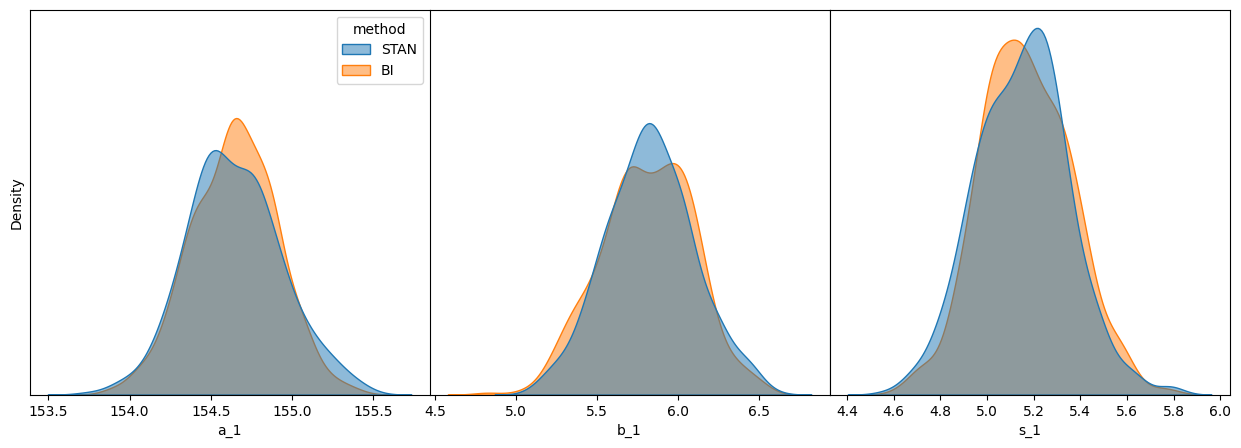

<module 'matplotlib.pyplot' from '/home/sosa/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [ ]:
plot_comparaison(m, df)

### <a id='toc2_1_5_'></a>[Parameter recovery](#toc0_)


jax.local_device_count 32


/tmp/ipykernel_660829/1079003774.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)


jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_de

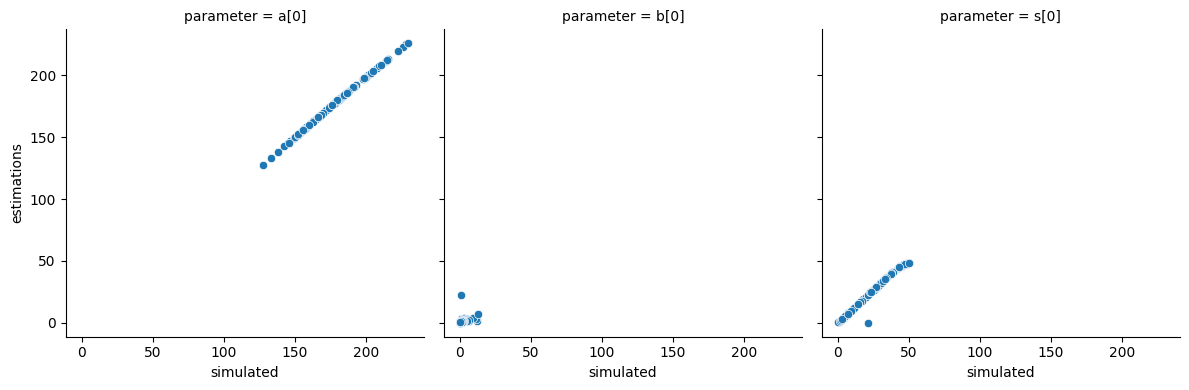

In [ ]:
from main import*

def model(weight, height):    
    a = dist.normal( 178, 20, name = 'a',shape= (1,))   
    b = dist.lognormal(  0, 1, name = 'b',shape= (1,))   
    s = dist.uniform( 0, 50, name = 's',shape = (1,))
    m.normal(a + b * weight , s, obs=height)

def simulate_height(weight, a, b, s):    
    weight = (weight - weight.mean())/weight.std()
    height = dist.normal( a + b * weight , s, sample = True)
    return weight,height

def estimate(weight, a, b, s):
    weight, height = simulate_height(weight,a, b, s)
    m = bi(platform='cpu')
    m.df = pd.DataFrame({"weight": weight, "height": height})
    m.scale(['weight'])
    m.data_to_model(['weight', 'height'])
    m.run(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(weight, a, b, s, N, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(weight[i,:], a[i,:], b[i,:], s[i,:])
        data = {'sim': [i,i,i], 'parameter': estimations.index.values, 'simulated' : [a[i,:][0], b[i,:][0], s[i,:][0]], 'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

N = 100
nsim = 100
a = bi.dist.normal(178, 20, shape=(nsim, 1), sample=True)
b = bi.dist.lognormal(0, 1, shape=(nsim, 1,), sample=True)
s = bi.dist.uniform(0, 50, shape=(nsim, 1), sample=True)
weight = dist.normal( 80, 30, sample = True, shape = (nsim, N))
res = param_recovery(weight, a, b, s, N, nsim = nsim)

## <a id='toc2_2_'></a>[Categorical variable: Model (model 5.9)](#toc0_)

### <a id='toc2_2_1_'></a>[BI](#toc0_)

In [ ]:
from main import*
# setup platform------------------------------------------------
m = bi(platform='cpu')
# import data ------------------------------------------------
m.data('../resources/data/milk.csv', sep=';') 
m.index(["clade"])
m.scale(['kcal_per_g'])
m.scale

def model(kcal_per_g, index_clade):
    a = bi.dist.normal(0, 0.5, shape=(4,), name = 'a')
    s = bi.dist.exponential( 1, name = 's')    
    mu = a[index_clade]
    m.normal(mu, s, obs=kcal_per_g)

m.data_to_model(['kcal_per_g', "index_clade"])
m.run(model) 
m.sampler.print_summary(0.89)


jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:02<00:00, 410.30it/s, 7 steps of size 5.68e-01. acc. prob=0.93]


                mean       std    median      5.5%     94.5%     n_eff     r_hat
      a[0]     -0.46      0.25     -0.46     -0.90     -0.12    765.01      1.00
      a[1]      0.35      0.27      0.35     -0.06      0.78    511.42      1.00
      a[2]      0.63      0.27      0.63      0.20      1.01    491.26      1.01
      a[3]     -0.52      0.31     -0.53     -0.99     -0.01    404.48      1.00
         s      0.81      0.12      0.80      0.63      1.00    327.17      1.00

Number of divergences: 0


### <a id='toc2_2_2_'></a>[BIR](#toc0_)

In [24]:
%%R
library(BI)
m=importBI(platform='cpu')

# Load csv file
m$data(paste(system.file(package = "BI"),"/data/milk.csv", sep = ''), sep=';')
m$scale(list('kcal.per.g')) # Manipulate
m$index(list('clade')) # Scale
m$data_to_model(list('kcal_per_g', 'index_clade')) # Send to model (convert to jax array)

# Define model ------------------------------------------------
model <- function(kcal_per_g, index_clade){
  # Parameters priors distributions
  beta = bi.dist.normal( 0, 0.5, name = 'beta', shape=c(4))
  sigma =bi.dist.exponential(1, name = 's')
  # Likelihood
  m$normal(beta[index_clade], sigma, obs=kcal_per_g)
}

# Run mcmc ------------------------------------------------
m$run(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distributionslibrary(BI)


jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1327.76it/s, 7 steps of size 7.62e-01. acc. prob=0.90]

         mean   sd hdi_5.5% hdi_94.5%
beta[0] -0.46 0.24    -0.82     -0.08
beta[1]  0.33 0.24    -0.05      0.72
beta[2]  0.63 0.28     0.21      1.04
beta[3] -0.54 0.30    -0.95     -0.02
s        0.80 0.12     0.60      0.97


BIR load BI as .bi do not overwrite it!
jax an jax.numpy have been imported as jax and jnp respectivelly


### <a id='toc2_2_3_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()
stan_code = """
data{
    vector[29] K;
    array[29] int clade_id;
}
parameters{
    vector[4] a;
    real<lower=0> s;
}
model{
    vector[29] mu;
    s ~ exponential( 1 );
    a ~ normal( 0 , 0.5 );
    for ( i in 1:29 ) {
        mu[i] = a[clade_id[i]];
    }
    K ~ normal( mu , s );
    
}
"""
data = {
  'clade_id': m.df.index_clade.values+1,
  'K': m.df.kcal_per_g.values,
}
start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: 16.1s, done.Sampling:   0%
Sampling: 100% (1000/1000)
Sampling: 100% (1000/1000), done.
Messages received during sampling:
  Gradient evaluation took 0.000249 seconds
  1000 transitions using 10 leapfrog steps per transition would take 2.49 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_1r2y_c3_/model_kvvrot3p.stan', line 17, column 4 to column 25)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


Pystan took: 16.2745 seconds


### <a id='toc2_2_4_'></a>[Output comparaison](#toc0_)

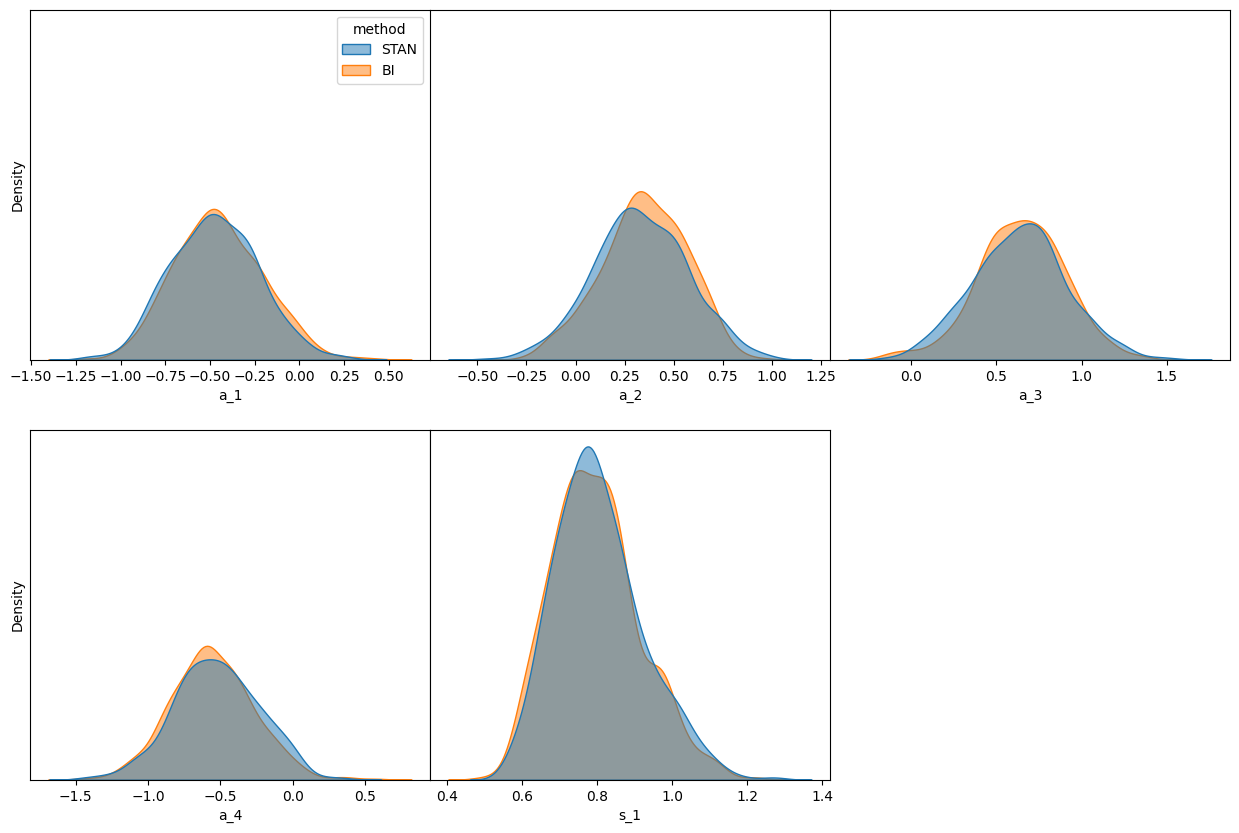

<module 'matplotlib.pyplot' from '/home/sosa/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [ ]:
plot_comparaison(m, df)

### <a id='toc2_2_5_'></a>[Parameter recovery](#toc0_)

jax.local_device_count 32
jax.local_device_count 32


/tmp/ipykernel_2452/2973069998.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)


jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_de

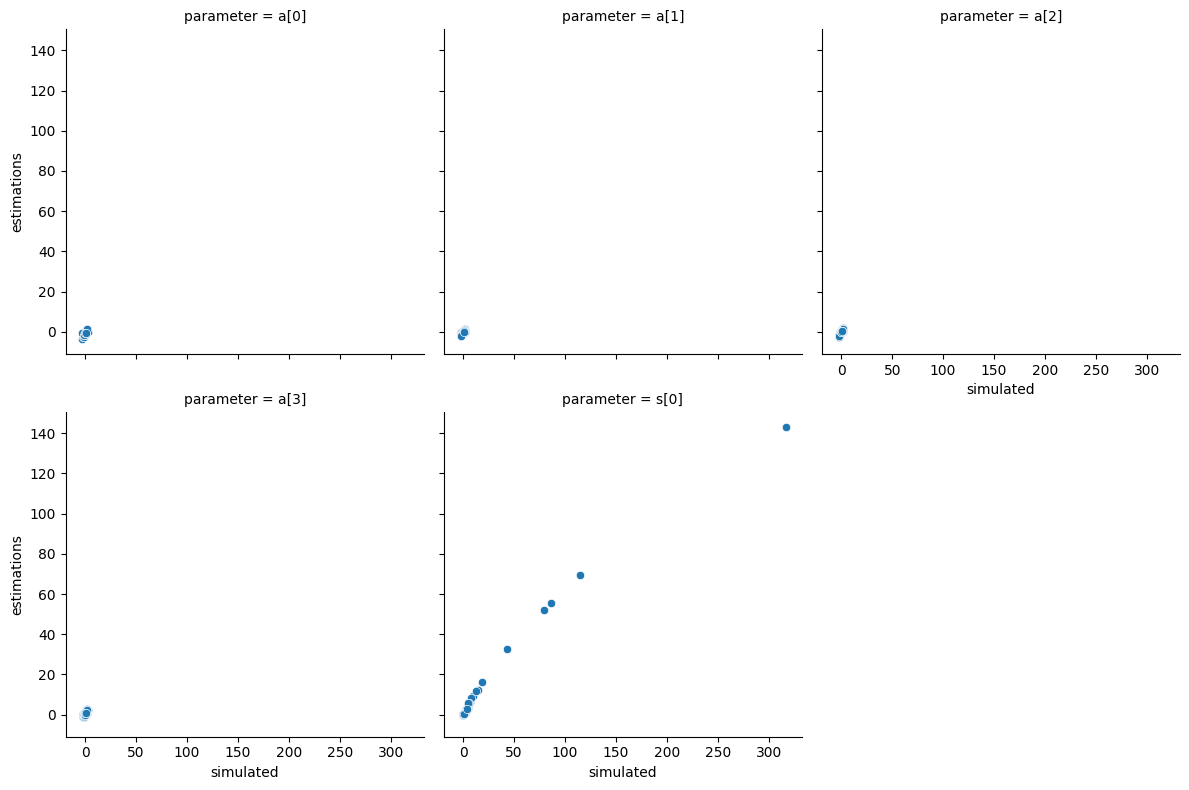

In [ ]:
from main import*
m = bi(platform='cpu')

def model(kcal_per_g, index_clade):
    a = bi.dist.normal(0, 0.5, shape=(4,), name = 'a')
    s = bi.dist.exponential( 1, shape = (1,), name = 's')    
    m = a[index_clade]
    m.normal(m, s, obs=kcal_per_g)
    
def simulate_data(a, sigma, N):
    index_clade = bi.dist.categorical(probs=jnp.array([0.25,0.25,.25,.25]), shape = (N,), sample=True).astype(int) # Generate clade index
    m = a[index_clade] # Generate mean of each clade
    cal = dist.normal( m, sigma, sample = True) # Generate calories based on mean and std
    return cal, index_clade
    
def estimate(alpha, sigma, N):
    cal, index_clade = simulate_data(alpha, sigma, N) # Simulate data
    # Run model
    m = bi(platform='cpu')
    m.df = pd.DataFrame({"kcal_per_g": cal, "index_clade": index_clade})
    #m.scale(['kcal_per_g'])
    m.data_to_model(['kcal_per_g', 'index_clade'])
    m.run(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(a, sigma, N, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(a[i], sigma[i], N)
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([jnp.array(a[i]), jnp.array([sigma[i][0]])]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

N = 30
Ngrp = 4
nsim = 100
a = bi.dist.normal(0, 1, shape=(nsim, Ngrp,), sample=True, seed = 0)
sigma = bi.dist.halfcauchy(1, shape=(nsim, 1,), sample=True, seed = 10)

result = param_recovery(a,sigma, N = N, nsim = nsim)

## <a id='toc2_3_'></a>[Continuous interactions terms (model 8.3)](#toc0_)

### <a id='toc2_3_1_'></a>[BI](#toc0_)

In [ ]:
from main import*
# setup platform------------------------------------------------
m = bi(platform='cpu')
# import data ------------------------------------------------
m.data('../resources/data/tulips.csv', sep=';') 
m.scale(['blooms', 'water', 'shade'])

# define model ------------------------------------------------
def model(blooms,shade, water):
    sigma = dist.exponential(1, name = 'sigma')
    bws = dist.normal(0, 0.25, name = 'bws')
    bs = dist.normal(0, 0.25, name = 'bs')
    bw = dist.normal(0, 0.25, name = 'bw')
    a = dist.normal(0.5, 0.25, name = 'a')
    mu = a + bw*water + bs*shade + bws*water*shade
    m.normal(mu, sigma, obs=blooms)

# Run sampler ------------------------------------------------ 
m.run(model) 

# Diagnostic ------------------------------------------------
m.sampler.print_summary(0.89)


jax.local_device_count 16


g:\OneDrive\Travail\Max Planck\Projects\BI\bi\data\manip.py:73: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.20185043 -1.20185043 -1.20185043  0.          0.          0.
  1.20185043  1.20185043  1.20185043 -1.20185043 -1.20185043 -1.20185043
  0.          0.          0.          1.20185043  1.20185043  1.20185043
 -1.20185043 -1.20185043 -1.20185043  0.          0.          0.
  1.20185043  1.20185043  1.20185043]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.df.loc[:, cols[a]] = (self.df.loc[:, cols[a]] - self.df.loc[:, cols[a]].mean()) / self.df.loc[:, cols[a]].std()
g:\OneDrive\Travail\Max Planck\Projects\BI\bi\data\manip.py:73: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.20185043  0.          1.20185043 -1.20185043  0.          1.20185043
 -1.20185043  0.          1.20185043 -1.20


                mean       std    median      5.5%     94.5%     n_eff     r_hat
         a      0.09      0.10      0.09     -0.07      0.26    470.46      1.00
        bs     -0.31      0.12     -0.32     -0.49     -0.11    535.87      1.00
        bw      0.56      0.11      0.57      0.38      0.72    430.91      1.00
       bws     -0.32      0.11     -0.32     -0.50     -0.16    460.58      1.00
     sigma      0.58      0.10      0.57      0.43      0.73    256.92      1.00

Number of divergences: 0


### <a id='toc2_3_2_'></a>[BIR](#toc0_)

In [28]:
%%R
library(BI)
m=importBI(platform='cpu')

# Load csv file
m$data(paste(system.file(package = "BI"),"/data/tulips.csv", sep = ''), sep=';')
m$scale(list('blooms', 'water', 'shade')) # Scale
m$data_to_model(list('blooms', 'water', 'shade')) # Send to model (convert to jax array)

# Define model ------------------------------------------------
model <- function(blooms, water,shade){
  # Parameters priors distributions
  alpha = bi.dist.normal( 0.5, 0.25, name = 'a')
  bw = bi.dist.normal( 0,  0.25, name = 'bw')
  bs = bi.dist.normal(  0,  0.25, name = 'bs')   
  bws = bi.dist.normal(  0, 0.25, name = 'bws') 
  sigma = bi.dist.exponential(1, name = 's')
  # Likelihood
  m$normal(alpha + bw*water + bs*shade + bws*water*shade, sigma, obs=blooms)
}

# Run mcmc ------------------------------------------------
m$run(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distributions

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1085.36it/s, 7 steps of size 6.84e-01. acc. prob=0.91]


     mean   sd hdi_5.5% hdi_94.5%
a    0.08 0.10    -0.05      0.27
bs  -0.31 0.10    -0.48     -0.17
bw   0.57 0.10     0.39      0.72
bws -0.32 0.12    -0.51     -0.13
s    0.58 0.10     0.43      0.73


BIR load BI as .bi do not overwrite it!
jax an jax.numpy have been imported as jax and jnp respectivelly


### <a id='toc2_3_3_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()

stan_code = """
data{
    vector[27] blooms_std;
    array[27] int shade_cent;
    array[27] int water_cent;
}
parameters{
    real a;
    real bs;
    real bw;    
    real bws;
    real<lower=0> sigma;
}
model{
    vector[27] mu;
    sigma ~ exponential( 1 );
    bws ~ normal( 0 , 0.25 );
    bs ~ normal( 0 , 0.25 );
    bw ~ normal( 0 , 0.25 );
    a ~ normal( 0.5 , 0.25 );
    for ( i in 1:27 ) {
        mu[i] = a + bw * water_cent[i] + bs * shade_cent[i] + bws * water_cent[i] * shade_cent[i];
    }

    
    blooms_std ~ normal( mu , sigma );
}
"""

data = {
    'blooms_std' : m.df["blooms"].values,
    "water_cent": m.df["water"].values.astype(int),
    "shade_cent": m.df["shade"].values.astype(int),
}
start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: 12.3s, done.Sampling:   0%
Sampling: 100% (1000/1000)
Sampling: 100% (1000/1000), done.
Messages received during sampling:
  Gradient evaluation took 3.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.32 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/httpstan_e8csemox/model_nwjaezfb.stan', line 26, column 4 to column 38)
  If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
  but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.


Pystan took: 12.4235 seconds


### <a id='toc2_3_4_'></a>[Output comparison](#toc0_)

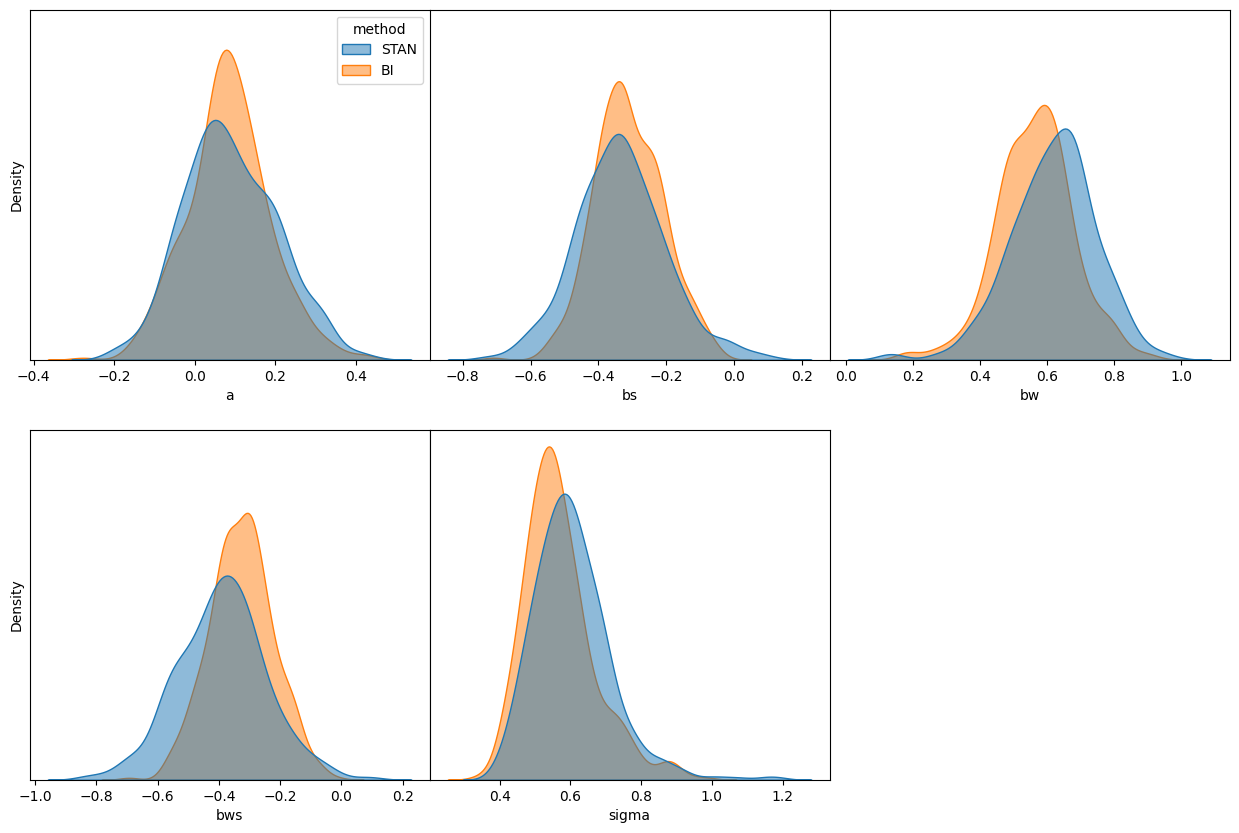

<module 'matplotlib.pyplot' from '/home/sosa/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [ ]:
plot_comparaison(m, df)

### <a id='toc2_3_5_'></a>[Parameter recovery](#toc0_)

jax.local_device_count 32
jax.local_device_count 32


/tmp/ipykernel_77999/2791065395.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)


jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_de

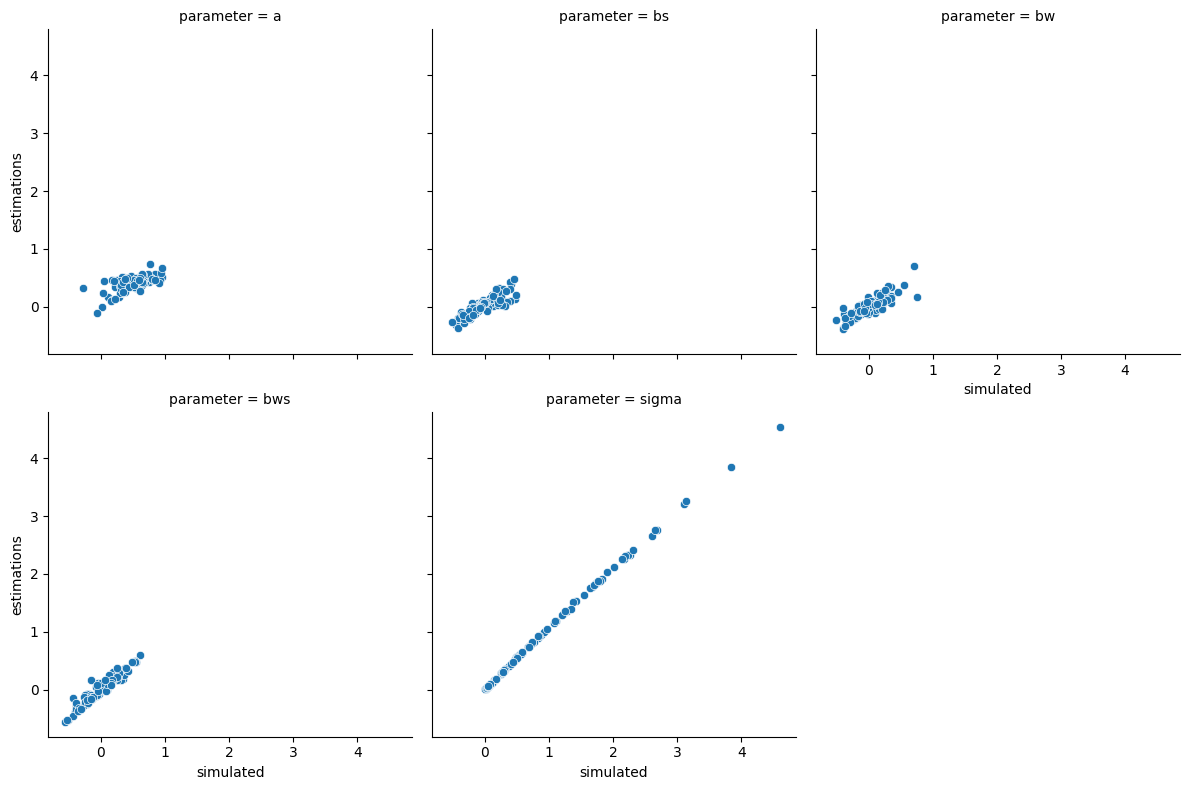

In [18]:
from main import*
m = bi(platform='cpu')

def model(blooms,shade, water):
    sigma = dist.exponential(1, name = 'sigma')
    bws = dist.normal(0, 0.25, name = 'bws')
    bs = dist.normal(0, 0.25, name = 'bs')
    bw = dist.normal(0, 0.25, name = 'bw')
    a = dist.normal(0.5, 0.25, name = 'a')
    mu = a + bw*water + bs*shade + bws*water*shade
    m.normal(mu, sigma, obs=blooms)

def simulate_bloom(water, shade, sigma, bws, bs, bw, a ):
    mu = a + bw*water + bs*shade + bws*water*shade
    return  bi.dist.normal(mu, sigma, sample=True) # bloom
    
def estimate(water, shade, sigma,bws, bs, bw, a ):
    blooms = simulate_bloom(water, shade, sigma,bws, bs, bw, a ) # Simulate data
    # Run model
    m = bi(platform='cpu')
    m.df = pd.DataFrame({"water": water, "shade": shade, "blooms": blooms})
    #m.scale(['blooms', 'shade', 'blooms'])
    m.run(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(water, shade, sigma, bws, bs, bw, a, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(water, shade, sigma[i], bws[i], bs[i], bw[i], a[i] )
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([a[i], bs[i], bw[i], bws[i], sigma[i]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

nsim = 100
# Shade and water are all possible conbinations of shade (1 to 3) and water (1 to 3)
m.data('../resources/data/tulips.csv', sep=';') 
shade = m.df.shade.values
water = m.df.water.values
sigma = dist.exponential(1, name = 'sigma', shape = (nsim, 1,), sample = True)
bws = dist.normal(0, 0.25, name = 'bws', shape = (nsim, 1,), sample = True, seed = 1)
bs = dist.normal(0, 0.25, name = 'bs', shape = (nsim, 1,), sample = True, seed = 2)
bw = dist.normal(0, 0.25, name = 'bw', shape = (nsim, 1,), sample = True, seed = 3)
a = dist.normal(0.5, 0.25, name = 'a', shape = (nsim, 1,), sample = True, seed = 4)

result = param_recovery(water, shade, sigma,bws, bs, bw, a, nsim = nsim)

## <a id='toc2_4_'></a>[Binomial (model 11.1)](#toc0_)

### <a id='toc2_4_1_'></a>[BI](#toc0_)

In [ ]:
from main import bi
# setup platform------------------------------------------------
m = bi(platform='cpu')
# import data ------------------------------------------------
m.data('../resources/data//chimpanzees.csv', sep=';') 
m.data_to_model(['pulled_left'])
def model(pulled_left):
    a = m.dist.normal( 0, 10, shape=(1,), name = 'a')
    m.binomial(logits=a[0], obs=pulled_left)

# Run sampler ------------------------------------------------
m.run(model, num_samples=500) 

# Diagnostic ------------------------------------------------
m.summary()


jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:01<00:00, 532.60it/s, 3 steps of size 1.16e+00. acc. prob=0.91]


mean    sd  hdi_5.5%  hdi_94.5%
a[0]  0.32  0.09      0.18       0.47

### <a id='toc2_4_2_'></a>[BIR](#toc0_)

In [31]:
%%R
library(BI)

# setup platform------------------------------------------------
m=importBI(platform='cpu')

# import data ------------------------------------------------
m$data(paste(system.file(package = "BI"),"/data/chimpanzees.csv", sep = ''), sep=';')
m$data_to_model(list('pulled_left')) # Send to model (convert to jax array)

# Define model ------------------------------------------------
model <- function(pulled_left){
  # Parameters priors distributions
  alpha = bi.dist.normal( 0, 10, name = 'alpha', shape=c(1))
  # Likelihood
  m$binomial(logits = alpha, obs=pulled_left)
}


# Run MCMC ------------------------------------------------
m$run(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution


jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1388.11it/s, 1 steps of size 1.02e+00. acc. prob=0.93]


         mean   sd hdi_5.5% hdi_94.5%
alpha[0] 0.33 0.09     0.18      0.46


BIR load BI as .bi do not overwrite it!
jax an jax.numpy have been imported as jax and jnp respectivelly


### <a id='toc2_4_3_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()

stan_code = """
data{
    array[504] int pulled_left;
}
parameters{
    real a;
}
model{
    real p;
    a ~ normal( 0 , 10 );
    p = a;
    p = inv_logit(p);
    pulled_left ~ binomial( 1 , p );    
}
"""

data = {
    'pulled_left' : m.df["pulled_left"].values.astype(int)
}
start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: 10.5s, done.Sampling:   0%
Sampling: 100% (1000/1000)
Sampling: 100% (1000/1000), done.
Messages received during sampling:
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!


Pystan took: 10.5954 seconds


### <a id='toc2_4_4_'></a>[Output comparison](#toc0_)

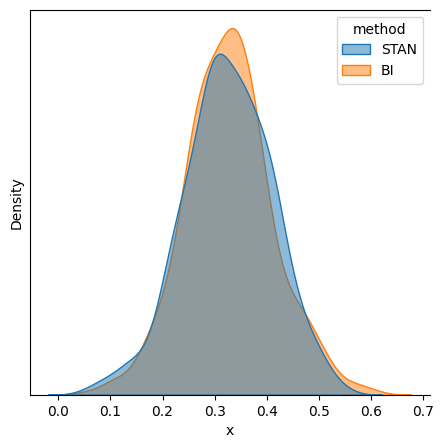

<module 'matplotlib.pyplot' from '/home/sosa/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [ ]:
plot_comparaison(m, df)

### <a id='toc2_4_5_'></a>[Parameter recovery](#toc0_)

jax.local_device_count 32


/tmp/ipykernel_4924/1710553979.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)


jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_de

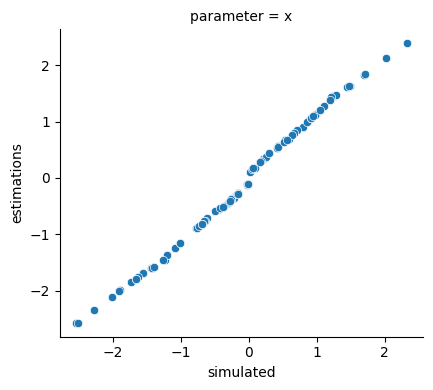

In [ ]:
def model(pulled_left):
    a = dist.normal( 0, 10,shape = (1,), name = 'a')
    m.binomial(logits=a, obs=pulled_left)

def sim_pulled_left(a):
    return dist.binomial(logits=a, sample=True, shape=(1000,))

def estimate(a):
    pulled_left = sim_pulled_left(a)[:,0] # Simulate data
    # Run model
    m = bi(platform='cpu')
    m.df = pd.DataFrame({"pulled_left": pulled_left})
    #m.scale(['blooms', 'shade', 'blooms'])
    m.run(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(a, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(a[i])
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : a[i], 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

nsim = 100
a = dist.normal( 0, 1, shape = (nsim, 1), sample=True)
result = param_recovery(a, nsim = nsim)

## <a id='toc2_5_'></a>[Binomial with indices (model 11.4)](#toc0_)

### <a id='toc2_5_1_'></a>[BI](#toc0_)

In [ ]:
from main import *
m = bi(platform='cpu')
m.data('../resources/data/chimpanzees.csv', sep=';') 
m.df['treatment'] =  m.df.prosoc_left + 2 * m.df.condition
m.df['actor'] = m.df['actor'] - 1

m.data_to_model(['actor', 'treatment', 'pulled_left'])

def model(actor, treatment, pulled_left):
    a = dist.normal(0, 1.5, shape = (7,), name='a')
    b = dist.normal(0, 0.5, shape = (4,), name='b')
    p = a[actor] + b[treatment]
    m.binomial(1, logits=p, obs=pulled_left)

# Run sampler ------------------------------------------------
m.run(model) 
# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:02<00:00, 357.47it/s, 7 steps of size 4.05e-01. acc. prob=0.91]


mean    sd  hdi_5.5%  hdi_94.5%
a[0] -0.41  0.33     -0.97       0.07
a[1]  3.94  0.78      2.70       5.15
a[2] -0.71  0.32     -1.19      -0.28
a[3] -0.70  0.32     -1.21      -0.15
a[4] -0.40  0.32     -0.89       0.10
a[5]  0.53  0.33      0.00       1.04
a[6]  2.02  0.43      1.29       2.65
b[0] -0.08  0.28     -0.51       0.37
b[1]  0.45  0.27      0.03       0.90
b[2] -0.43  0.28     -0.92      -0.03
b[3]  0.33  0.26     -0.10       0.75

### <a id='toc2_5_2_'></a>[BIR](#toc0_)

In [48]:
%%R
library(BI)

# setup platform------------------------------------------------
m=importBI(platform='cpu')

# import data ------------------------------------------------
m$data(paste(system.file(package = "BI"),"/data/chimpanzees.csv", sep = ''), sep=';')
m$df$treatment =  m$df$prosoc_left + 2 * m$df$condition
m$df$actor = m$df$actor - 1
keys <- c("actor", "treatment", 'pulled_left')
values <- list(jnp$array(as.integer(m$df$actor)),jnp$array(as.integer(m$df$treatment)), jnp$array(as.integer(m$df$pulled_left)))
m$data_on_model = py_dict(keys, values, convert = TRUE)

# Define model ------------------------------------------------
model <- function(actor, treatment, pulled_left){
  # Parameters priors distributions
  a = bi.dist.normal( 0, 1.5, shape = c(7), name = 'a') # 7 actors
  b = bi.dist.normal( 0, 0.5, shape = c(4), name = 'b') # 4 treatments
  p = a[actor] + b[treatment]
  # Likelihood
  m$binomial(1,logits =  p, obs=pulled_left)
}


# Run MCMC ------------------------------------------------
m$run(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1163.80it/s, 7 steps of size 5.27e-01. acc. prob=0.88]


      mean   sd hdi_5.5% hdi_94.5%
a[0] -0.44 0.33    -0.90      0.16
a[1]  3.89 0.70     2.74      4.93
a[2] -0.75 0.33    -1.26     -0.23
a[3] -0.74 0.34    -1.31     -0.27
a[4] -0.45 0.34    -1.05      0.05
a[5]  0.49 0.34     0.02      1.08
a[6]  1.96 0.47     1.21      2.66
b[0] -0.03 0.29    -0.50      0.42
b[1]  0.48 0.28     0.07      0.95
b[2] -0.39 0.30    -0.88      0.08
b[3]  0.36 0.29    -0.08      0.83


BIR load BI as .bi do not overwrite it!
jax an jax.numpy have been imported as jax and jnp respectivelly


### <a id='toc2_5_3_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()

stan_code = """
data{
    array[504] int pulled_left;
    array[504] int treatment;
    array[504] int actor;
}
parameters{
    vector[7] a;
    vector[4] b;
}
model{
    vector[504] p;
    a ~ normal( 0 , 1.5 );
    b ~ normal( 0 , 0.5 );    
    for ( i in 1:504 ) {
        p[i] = a[actor[i]] + b[treatment[i]];
        p[i] = inv_logit(p[i]);
    }
    pulled_left ~ binomial( 1 , p );
}

"""

data = {
    'pulled_left' : m.df["pulled_left"].values.astype(int),
    'treatment' : m.df["treatment"].values.astype(int) + 1,
    'actor' : m.df["actor"].values.astype(int) +1 
}

start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: 12.9s, done.Sampling:   0%/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()

Sampling:  10% (100/1000)
Sampling: 100% (1000/1000)
Sampling: 100% (1000/1000), done.
Messages received during sampling:
  Gradient evaluation took 5.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
  Adjust your expectations accordingly!


Pystan took: 15.0782 seconds


### <a id='toc2_5_4_'></a>[Output comparison](#toc0_)

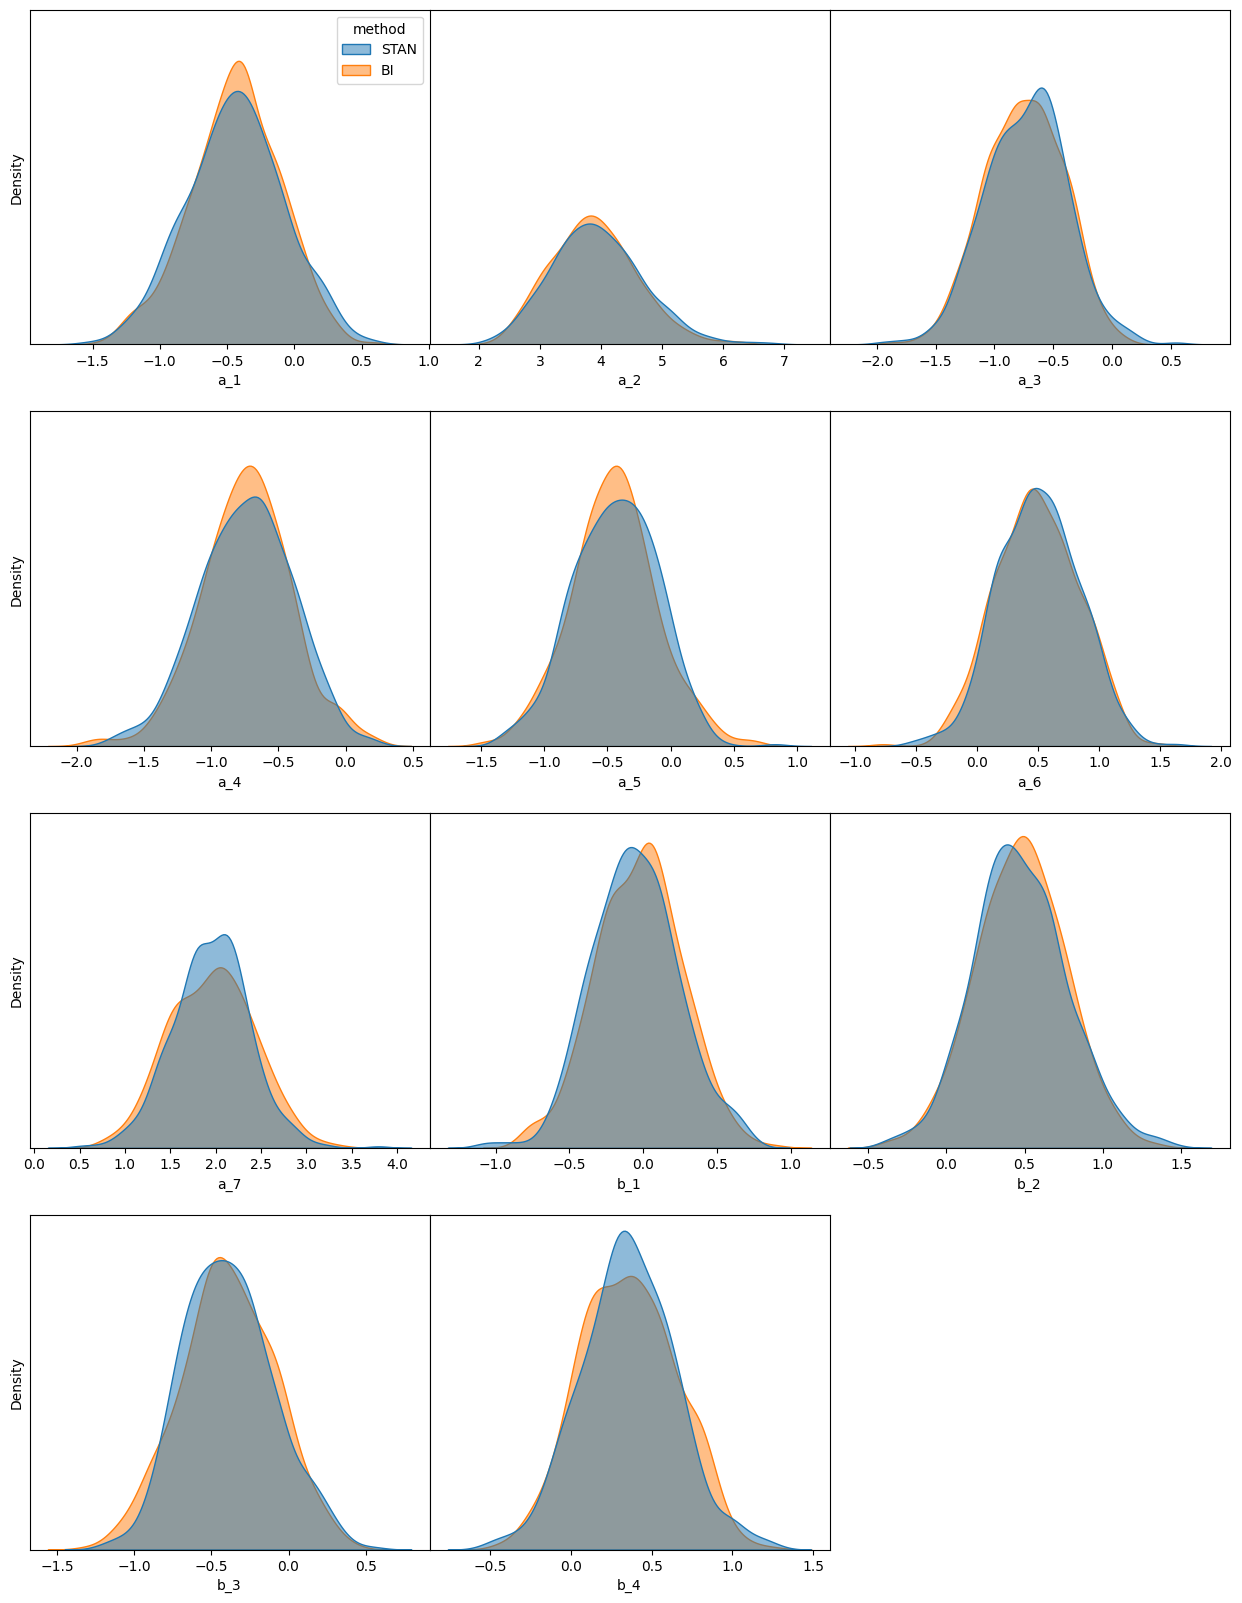

<module 'matplotlib.pyplot' from '/home/sosa/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [ ]:
plot_comparaison(m, df)

### <a id='toc2_5_5_'></a>[Parameter recovery](#toc0_)

jax.local_device_count 32
jax.local_device_count 32


/tmp/ipykernel_4924/3564037553.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)


jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_de

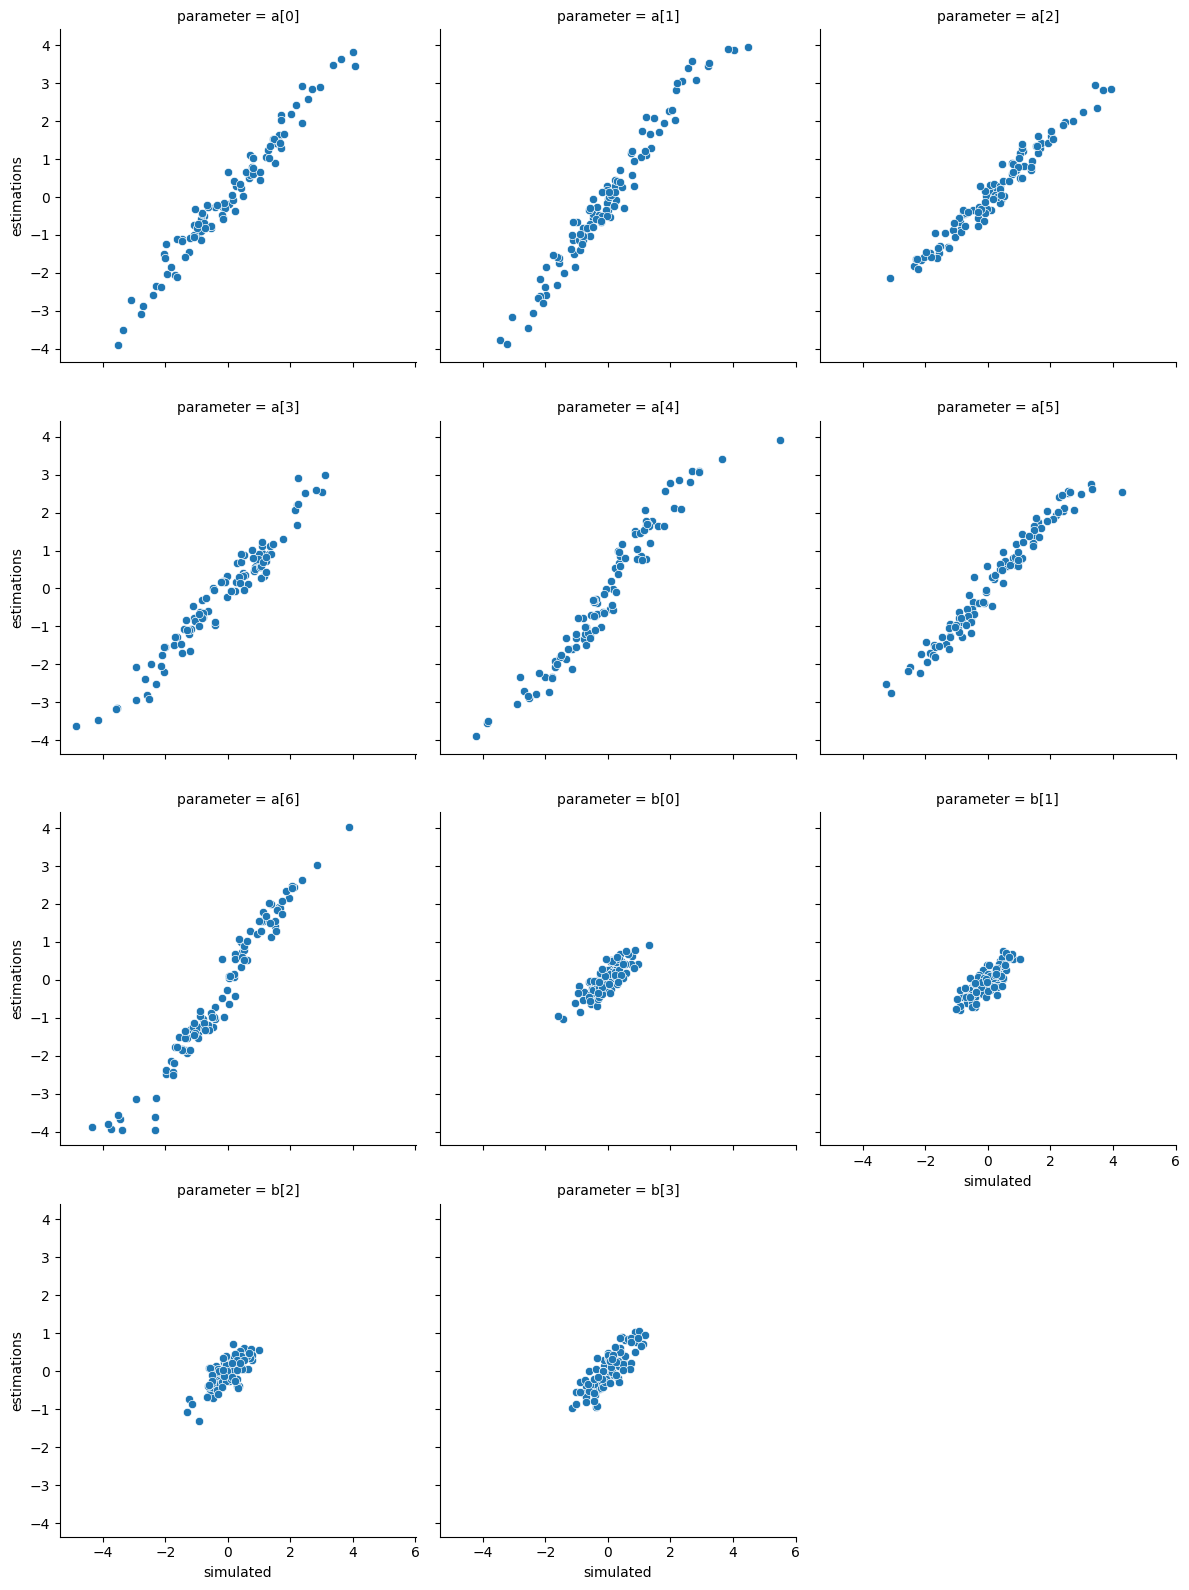

In [ ]:
from main import *
m = bi(platform='cpu')
m.data('resources/data/chimpanzees.csv', sep=';') 
m.df['treatment'] =  m.df.prosoc_left + 2 * m.df.condition
m.df['actor'] = m.df['actor'] - 1

def model(actor, treatment, pulled_left):
    a = dist.normal(0, 1.5, shape = (7,), name='a')
    b = dist.normal(0, 0.5, shape = (4,), name='b')
    p = a[actor] + b[treatment]
    bi.binomial(1, logits=p, obs=pulled_left)

def sim_pulled_left(actor, treatment, a, b):
    p = a[actor] + b[treatment]
    return dist.binomial(1, logits=p, sample=True)

def estimate(actor, treatment, a, b):
    pulled_left = sim_pulled_left(actor, treatment, a, b) # Simulate data
    # Run model
    m = bi(platform='cpu')
    m.df = pd.DataFrame({"pulled_left": pulled_left, "actor": actor, "treatment": treatment})
    m.run(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(actor, treatment, a, b, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(actor, treatment, a[i], b[i])
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([a[i], b[i]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

nsim = 100
actor = jnp.array(m.df['actor'])
treatment = jnp.array(m.df['treatment'])
a = dist.normal(0, 1.5, shape = (nsim, 7), name='a', sample=True)
b = dist.normal(0, 0.5, shape = (nsim, 4), name='b', sample=True)

result = param_recovery(actor, treatment, a, b, nsim)

## <a id='toc2_6_'></a>[Poisson (model 11.10)](#toc0_)

### <a id='toc2_6_1_'></a>[BI](#toc0_)

In [ ]:
from main import *
# setup platform------------------------------------------------
m = bi()
# import data ------------------------------------------------
m.data('../resources/data/Kline.csv', sep=';') 
m.scale(['population'])
m.df["cid"] = (m.df.contact == "high").astype(int)
#m.data_to_model(['total_tools', 'population', 'cid'])
def model(cid, population, total_tools):
    a = dist.normal(3, 0.5, shape= (2,), name='a')
    b = dist.normal(0, 0.2, shape=(2,), name='b')
    l = jnp.exp(a[cid] + b[cid]*population)
    m.poisson(l, obs=total_tools)

# Run sampler ------------------------------------------------
m.run(model) 

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 16


g:\OneDrive\Travail\Max Planck\Projects\BI\bi\data\manip.py:73: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.38929027 -0.3845729  -0.35980671 -0.34576074 -0.3149917  -0.30791565
 -0.29376354 -0.24894854 -0.19587814  2.84092819]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.df.loc[:, cols[a]] = (self.df.loc[:, cols[a]] - self.df.loc[:, cols[a]].mean()) / self.df.loc[:, cols[a]].std()
sample: 100%|██████████| 1000/1000 [00:02<00:00, 477.83it/s, 3 steps of size 6.04e-01. acc. prob=0.91]


mean    sd  hdi_5.5%  hdi_94.5%
a[0]  3.21  0.10      3.06       3.37
a[1]  3.63  0.09      3.49       3.79
b[0]  0.36  0.05      0.28       0.44
b[1]  0.04  0.20     -0.24       0.38

### <a id='toc2_6_2_'></a>[BIR](#toc0_)

In [51]:
%%R
library(BI)

# setup platform------------------------------------------------
m=importBI(platform='cpu')

# import data ------------------------------------------------
m$data(paste(system.file(package = "BI"),"/data/Kline.csv", sep = ''), sep=';')
m$scale(list('population'))# Scale
m$df["cid"] =  as.integer(ifelse(m$df$contact == "high", 1, 0)) # Manipulate
m$data_to_model(list('total_tools', 'population', 'cid' )) # Send to model (convert to jax array)

# Define model ------------------------------------------------
model <- function(total_tools, population, cid){
  # Parameters priors distributions
  alpha = bi.dist.normal(3, 0.5, name='alpha', shape = c(2))
  beta = bi.dist.normal(0, 0.2, name='beta', shape = c(2))
  l = jnp$exp(alpha[cid] + beta[cid]*population)
  # Likelihood
  m$poisson(l, obs=total_tools)
}

# Run MCMC ------------------------------------------------
m$run(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1312.76it/s, 7 steps of size 5.88e-01. acc. prob=0.91]


         mean   sd hdi_5.5% hdi_94.5%
alpha[0] 3.21 0.09     3.06      3.36
alpha[1] 3.64 0.09     3.51      3.77
beta[0]  0.35 0.05     0.27      0.43
beta[1]  0.05 0.19    -0.22      0.39


BIR load BI as .bi do not overwrite it!
jax an jax.numpy have been imported as jax and jnp respectivelly


### <a id='toc2_6_3_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()

stan_code = """ 
data{
    array[10] int T;
    vector[10] P;
    array[10] int cid;
}
parameters{
    vector[2] a;
    vector[2] b;
}
model{
    vector[10] lambda;
    b ~ normal( 0 , 0.2 );
    a ~ normal( 3 , 0.5 );
    for ( i in 1:10 ) {
       lambda[i] = a[cid[i]] + b[cid[i]] * P[i];
       lambda[i] = exp(lambda[i]);
    }
    T ~ poisson( lambda );
}

"""

data = {
    'T' : m.df["total_tools"].values.astype(int),
    'P' : m.df["population"].values.astype(float),
    'cid' : m.df["cid"].values.astype(int) +1
}

start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: 12.3s, done.Sampling:   0%
Sampling: 100% (1000/1000)
Sampling: 100% (1000/1000), done.
Messages received during sampling:
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!


Pystan took: 12.3988 seconds


### <a id='toc2_6_4_'></a>[Output comparison](#toc0_)

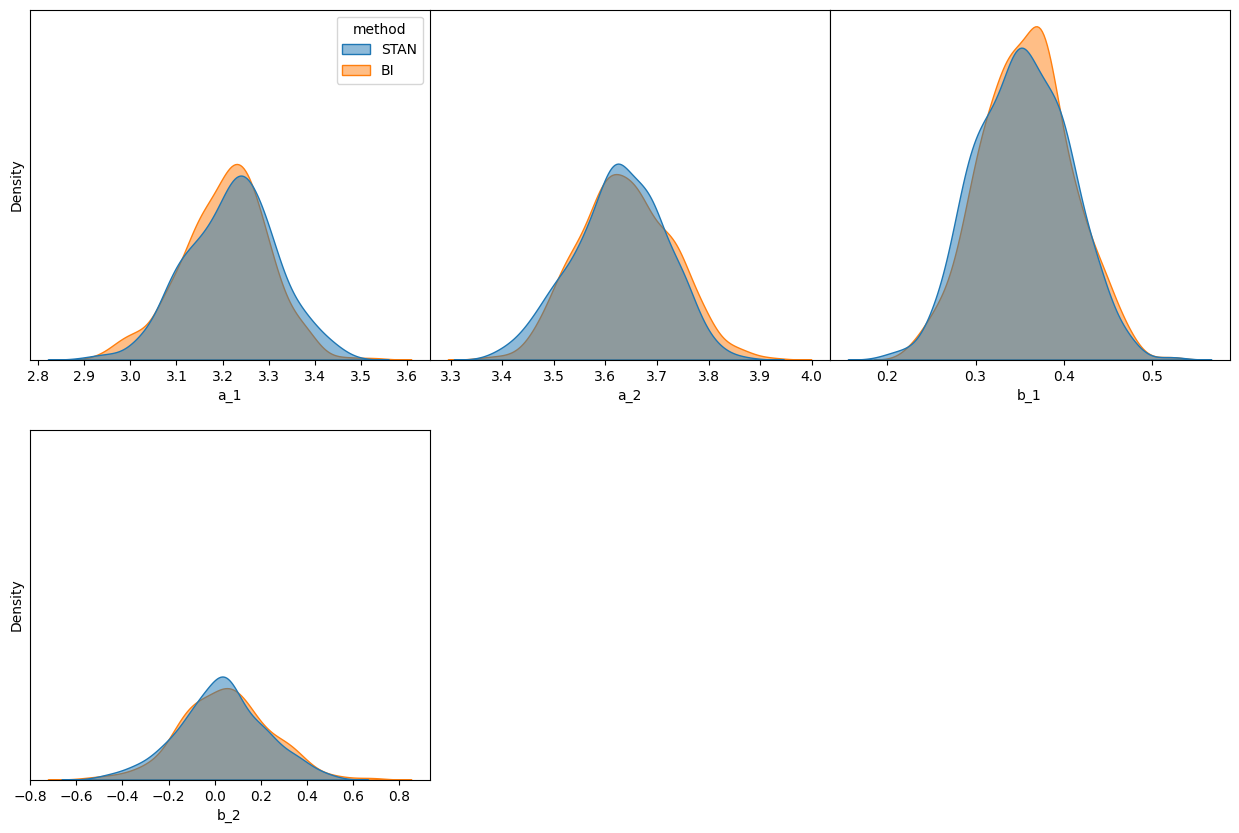

<module 'matplotlib.pyplot' from '/home/sosa/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [ ]:
plot_comparaison(m, df)

### <a id='toc2_6_5_'></a>[Parameter recovery](#toc0_)

jax.local_device_count 32
jax.local_device_count 32


/tmp/ipykernel_77999/4071586757.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)


jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_de

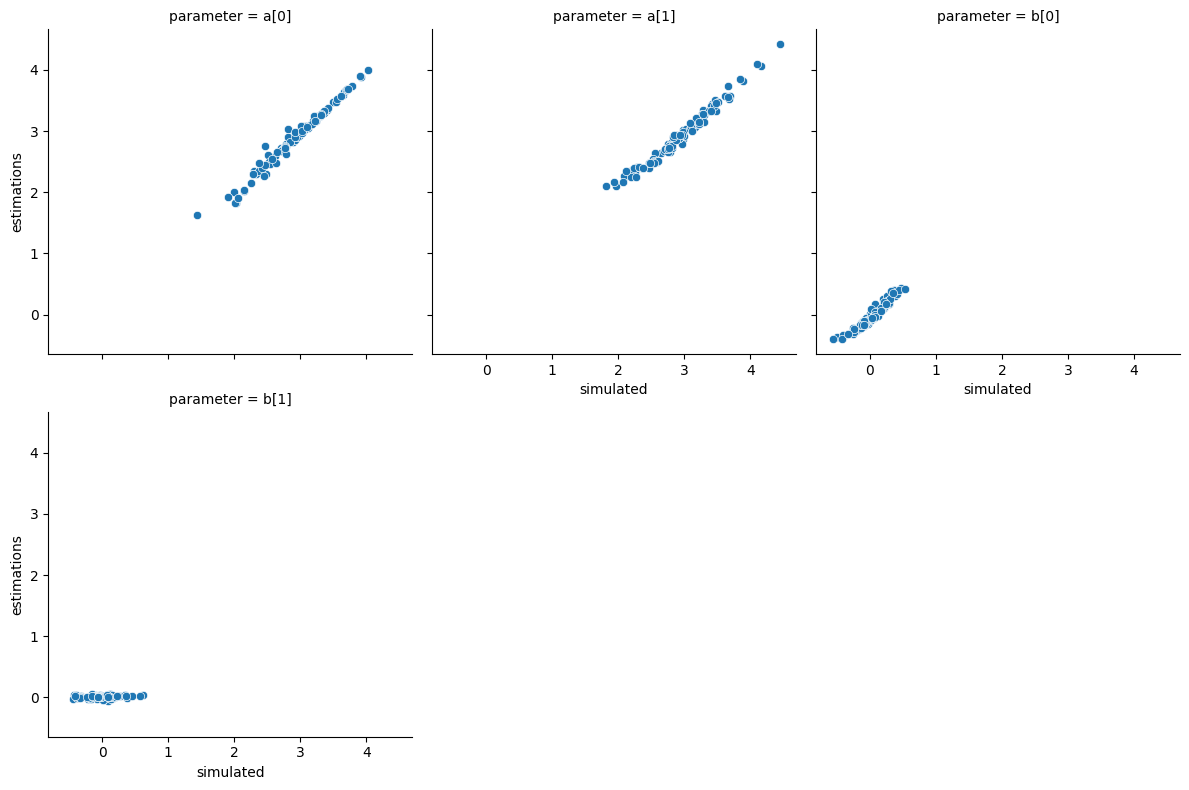

In [22]:

def model(cid, population, total_tools):
    a = dist.normal(3, 0.5, shape= (2,), name='a')
    b = dist.normal(0, 0.2, shape=(2,), name='b')
    l = jnp.exp(a[cid] + b[cid]*population)
    m.poisson(l, obs=total_tools)

def sim_total_tools(cid, population, a, b):
    l = jnp.exp(a[cid] + b[cid]*population)
    return dist.poisson(l, sample=True)

def estimate(cid, population, a, b):
    # Run model
    m = bi()
    m.data('../resources/data/Kline.csv', sep=';') 
    m.scale(['population'])
    m.df["cid"] = (m.df.contact == "high").astype(int)

    total_tools = sim_total_tools(m.df.cid.values, m.df.population.values, a, b) # Simulate data
    m.df = pd.DataFrame({"cid": m.df.cid.values, 'population' :m.df.population.values, "total_tools": total_tools})
    #m.scale(['blooms', 'shade', 'blooms'])
    m.run(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(cid, population, a, b, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(cid, population,a[i], b[i])
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([a[i], b[i]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

nsim = 100
m.data('../resources/data/Kline.csv', sep=';') 
m.scale(['population'])
m.df["cid"] = (m.df.contact == "high").astype(int)
cid = m.df.cid.values
population = m.df.population.values
a = dist.normal(3, 0.5, shape= (nsim, 2,), name='a', sample=True, seed = 1)
b = dist.normal(0,  0.2, shape=(nsim, 2,), name='b', sample=True, seed = 3)
result = param_recovery(cid, population, a, b, nsim)

## <a id='toc2_7_'></a>[Negative binomial (model 11.12)](#toc0_)

### <a id='toc2_7_1_'></a>[Simulated data](#toc0_)

In [9]:
import tensorflow_probability.substrates.jax.distributions as tfd
import pandas as pd
import random as random2
init_key, sample_key = random.split(random.PRNGKey(int(random2.randint(0, 10000000))))
init_key = jnp.array(init_key)
num_days = 3000
y = tfd.Poisson(rate=1.5).sample(seed = init_key, sample_shape=(num_days,))
num_weeks = 400
y_new = tfd.Poisson(rate=0.5 * 7).sample(seed = init_key, sample_shape=(num_weeks,))
y_all = np.concatenate([y, y_new])
exposure = np.concatenate([np.repeat(1, num_days), np.repeat(7, num_weeks)])
monastery = np.concatenate([np.repeat(0, num_days), np.repeat(1, num_weeks)])
d = pd.DataFrame.from_dict(dict(y=y_all, days=exposure, monastery=monastery))
d["log_days"] = d.days.pipe(np.log)
d.to_csv('../resources/data/Sim dat Gamma poisson.csv', index=False)

### <a id='toc2_7_2_'></a>[BI](#toc0_)

In [10]:
from main import*
# setup platform------------------------------------------------
m = bi()
m.data('../resources/data/Sim dat Gamma poisson.csv', sep=',') 
m.data_on_model={'y': jnp.array(m.df.y.values, dtype=int), 'log_days': jnp.array(m.df.log_days.values, dtype=float), 'monastery': jnp.array(m.df.monastery.values, dtype=int)}
def model(log_days, monastery, y):
    a = dist.normal(0, 1, name = 'a', shape=(1,))
    b = dist.normal(0, 1, name = 'b', shape=(1,))
    l = jnp.exp(log_days + a + b * monastery)
    m.poisson(rate = l, obs=y)

# Run sampler ------------------------------------------------
m.run(model, num_warmup = 1000, num_samples=1000) 

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 32


sample: 100%|██████████| 2000/2000 [00:01<00:00, 1623.76it/s, 3 steps of size 7.34e-01. acc. prob=0.91]


mean    sd  hdi_5.5%  hdi_94.5%
a[0]  0.41  0.01      0.39       0.44
b[0] -1.11  0.03     -1.16      -1.06

### <a id='toc2_7_3_'></a>[BIR](#toc0_)

In [55]:
%%R
library(BI)

# setup platform------------------------------------------------
m=importBI(platform='cpu')

# import data ------------------------------------------------
m$data(paste(system.file(package = "BI"),"/data/Sim dat Gamma poisson.csv", sep = ''), sep=',')
m$data_to_model(list('log_days', 'monastery', 'y' )) # Send to model (convert to jax array)

# Define model ------------------------------------------------
model <- function(log_days, monastery, y){
  # Parameters priors distributions
  alpha = bi.dist.normal(0, 1, name='alpha', shape=c(1))
  beta = bi.dist.normal(0, 1, name='beta', shape=c(1))
  l = jnp$exp(log_days + alpha + beta * monastery)
  # Likelihood
  m$poisson(rate=l, obs=y)
}

# Run MCMC ------------------------------------------------
m$run(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution

jax.local_device_count 32


  0%|          | 0/1000 [00:00<?, ?it/s]

sample: 100%|██████████| 1000/1000 [00:00<00:00, 1302.84it/s, 3 steps of size 9.15e-01. acc. prob=0.89]

         mean   sd hdi_5.5%

 hdi_94.5%
alpha[0] 1.55 0.07     1.45      1.67
beta[0]  0.36 0.32    -0.08      0.92


BIR load BI as .bi do not overwrite it!
jax an jax.numpy have been imported as jax and jnp respectivelly


### <a id='toc2_7_4_'></a>[STAN](#toc0_)

In [31]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()

stan_code =""" 
data{
    array[340] int y;
    array[340] int monastery;
    vector[340] log_days;
}
parameters{
    real a;
    real b;
}
model{
    vector[340] lambda;
    b ~ normal( 0 , 1 );
    a ~ normal( 0 , 1 );
    for ( i in 1:340 ) {
        lambda[i] = log_days[i] + a + b * monastery[i];
        // B1 ~ exponential( 1 );
        // gamma(lambda[i]*B1, B1);
        lambda[i] = exp(lambda[i]);
    }
    
    y ~ poisson( lambda );    
}
"""

data = {
    'y' : np.array(m.data_on_model["y"].astype(int)),
    'monastery' : np.array(m.data_on_model["monastery"].astype(int)) +1,
    'log_days' : np.array(m.data_on_model["log_days"].astype(float)),
}

start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=1000, num_warmup = 1000)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: 11.6s, done.Sampling:   0%
Sampling:   0% (1/2000)
Sampling: 100% (2000/2000)
Sampling: 100% (2000/2000), done.
Messages received during sampling:
  Gradient evaluation took 4.2e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.42 seconds.
  Adjust your expectations accordingly!


Pystan took: 11.9542 seconds


### <a id='toc2_7_5_'></a>[Output comparison](#toc0_)

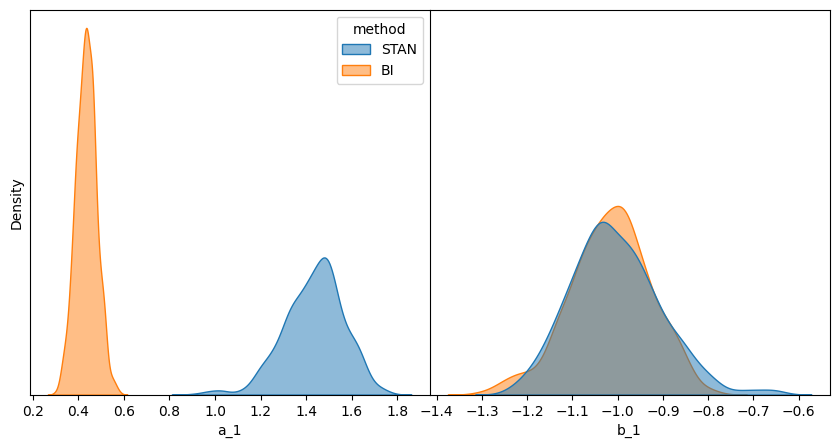

<module 'matplotlib.pyplot' from '/home/sosa/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [32]:
plot_comparaison(m, df)

### <a id='toc2_7_6_'></a>[Parameter recovery](#toc0_)

jax.local_device_count 32
jax.local_device_count 32


/tmp/ipykernel_171168/2524411920.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)


jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_de

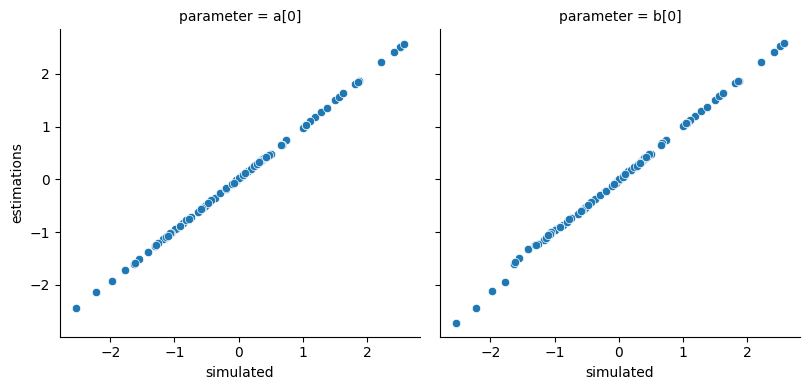

In [15]:
# setup platform------------------------------------------------
m = bi()
m.data('../resources/data/Sim dat Gamma poisson.csv', sep=',') 
import random as random2
def model(log_days, monastery, y):
    a = dist.normal(0, 1, name = 'a', shape=(1,))
    b = dist.normal(0, 1, name = 'b', shape=(1,))
    l = jnp.exp(log_days + a + b * monastery)
    m.poisson(rate = l, obs=y)


def sim_rates(log_days, monastery, a, b):
    l = jnp.exp(log_days + a +  b * monastery)
    return dist.poisson(rate = l, sample=True)

def estimate(log_days, monastery, a, b):
    rates = sim_rates(log_days, monastery, a, b) # Simulate data
    # Run model
    m = bi(platform='cpu')
    m.df = pd.DataFrame({"log_days": log_days, "monastery": monastery, 'y': rates})
    m.run(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(log_days, monastery, a, b, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(log_days, monastery, a[i], b[i] )
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([a[i], b[i]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

nsim = 100
log_days = jnp.array(m.df.log_days.values)
monastery = jnp.array(m.df.monastery.values)
a = dist.normal(0, 1, name = 'a', sample=True, shape=(nsim, 1))
b = dist.normal(0, 1, name = 'b', sample=True, shape=(nsim, 1))

result = param_recovery(log_days, monastery, a, b, nsim)

In [ ]:
import tensorflow_probability.substrates.jax.distributions as tfd
import pandas as pd
def sim_data(num_days= 30, num_weeks = 4, rate1 = 1.5, rate2 = 0.5):
    init_key, sample_key = random.split(random.PRNGKey(int(r.randint(0, 10000000))))
    init_key = jnp.array(init_key)
    y = tfd.Poisson(rate=rate1).sample(seed = init_key, sample_shape=(num_days,))
    y_new = tfd.Poisson(rate=rate2 * 7).sample(seed = init_key, sample_shape=(num_weeks,))
    y_all = np.concatenate([y, y_new])
    exposure = np.concatenate([np.repeat(1, 30), np.repeat(7, 4)])
    monastery = np.concatenate([np.repeat(0, 30), np.repeat(1, 4)])
    d = pd.DataFrame.from_dict(dict(y=y_all, days=exposure, monastery=monastery))
    d["log_days"] = d.days.pipe(np.log)
    return d


sim_data(num_days= 30, num_weeks = 4, rate1 = 1.5, rate2 = 0.5)

## <a id='toc2_8_'></a>[Multinomial (model 11.13)](#toc0_)

### <a id='toc2_8_1_'></a>[Simulated data](#toc0_)

In [ ]:
# simulate career choices among 500 individuals
N = 500  # number of individuals
income = jnp.array([1, 2, 5])  # expected income of each career
score = 0.5 * income  # scores for each career, based on income
# next line converts scores to probabilities
p = jax.nn.softmax(score)

# now simulate choice
# outcome career holds event type values, not counts
career = jnp.repeat(jnp.nan, N)  # empty vector of choices for each individual
# sample chosen career for each individual
for i in range(N):
    career = career.at[i].set(
        bi.dist.categorical(probs=p, sample=True,seed=i)
    )
career = career.astype(jnp.int32)
data = {'career': career, 'income': [income[index] for index in career]}
d = pd.DataFrame(data)
d.to_csv('../resources/data/Sim data multinomial.csv')

### <a id='toc2_8_2_'></a>[BI](#toc0_)

In [58]:
from main import*
import pandas as pd
m = bi('cpu')
df=pd.read_csv('../resources/data/Sim data multinomial.csv')
#m.data('../resources/data/Sim data multinomial.csv', sep=',') 
m.data_on_model={}
m.data_on_model['career']=jnp.array(df.career.values)
m.data_on_model['income']=jnp.array(df.income.unique()).astype(jnp.int32)
def model(career, income ):
    a = dist.normal(0, 1, shape= (2,), name = 'a')
    b = bi.dist.halfnormal(0.5,  shape= (1,),name = 'b')
    s_1 = a[0] + b * income[0]
    s_2 = a[1] + b * income[1]
    s_3 = [0] #pivot
    p = jax.nn.softmax(jnp.stack([s_1[0], s_2[0], s_3[0]]))
    m.categorical(probs =  p, obs=career)

# Run sampler ------------------------------------------------ 
m.run(model)  

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1213.04it/s, 7 steps of size 2.63e-01. acc. prob=0.77]


mean    sd  hdi_5.5%  hdi_94.5%
a[0] -2.13  0.26     -2.56      -1.74
a[1] -1.58  0.15     -1.80      -1.34
b[0]  0.06  0.05      0.00       0.13

### <a id='toc2_8_3_'></a>[BIR](#toc0_)

In [57]:
%%R
library(BI)

# setup platform------------------------------------------------
m=importBI(platform='cpu')

# import data ------------------------------------------------
m$data(paste(system.file(package = "BI"),"/data/Sim data multinomial.csv", sep = ''), sep=',')
keys <- c("income", "career")
income = unique(m$df$income)
income = income[order(income)]
values <- list(jnp$array(as.integer(income)),jnp$array( as.integer(m$df$career)))
m$data_on_model = py_dict(keys, values, convert = TRUE)

# Define model ------------------------------------------------
model <- function(income, career){
  # Parameters priors distributions
  alpha = bi.dist.normal(0, 1, name='alpha', shape = c(2))
  beta = bi.dist.halfnormal(0.5, name='beta')
  
  s_1 = alpha[0] + beta * income[0]
  s_2 = alpha[1] + beta * income[1]
  s_3 = 0 # reference category

  p = jax$nn$softmax(jnp$stack(list(s_1, s_2, s_3)))

  # Likelihood
  m$categorical(probs=p, obs=career)
}

# Run MCMC ------------------------------------------------
m$run(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution


jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1187.33it/s, 7 steps of size 4.17e-01. acc. prob=0.72]


          mean   sd hdi_5.5% hdi_94.5%
alpha[0] -1.93 0.15    -2.17     -1.71
alpha[1] -1.67 0.19    -2.05     -1.41
beta      0.11 0.08     0.00      0.23


BIR load BI as .bi do not overwrite it!
jax an jax.numpy have been imported as jax and jnp respectivelly


### <a id='toc2_8_4_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()

stan_code =""" 
data{
    int N; // number of individuals
    int K; // number of possible careers
    array[N] int career; // outcome
    vector[K] career_income;
}
parameters{
    vector[K-1] a; // intercepts
    real<lower=0> b; // association of income with choice
}
model{
    vector[K] p;
    vector[K] s;
    a ~ normal( 0 , 1 );
    b ~ normal( 0 , 0.5 );
    s[1] = a[1] + b*career_income[1];
    s[2] = a[2] + b*career_income[2];
    s[3] = 0; // pivot
    p = softmax( s );
    career ~ categorical( p );
}
"""

data = {
    'N' : 500,
    'K' : 3,
    'career' : df["career"].values.astype(int) + 1,
    'career_income' : df["income"].unique().astype(int).tolist(),
}

start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: 18.3s, done.Sampling:   0%/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()

Sampling: 100% (1000/1000)
Sampling: 100% (1000/1000), done.
Messages received during sampling:
  Gradient evaluation took 2.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
  Adjust your expectations accordingly!


Pystan took: 18.8366 seconds


### <a id='toc2_8_5_'></a>[Output comparison](#toc0_)

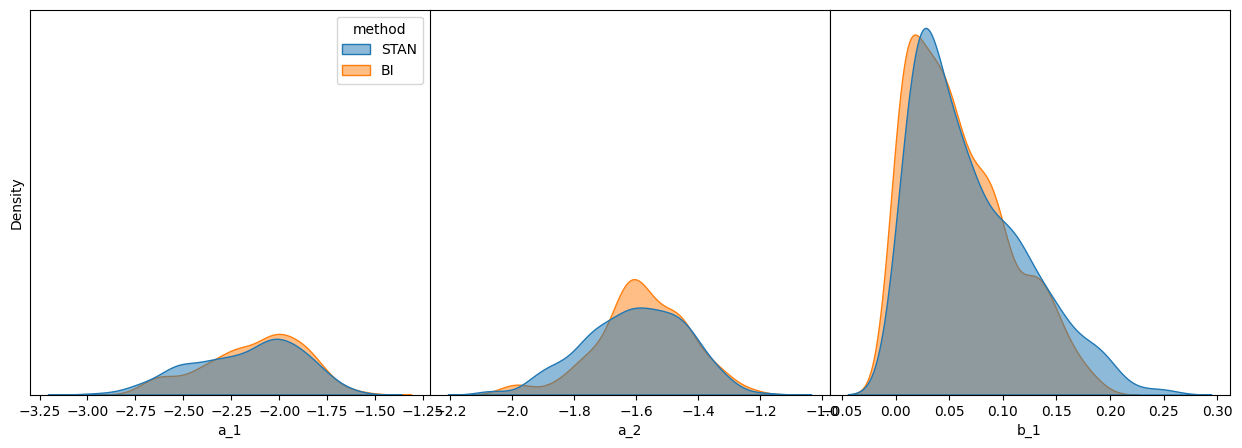

<module 'matplotlib.pyplot' from '/home/sosa/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [ ]:
plot_comparaison(m, df)

### <a id='toc2_8_6_'></a>[Parameter recovery](#toc0_)

jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32


/tmp/ipykernel_1186/2612146605.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)


jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_de

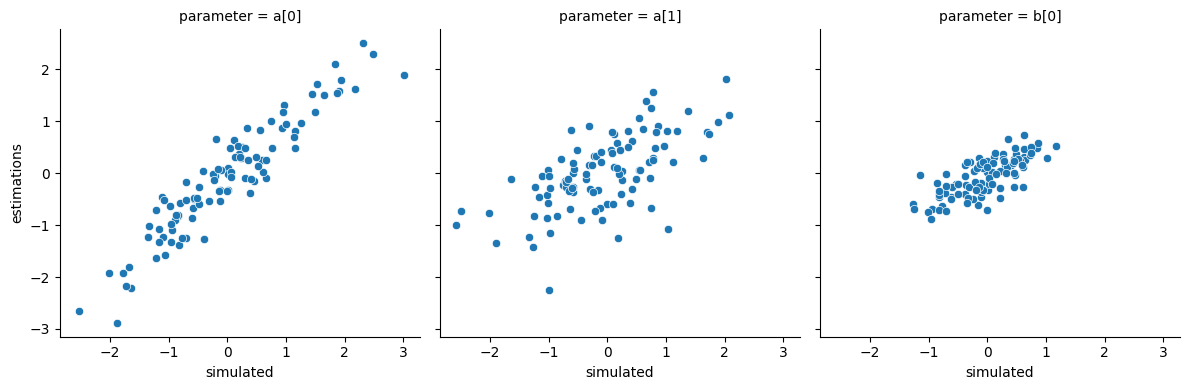

In [ ]:
from main import *
import pandas as pd
m = bi()
m.data('../resources/data/Sim data multinomial.csv', sep=',') 

def model(career, income ):
    a = dist.normal(0, 1, shape= (2,), name = 'a')
    b = bi.dist.halfnormal(0.5,  shape= (1,),name = 'b')
    s_1 = a[0] + b * income[0]
    s_2 = a[1] + b * income[1]
    s_3 = [0] #pivot
    p = jax.nn.softmax(jnp.stack([s_1[0], s_2[0], s_3[0]]))
    m.lk("y", dist.categorical(probs =  p), obs=career)
    
def sim_total_tools(income, career, a, b):
    s_1 = a[0] + b * income[0]
    s_2 = a[1] + b * income[1]
    s_3 = [0] #pivot
    p = jax.nn.softmax(jnp.stack([s_1[0], s_2[0], s_3[0]]))

    return dist.categorical(probs =  p, sample=True,shape=(len(career),))

def estimate(income, career, a, b):
    career = sim_total_tools(income, career, a, b) # Simulate data
    # Run model
    m = bi(platform='cpu')
    m.data_on_model = {}
    m.data_on_model['income'] = income
    m.data_on_model['career'] = career
    #m.scale(['blooms', 'shade', 'blooms'])
    m.run(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(income, career, a, b, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(income, career,a[i], b[i])
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([a[i], b[i]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

m = bi()
m.data('../resources/data/Sim data multinomial.csv', sep=',') 
nsim = 100
income = jnp.unique(m.df.income.values)
career = jnp.array(m.df.career.values)
a = dist.normal(0, 1, shape= (nsim,2), name = 'a', sample=True)
b = bi.dist.normal(0, 0.5, shape=(nsim,1), name = 'b', sample=True)
result = param_recovery(income, career, a, b, nsim)

## <a id='toc2_9_'></a>[Beta binomial (model m12.1)](#toc0_)

### <a id='toc2_9_1_'></a>[BI](#toc0_)

In [ ]:
# setup platform------------------------------------------------
m = bi()
# import data ------------------------------------------------
m.data('../resources/data/UCBadmit.csv', sep=';') 
m.df["gid"] = (m.df["applicant.gender"] != "male").astype(int)

def model(gid, applications, admit):
    phi = dist.exponential(1,  name = 'phi')
    alpha = dist.normal( 0., 1.5, shape=(2,), name = 'alpha')
    theta = phi + 2
    pbar = jax.nn.sigmoid(alpha[gid])
    concentration1 = pbar*theta
    concentration0 = (1 - pbar) * theta

    m.betabinomial(total_count = applications, concentration1 = concentration1, concentration0 = concentration0, obs=admit)

# Run sampler ------------------------------------------------
m.run(model) 

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:03<00:00, 282.21it/s, 7 steps of size 5.41e-01. acc. prob=0.89]


mean    sd  hdi_5.5%  hdi_94.5%
alpha[0] -0.40  0.41     -1.07       0.22
alpha[1] -0.31  0.44     -1.02       0.36
phi       1.03  0.81      0.01       2.07

### <a id='toc2_9_2_'></a>[BIR](#toc0_)

In [60]:
%%R
library(BI)
# setup platform------------------------------------------------
m=importBI(platform='cpu')

# import data ------------------------------------------------
m$data(paste(system.file(package = "BI"),"/data/UCBadmit.csv", sep = ''), sep=';')
m$df["gid"] = as.integer(ifelse(m$df["applicant.gender"] == "male", 0, 1)) # Manipulate
m$data_to_model(list('gid', 'applications', 'admit' )) # Send to model (convert to jax array)

# Define model ------------------------------------------------
model <- function(gid, applications, admit){
  # Parameters priors distributions
  phi = bi.dist.exponential(1, name = 'phi',shape=c(1))
  alpha = bi.dist.normal(0., 1.5, shape= c(2), name='alpha')
  t = phi + 2
  pbar = jax$nn$sigmoid(alpha[gid])
  gamma = pbar * t
  eta = (1 - pbar) * t
  # Likelihood
  m$betabinomial(total_count=applications, concentration1=gamma, concentration0=eta, obs=admit)
}

# Run MCMC ------------------------------------------------
m$run(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:01<00:00, 844.45it/s, 7 steps of size 4.99e-01. acc. prob=0.91]


          mean   sd hdi_5.5% hdi_94.5%
alpha[0] -0.47 0.40    -1.07      0.19
alpha[1] -0.33 0.42    -0.96      0.35
phi[0]    1.02 0.78     0.01      2.05


BIR load BI as .bi do not overwrite it!
jax an jax.numpy have been imported as jax and jnp respectivelly


### <a id='toc2_9_3_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()
stan_code =""" 
data{
    array[12] int N;
    array[12] int A;
    array[12] int gid;
}
parameters{
    vector[2] a;
    real<lower=0> phi;
}
transformed parameters{
    real theta;
    theta = phi + 2;
}
model{
    vector[12] pbar;
    phi ~ exponential( 1 );
    a ~ normal( 0 , 1.5 );
    for ( i in 1:12 ) {
        pbar[i] = a[gid[i]];
        pbar[i] = inv_logit(pbar[i]);
    }
    A ~ beta_binomial( N , pbar*theta , (1-pbar)*theta );    
}
"""

data = {
    'A' : m.df["admit"].values.astype(int),
    'N' : m.df["applications"].values.astype(int),
    'gid' : m.df["gid"].values.astype(int) +1,
}

start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: 12.7s, done.Sampling:   0%
Sampling: 100% (1000/1000)
Sampling: 100% (1000/1000), done.
Messages received during sampling:
  Gradient evaluation took 1.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.
  Adjust your expectations accordingly!


Pystan took: 12.8776 seconds


### <a id='toc2_9_4_'></a>[Output comparison](#toc0_)

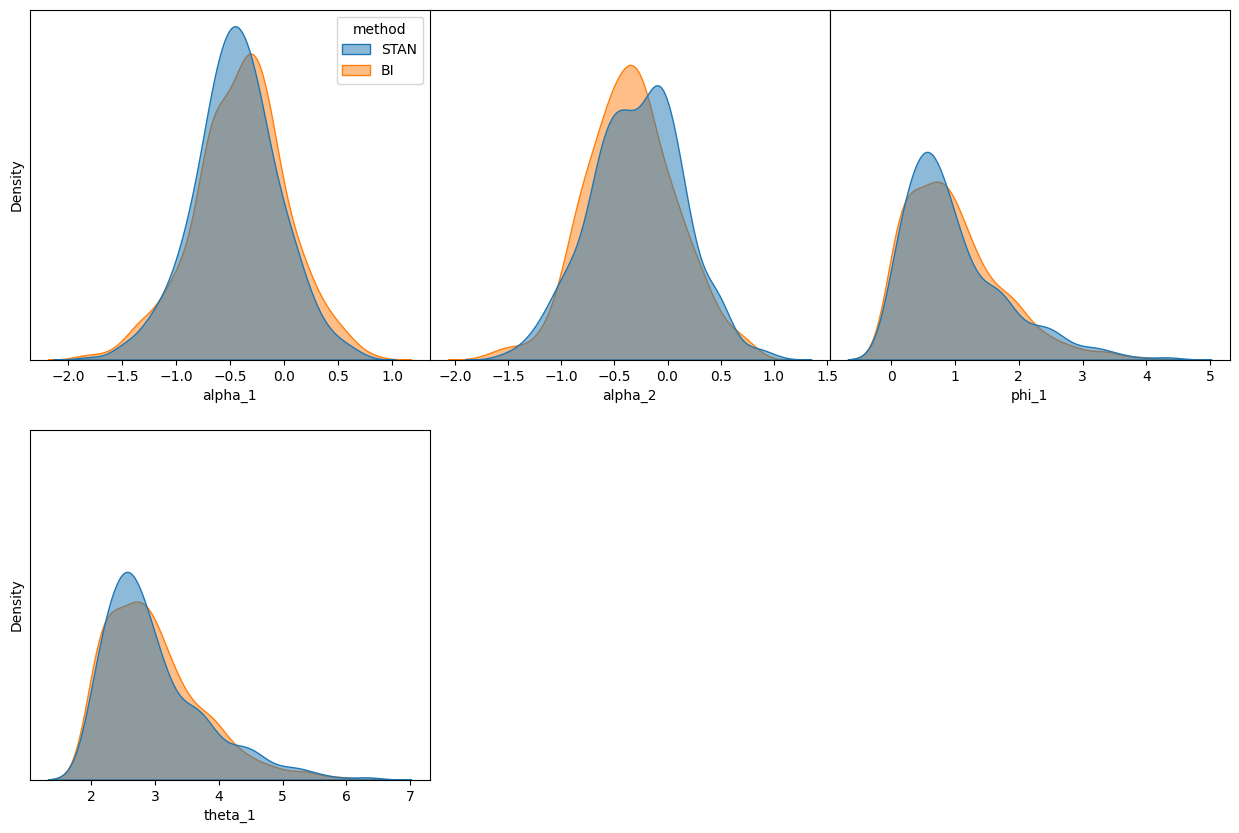

<module 'matplotlib.pyplot' from '/home/sosa/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [ ]:
plot_comparaison(m, df)

In [46]:
def generate_random_integers(n, x, y):
    return jnp.array([random2.randint(x, y) for _ in range(n)])

In [47]:
N
applications = bi.dist.binomial(total_count=generate_random_integers(10, 20, 900), probs=.5, shape = (N,), sample = True)
gid = bi.dist.binomial(total_count=1, probs=.5, shape = (N,), sample = True)

Array([[441, 295, 299, 450, 242, 396, 407, 111,  23, 378],
       [442, 309, 288, 428, 270, 402, 447, 104,  20, 403],
       [413, 289, 302, 423, 224, 413, 438, 107,  21, 360],
       [443, 301, 291, 405, 233, 383, 433,  99,  23, 401],
       [426, 290, 293, 423, 252, 377, 422,  97,  21, 392],
       [413, 274, 292, 414, 244, 406, 409,  92,  19, 378],
       [423, 301, 278, 437, 221, 414, 415,  91,  31, 404],
       [441, 285, 294, 414, 248, 373, 430,  93,  21, 396],
       [442, 281, 288, 414, 244, 389, 427, 100,  23, 374],
       [398, 293, 270, 385, 240, 403, 412,  95,  19, 370]], dtype=int64)

In [56]:
N = 100
applications = bi.dist.binomial(total_count=generate_random_integers(10, 20, 900), probs=.5, shape = (N,), sample = True)
gid = bi.dist.binomial(total_count=1, probs=.5, shape = (N,), sample = True)

phi = dist.exponential(1,  shape = (nsim,),sample=True)
alpha = dist.normal( 0., 1.5, shape=(nsim,2),sample=True)
theta = phi + 2
pbar = vmap(lambda x: jax.nn.sigmoid(x[gid]))(alpha)
applications.shape

(100, 10)

jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32


/tmp/ipykernel_171168/3467585629.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)


jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32


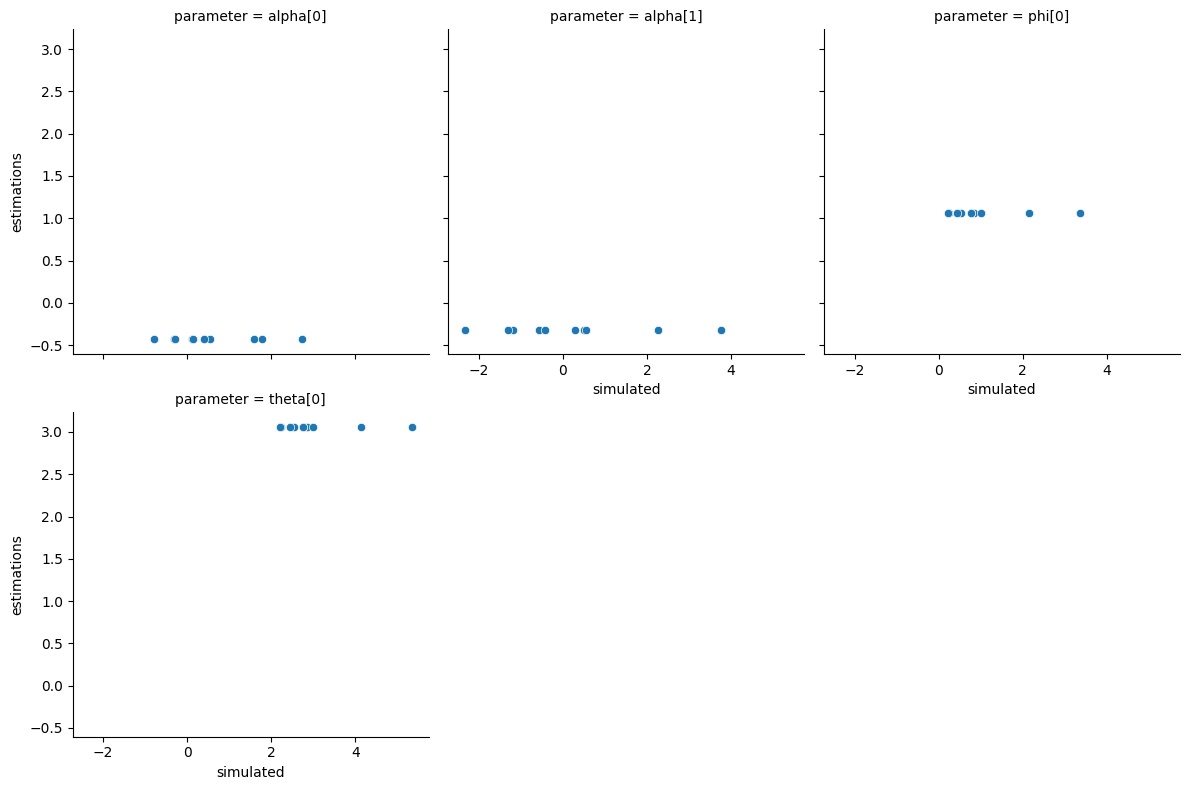

In [63]:
from main import *
import pandas as pd


def model(gid, applications, admit):
    phi = dist.exponential(1, shape=(1,), name = 'phi')
    alpha = dist.normal( 0., 1.5, shape=(2,), name = 'alpha')
    theta = numpyro.deterministic('theta', phi + 2)
    pbar = jax.nn.sigmoid(alpha[gid])
    concentration1 = pbar*theta
    concentration0 = (1 - pbar) * theta

    m.betabinomial(total_count = applications, concentration1 = concentration1, concentration0 = concentration0, obs=admit)

def sim_admit(phi, alpha, theta, pbar, applications):
    concentration1 = pbar*theta
    concentration0 = (1 - pbar) * theta
    return dist.betabinomial(total_count = applications, concentration1 = concentration1, concentration0 = concentration0,sample=True)


def estimate(phi, alpha, theta, pbar, applications):
    admit = sim_admit(phi, alpha, theta, pbar, applications) # Simulate data
    # Run model
    m = bi()
    m.data('../resources/data/UCBadmit.csv', sep=';') 
    m.df["gid"] = (m.df["applicant.gender"] != "male").astype(int)
    m.run(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(phi,alpha, theta, pbar, applications, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(phi[i], alpha[i], theta[i], pbar[i], applications)
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([alpha[i,][0][None], alpha[i,][1][None],phi[i][None],theta[i][None]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

m = bi()
nsim = 10
m.data('../resources/data/UCBadmit.csv', sep=';') 
m.df["gid"] = (m.df["applicant.gender"] != "male").astype(int)
gid=jnp.array(m.df.gid.values)
applications=jnp.array(m.df.applications.values)

N = 100
applications = bi.dist.binomial(total_count=generate_random_integers(N, 20, 900), probs=.5, sample = True)
gid = bi.dist.binomial(total_count=1, probs=.5, shape = (N,), sample = True)

phi = dist.exponential(1,  shape = (nsim,),sample=True)
alpha = dist.normal( 0., 1.5, shape=(nsim,2),sample=True)
theta = phi + 2
pbar = vmap(lambda x: jax.nn.sigmoid(x[gid]))(alpha)
param_recovery(phi,alpha, theta, pbar, applications, nsim)

## <a id='toc2_10_'></a>[Zero inflated outcomes](#toc0_)

### <a id='toc2_10_1_'></a>[BI](#toc0_)

In [ ]:
from jax.scipy.special import expit
import random as r
r.seed(42)
# Define parameters
prob_drink = 0.2  # 20% of days
rate_work = 1     # average 1 manuscript per day

# sample one year of production
N = 365

np.random.seed(365)
drink = np.random.binomial(1, prob_drink, N)
y = (1 - drink) * np.random.poisson(rate_work, N)
d = pd.DataFrame(y)
# setup platform------------------------------------------------
m = bi()
# import data ------------------------------------------------

m.data_on_model = dict(
    y = jnp.array(y)
)

def model(y):
    ap = dist.normal( -1.5, 1,  name = 'ap')
    p = expit(ap)

    al = dist.normal( 1, 0.5,  name = 'al')
    lambda_ = jnp.exp(al)    
    
    m.zeroinflatedpoisson(p, lambda_, obs=y)

# Run sampler ------------------------------------------------
m.run(model) 

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 16


sample: 100%|██████████| 1000/1000 [00:02<00:00, 442.77it/s, 3 steps of size 5.25e-01. acc. prob=0.92]


mean    sd  hdi_5.5%  hdi_94.5%
al  0.10  0.08     -0.04       0.23
ap -1.41  0.39     -1.97      -0.76

### <a id='toc2_10_2_'></a>[BIR](#toc0_)

In [61]:
%%R
library(BI)

# setup platform------------------------------------------------
m=importBI(platform='cpu')

# Simulate data ------------------------------------------------
prob_drink = 0.2  # 20% of days
rate_work = 1     # average 1 manuscript per day
# sample one year of production
N = as.integer(365)
drink = bi.dist.binomial(total_count = as.integer(1), probs = prob_drink, shape = c(N), sample = T ) # An example of sampling a distribution with BI
y = (1 - drink) *  bi.dist.poisson(rate_work, shape = c(N), sample = T)
data = list()
data$y = y 
m$data_on_model = data

# Define model ------------------------------------------------
model <- function(y){
  al =  bi.dist.normal(1, 0.5, name='al', shape=c(1))
  ap = bi.dist.normal(-1, 1, name='ap', shape=c(1))
  p = jax$scipy$special$expit(al)
  lambda_ = jnp$exp(al)
  m$zeroinflatedpoisson(p, lambda_, obs=y)
}

# Run MCMC ------------------------------------------------
m$run(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution


jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1277.84it/s, 3 steps of size 9.32e-01. acc. prob=0.90]


       mean   sd hdi_5.5% hdi_94.5%
al[0]  0.12 0.07     0.01      0.22
ap[0] -1.03 0.98    -2.40      0.74


BIR load BI as .bi do not overwrite it!
jax an jax.numpy have been imported as jax and jnp respectivelly


### <a id='toc2_10_3_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()
stan_code = """ 
data{
    array[365] int y;
}
parameters{
    real al;
    real ap;
    
}
model{
    real p;
    real lambda;
    al ~ normal( 1 , 0.5 );
    ap ~ normal( -1.5 , 1 );   
    
    lambda = al;
    lambda = exp(lambda);
    p = ap;
    p = inv_logit(p);
    for ( i in 1:365 ) {
        if ( y[i]==0 )
            target += log_mix( p , 0 , poisson_lpmf(0|lambda) );
        if ( y[i] > 0 )
            target += log1m( p ) + poisson_lpmf(y[i] | lambda );
    }
}
"""
data = {
    'y' :d.iloc[:,0].values.astype(int)
}
start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...

INFO:aiohttp.access:127.0.0.1 [14/Jan/2025:15:16:51 +0100] "POST /v1/models/qatnz6uu/params HTTP/1.1" 404 250 "-" "Python/3.10 aiohttp/3.9.3"
INFO:httpstan:Building model-specific services extension module for `models/qatnz6uu`.
INFO:root:building 'stan_services_model_qatnz6uu' extension
INFO:root:creating build/temp.linux-x86_64-cpython-310/home/sosa/.cache/httpstan/4.12.0/models/qatnz6uu
INFO:root:x86_64-linux-gnu-gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -DBOOST_DISABLE_ASSERTS -DBOOST_PHOENIX_NO_VARIADIC_EXPRESSION -DSTAN_THREADS -D_REENTRANT -D_GLIBCXX_USE_CXX11_ABI=0 -I/home/sosa/.cache/httpstan/4.12.0/models/qatnz6uu -I/home/sosa/.local/lib/python3.10/site-packages/httpstan/include -I/usr/include/python3.10 -c /home/sosa/.cache/httpstan/4.12.0/models/qatnz6uu/model_qatnz6uu.cpp -o build/temp.linux-x86_64-cpython-310/home/sosa/.cache/httpstan/4.12.0/models/qatnz6uu/model_qa


Building: 12.4s, done.INFO:aiohttp.access:127.0.0.1 [14/Jan/2025:15:17:04 +0100] "POST /v1/models/qatnz6uu/params HTTP/1.1" 200 312 "-" "Python/3.10 aiohttp/3.9.3"
Sampling:   0%INFO:aiohttp.access:127.0.0.1 [14/Jan/2025:15:17:04 +0100] "POST /v1/models/qatnz6uu/fits HTTP/1.1" 201 274 "-" "Python/3.10 aiohttp/3.9.3"
INFO:aiohttp.access:127.0.0.1 [14/Jan/2025:15:17:04 +0100] "GET /v1/operations/tv43diy4 HTTP/1.1" 200 323 "-" "Python/3.10 aiohttp/3.9.3"

Sampling:   0% (1/1000)INFO:aiohttp.access:127.0.0.1 [14/Jan/2025:15:17:04 +0100] "GET /v1/operations/tv43diy4 HTTP/1.1" 200 323 "-" "Python/3.10 aiohttp/3.9.3"

Sampling:  30% (300/1000)INFO:aiohttp.access:127.0.0.1 [14/Jan/2025:15:17:04 +0100] "GET /v1/operations/tv43diy4 HTTP/1.1" 200 326 "-" "Python/3.10 aiohttp/3.9.3"

Sampling: 100% (1000/1000)INFO:httpstan:Operation `operations/tv43diy4` finished.
INFO:aiohttp.access:127.0.0.1 [14/Jan/2025:15:17:04 +0100] "GET /v1/operations/tv43diy4 HTTP/1.1" 200 378 "-" "Python/3.10 aiohttp/3.9

Pystan took: 12.7397 seconds


### <a id='toc2_10_4_'></a>[Output comparison](#toc0_)

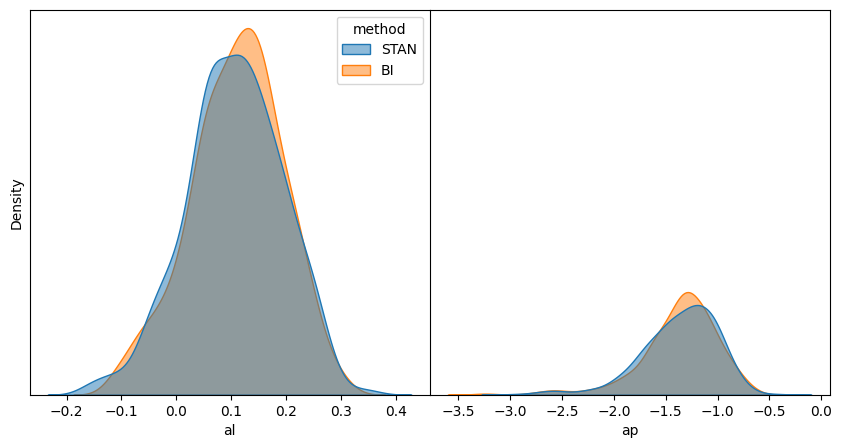

<module 'matplotlib.pyplot' from '/home/sosa/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [ ]:
plot_comparaison(m, df)

### <a id='toc2_10_5_'></a>[Parameter recovery](#toc0_)

jax.local_device_count 32
jax.local_device_count 32


/tmp/ipykernel_1834/3787209438.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)


jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_de

sim parameter  simulated  estimations
0     0        al   0.195575         0.44
1     0        ap   0.000000         3.90
2     1        al   0.170172         0.07
3     1        ap   1.000000        -1.68
4     2        al   0.196921         0.09
..   ..       ...        ...          ...
195  97        ap   2.000000        -2.51
196  98        al   0.113643         0.44
197  98        ap   0.000000         3.90
198  99        al   0.453432         0.44
199  99        ap   0.000000         3.90

[200 rows x 4 columns]

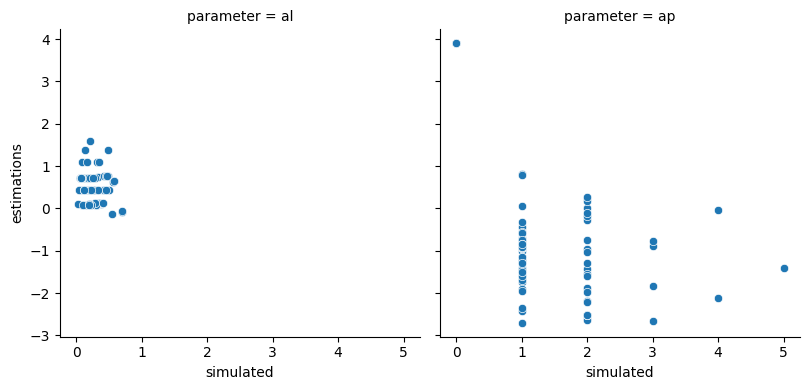

In [ ]:
from main import *
import pandas as pd
from jax.scipy.special import expit

def model(y):
    ap = dist.normal( -1.5, 1, shape=(1,), name = 'ap')
    p = expit(ap)

    al = dist.normal( 1, 0.5, shape=(1,) , name = 'al')
    lambda_ = jnp.exp(al)    
    
    m.lk("y", dist.zeroinflatedpoisson(p, lambda_), obs=y)

def sim_prod(prob_drink, rate_work ):
    drink = bi.dist.binomial(1, prob_drink, shape=(365,),sample=True)
    y = (1 - drink) *  bi.dist.poisson(rate_work, shape=(365,),sample=True)
    return drink, y
    
def estimate(prob_drink, rate_work):
    drink, y = sim_prod(prob_drink, rate_work) # Simulate data
    # Run model
    m = bi()
    m.data_on_model = dict(y = y)
    m.run(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(prob_drink, rate_work,  nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(prob_drink[i], rate_work[i])
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([prob_drink[i][None], rate_work[i][None]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

m = bi()
nsim = 100
prob_drink = bi.dist.beta(2, 5, shape=(nsim,), sample=True)
rate_work = bi.dist.poisson(1, shape=(nsim,), sample=True)
param_recovery(prob_drink, rate_work, nsim)

## <a id='toc2_11_'></a>[OrderedLogistic (Todo: PB)](#toc0_)

In [ ]:
#import numpyro.distributions as dist
## setup platform------------------------------------------------
#m = bi()
## import data ------------------------------------------------
#m.data('resources/data/Trolley.csv', sep=';') 
#d = m.df
## discrete proportion of each response value
#pr_k = d.response.value_counts().sort_index().values / d.shape[0]
## cumsum converts to cumulative proportions
#cum_pr_k = jnp.cumsum(pr_k, -1)
#logit = lambda x: jnp.log(x / (1 - x))  # convenience function
#lco = logit(cum_pr_k)

In [ ]:
#import numpyro.distributions as distnp
#from numpyro.distributions.transforms import OrderedTransform
## setup platform------------------------------------------------
#m = bi()
#m.data_on_model = dict(response = jnp.array(d.response.values - 1))
#def model(response):
#    cutpoints = numpyro.sample(
#        
#        distnp.TransformedDistribution("cutpoints",
#            distnp.Normal(0, 1.5), OrderedTransform()
#        ),
#    )
#    numpyro.sample("R", dist.OrderedLogistic(0, cutpoints), obs=response)
#
## Run sampler ------------------------------------------------
#start = tm.time()    
#m.run(model) 
#end = tm.time()    
#print(f"BI took: {end - start:.4f} seconds")
#
## Diagnostic ------------------------------------------------
#m.sampler.print_summary(0.89)

## <a id='toc2_12_'></a>[Varying interceps](#toc0_)

### <a id='toc2_12_1_'></a>[BI](#toc0_)

In [ ]:
# setup platform------------------------------------------------
m = bi()
# import data ------------------------------------------------
m.data('../resources/data/reedfrogs.csv', sep=';') 
m.df["tank"] = np.arange(m.df.shape[0])
#tank = jnp.array(m.df["tank"].astype('int32').values)
#density = jnp.array(m.df["density"].astype('float32').values)
#surv = jnp.array(m.df["surv"].astype('int32').values)
#m.data_on_model = dict(
#    tank = tank,
#    surv = surv
#)

def model(tank, surv, density):
    sigma = dist.exponential( 1,  name = 'sigma')
    a_bar = dist.normal( 0., 1.5,  name = 'a_bar')
    alpha = dist.normal( a_bar, sigma, shape= tank.shape, name = 'alpha')
    p = alpha[tank]
    print(p.shape)
    m.binomial(total_count = density, logits = p, obs=surv)

# Run sampler ------------------------------------------------
m.run(model) 

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 16
(48,)
(48,)


  0%|          | 0/1000 [00:00<?, ?it/s]

(48,)


sample: 100%|██████████| 1000/1000 [00:03<00:00, 329.79it/s, 7 steps of size 4.26e-01. acc. prob=0.88]


(48,)
(48,)


mean    sd  hdi_5.5%  hdi_94.5%
a_bar      1.34  0.25      1.00       1.75
alpha[0]   2.14  0.85      0.81       3.46
alpha[1]   3.06  1.06      1.44       4.62
alpha[2]   1.05  0.67      0.08       2.18
alpha[3]   3.07  1.05      1.57       4.82
alpha[4]   2.16  0.87      0.84       3.59
alpha[5]   2.18  0.89      0.74       3.45
alpha[6]   3.08  1.05      1.14       4.48
alpha[7]   2.19  0.88      0.89       3.50
alpha[8]  -0.17  0.60     -1.11       0.70
alpha[9]   2.06  0.82      0.75       3.26
alpha[10]  1.07  0.74     -0.06       2.26
alpha[11]  0.59  0.60     -0.48       1.41
alpha[12]  1.00  0.73     -0.41       1.93
alpha[13]  0.25  0.60     -0.76       1.12
alpha[14]  2.17  0.85      0.76       3.40
alpha[15]  2.09  0.91      0.82       3.60
alpha[16]  2.89  0.78      1.74       4.07
alpha[17]  2.42  0.65      1.42       3.47
alpha[18]  2.05  0.60      1.18       3.04
alpha[19]  3.65  1.02      2.02       5.07
alpha[20]  2.35  0.62      1.34       3.32
alpha[21]  2.41  0.72      1.40       3.59
alpha[22]  2.41  0.65      1.33       3.35
alpha[23]  1.69  0.52      0.85       2.45
alpha[24] -0.97  0.44     -1.56      -0.21
alpha[25]  0.13  0.44     -0.49       0.79
alpha[26] -1.43  0.49     -2.23      -0.73
alpha[27] -0.44  0.40     -1.02       0.25
alpha[28]  0.19  0.42     -0.52       0.79
alpha[29]  1.47  0.50      0.74       2.27
alpha[30] -0.62  0.44     -1.35       0.01
alpha[31] -0.35  0.45     -1.06       0.36
alpha[32]  3.16  0.82      1.82       4.30
alpha[33]  2.69  0.61      1.70       3.64
alpha[34]  2.75  0.70      1.80       3.92
alpha[35]  2.07  0.49      1.40       2.94
alpha[36]  2.06  0.50      1.26       2.82
alpha[37]  3.89  0.95      2.33       5.21
alpha[38]  2.66  0.62      1.54       3.46
alpha[39]  2.33  0.53      1.52       3.08
alpha[40] -1.81  0.46     -2.63      -1.21
alpha[41] -0.58  0.34     -1.05      -0.00
alpha[42] -0.45  0.35     -0.99       0.13
alpha[43] -0.33  0.34     -0.86       0.28
alpha[44]  0.58  0.32      0.07       1.09
alpha[45] -0.58  0.37     -1.10       0.05
alpha[46]  2.06  0.50      1.29       2.83
alpha[47]  0.00  0.35     -0.56       0.54
sigma      1.61  0.20      1.26       1.87

### <a id='toc2_12_2_'></a>[BIR](#toc0_)

In [63]:
%%R
library(BI)

# setup platform------------------------------------------------
m=importBI(platform='cpu')

# Import data ------------------------------------------------
m$data(paste(system.file(package = "BI"),"/data/reedfrogs.csv", sep = ''), sep=';')
m$df$tank = c(0:(nrow(m$df)-1)) # Manipulate
m$data_to_model(list('tank', 'surv', 'density')) # Manipulate
m$data_on_model$tank = m$data_on_model$tank$astype(jnp$int32) # Manipulate
m$data_on_model$surv = m$data_on_model$surv$astype(jnp$int32) # Manipulate


# Define model ------------------------------------------------
model <- function(tank, surv, density){
  # Parameters priors distributions
  sigma = bi.dist.exponential( 1,  name = 'sigma',shape=c(1))
  a_bar =  bi.dist.normal(0, 1.5, name='a_bar',shape=c(1))
  alpha = bi.dist.normal(a_bar, sigma, name='alpha', shape =c(48))
  p = alpha[tank]
  # Likelihood
  m$binomial(total_count = density, logits = p, obs=surv)
} 

# Run MCMC ------------------------------------------------
m$run(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:00<00:00, 1060.63it/s, 7 steps of size 4.80e-01. acc. prob=0.85]


           mean   sd hdi_5.5% hdi_94.5%
a_bar[0]   1.34 0.25     0.94      1.72
alpha[0]   2.08 0.86     0.81      3.42
alpha[1]   3.06 1.04     1.41      4.56
alpha[2]   1.00 0.67     0.12      2.25
alpha[3]   3.10 1.17     1.32      4.88
alpha[4]   2.07 0.85     0.59      3.19
alpha[5]   2.15 0.89     0.69      3.46
alpha[6]   3.08 1.08     1.51      4.79
alpha[7]   2.13 0.87     0.83      3.48
alpha[8]  -0.15 0.61    -1.08      0.84
alpha[9]   2.10 0.82     0.67      3.23
alpha[10]  1.00 0.70     0.00      2.24
alpha[11]  0.53 0.62    -0.46      1.46
alpha[12]  1.07 0.68     0.09      2.09
alpha[13]  0.17 0.60    -0.71      1.19
alpha[14]  2.12 0.83     0.90      3.57
alpha[15]  2.10 0.83     0.84      3.39
alpha[16]  2.95 0.86     1.71      4.29
alpha[17]  2.37 0.66     1.24      3.32
alpha[18]  2.01 0.56     1.05      2.82
alpha[19]  3.69 1.00     2.25      5.12
alpha[20]  2.34 0.61     1.36      3.21
alpha[21]  2.44 0.68     1.42      3.51
alpha[22]  2.36 0.68     1.34      3.41


BIR load BI as .bi do not overwrite it!
jax an jax.numpy have been imported as jax and jnp respectivelly


### <a id='toc2_12_3_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
try:
  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
except:
  pass

nest_asyncio.apply()
stan_code = """ 
data{
    array[48] int N;
    array[48] int S;
    array[48] int tank;
}
parameters{
    real a_bar;
    vector[48] a;    
    real<lower=0> sigma;
}
model{
    vector[48] p;
    sigma ~ exponential( 1 );
    a_bar ~ normal( 0 , 1.5 );
    a ~ normal( a_bar , sigma );
    for ( i in 1:48 ) {
        p[i] = a[tank[i]];
        p[i] = inv_logit(p[i]);
    }
    S ~ binomial( N , p );
}
"""
data = {
    'S' : m.df['surv'].values.astype(int),
    'N' : m.df['density'].values.astype(int),
    'tank' : m.df['tank'].values.astype(int)+1,
}
start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: 13.0s, done.Sampling:   0%
Sampling: 100% (1000/1000)
Sampling: 100% (1000/1000), done.
Messages received during sampling:
  Gradient evaluation took 2.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
  Adjust your expectations accordingly!


Pystan took: 13.1819 seconds


### <a id='toc2_12_4_'></a>[Output comparison](#toc0_)

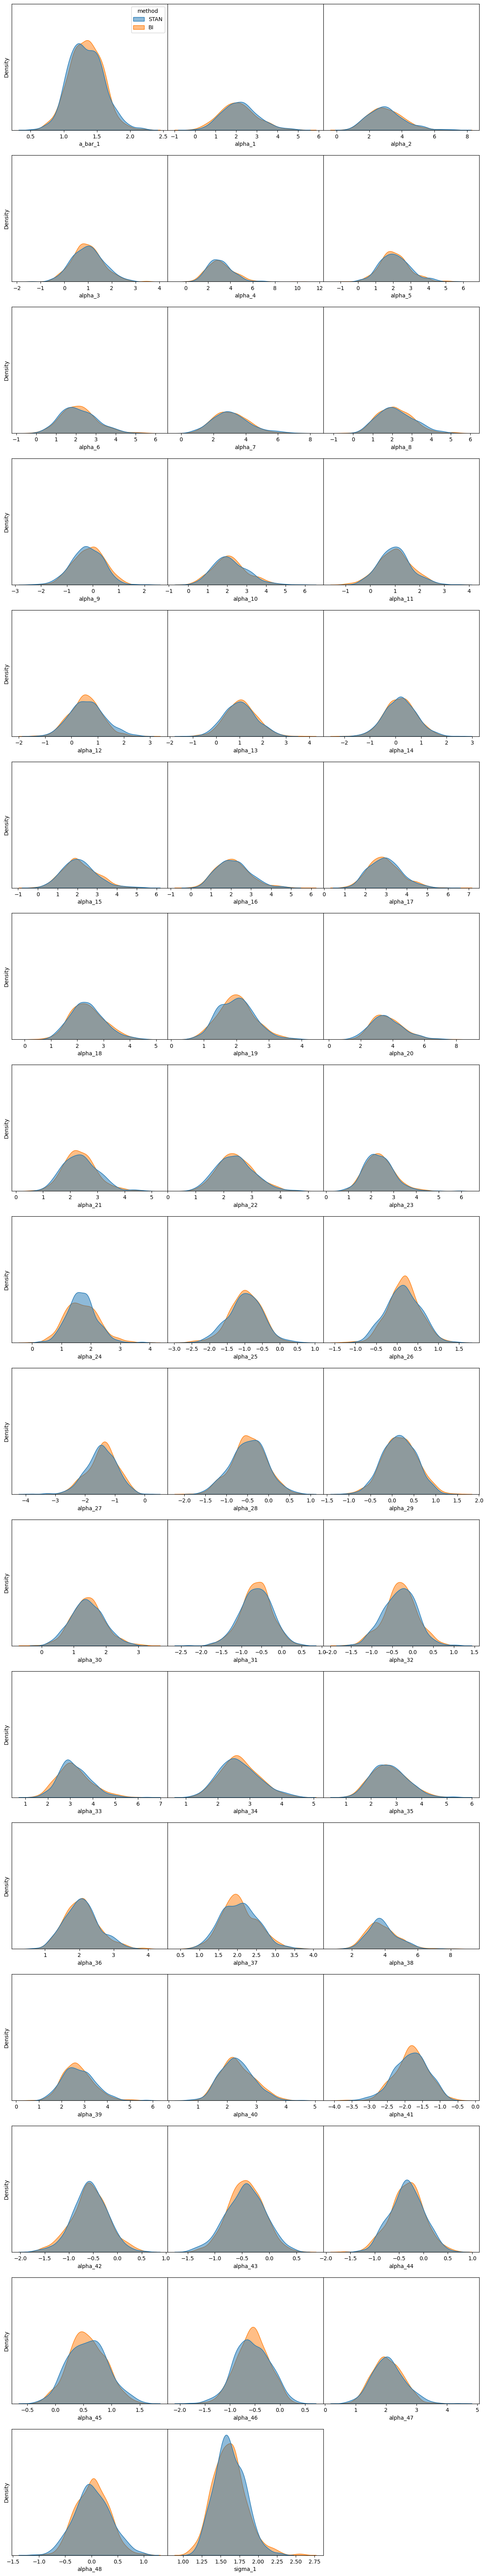

<module 'matplotlib.pyplot' from '/home/sosa/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [ ]:
plot_comparaison(m, df)

### <a id='toc2_12_5_'></a>[Parameter recovery](#toc0_)

jax.local_device_count 32
jax.local_device_count 32


/tmp/ipykernel_1834/4237718991.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)


jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_device_count 32
jax.local_de

sim  parameter  simulated  estimations
0      0   a_bar[0]  -3.801633        -3.71
1      0   alpha[0]  -3.813515        -3.75
2      0   alpha[1]  -3.810812        -3.58
3      0   alpha[2]  -3.795698        -3.75
4      0   alpha[3]  -3.802860        -3.79
...   ..        ...        ...          ...
4995  99  alpha[44]  -2.491672        -2.38
4996  99  alpha[45]  -2.570343        -2.37
4997  99  alpha[46]  -2.462574        -2.42
4998  99  alpha[47]  -2.438176        -2.38
4999  99   sigma[0]   0.049484         0.19

[5000 rows x 4 columns]

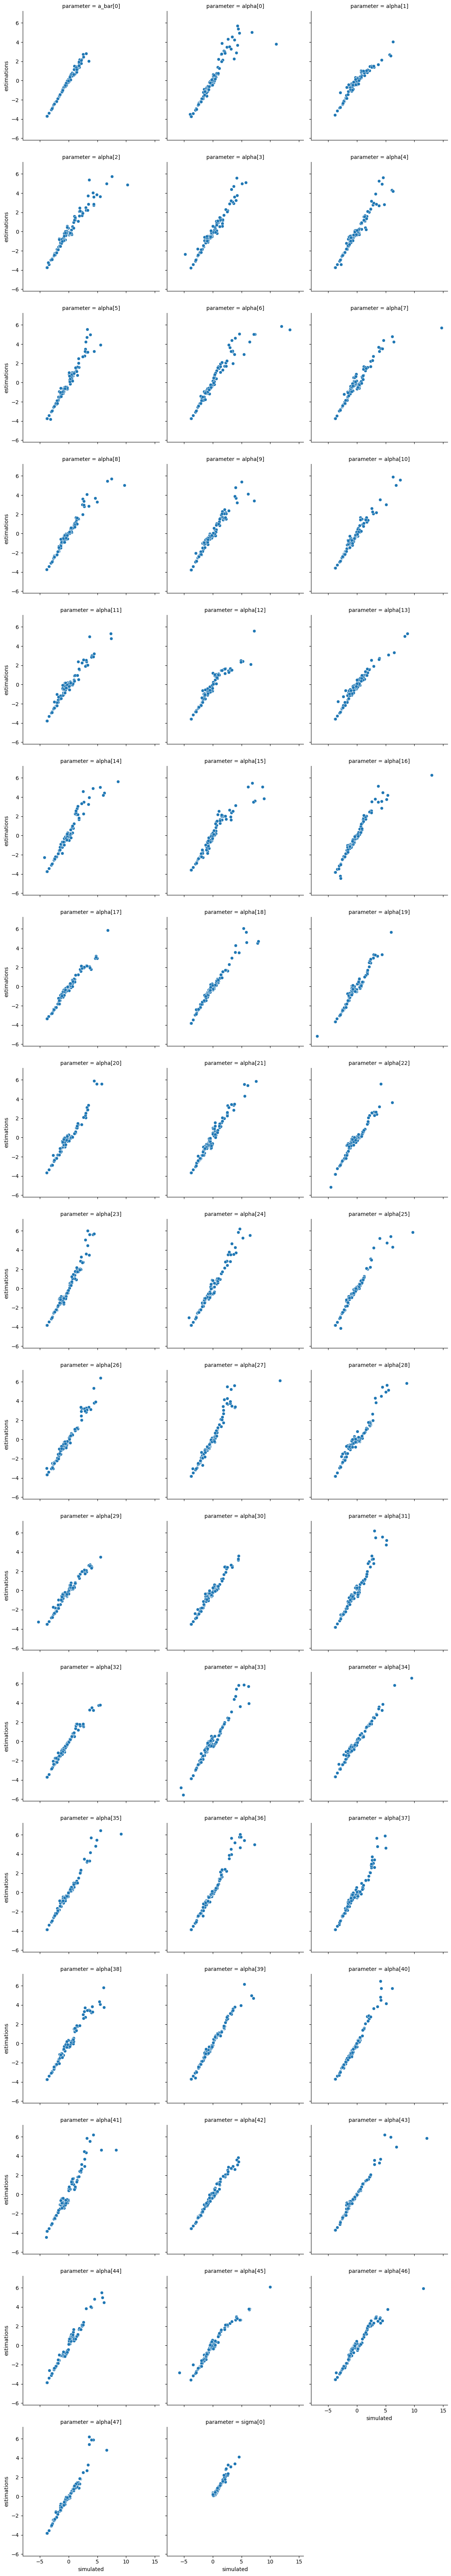

In [ ]:
from main import *
import pandas as pd


def model(tank, surv, density):
    sigma = dist.exponential( 1, shape=(1,), name = 'sigma')
    a_bar = dist.normal( 0., 1.5, shape=(1,), name = 'a_bar')
    alpha = dist.normal( a_bar, sigma, shape= tank.shape, name = 'alpha')
    p = alpha[tank]
    print(p.shape)
    m.lk("y", m.binomial(total_count = density, logits = p), obs=surv)

def sim_surv(tank, density, sigma, a_bar, alpha):
    p = alpha[tank]
    return dist.binomial(total_count = density, logits = p, sample=True)

def estimate(tank, density, sigma, a_bar, alpha):
    surv = sim_surv(tank, density, sigma, a_bar, alpha) # Simulate data
    # Run model
    m = bi()
    m.data('../resources/data/reedfrogs.csv', sep=';') 
    m.df["tank"] = np.arange(m.df.shape[0])
    m.df['surv']=surv
    m.run(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(tank, density, sigma, a_bar, alpha, nsim):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(tank, density, sigma[i], a_bar[i], alpha[:,i,0])
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([a_bar[i], alpha[:,i,0], sigma[i]]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

m = bi()
m.data('../resources/data/reedfrogs.csv', sep=';') 
nsim = 100
m.df["tank"] = np.arange(m.df.shape[0])
tank = jnp.array(m.df["tank"].values)
density = jnp.array(m.df["density"].values)
sigma = dist.exponential( 1, shape = (nsim,1),  sample=True)
a_bar = dist.normal( 0., 1.5,  shape = (nsim,1), sample=True)    
alpha = dist.normal( a_bar, sigma, shape= tank.shape, name = 'alpha', sample=True)
param_recovery(tank, density, sigma, a_bar, alpha, nsim)

## <a id='toc2_13_'></a>[Varying effects](#toc0_)

### <a id='toc2_13_1_'></a>[Data simulation](#toc0_)

In [ ]:
import numpyro.distributions as dd
import pandas as pd
import os
import sys
newPath = os.path.dirname(os.path.abspath(""))
if newPath not in sys.path:
    sys.path.append(newPath)

from main import *
import time as tm
# setup platform------------------------------------------------
m = bi(platform='cpu')

a = 3.5  # average morning wait time
b = -1  # average difference afternoon wait time
sigma_a = 1  # std dev in intercepts
sigma_b = 0.5  # std dev in slopes
rho = -0.7  # correlation between intercepts and slopes
Mu = jnp.array([a, b])
cov_ab = sigma_a * sigma_b * rho
Sigma = jnp.array([[sigma_a**2, cov_ab], [cov_ab, sigma_b**2]])
jnp.array([1, 2, 3, 4]).reshape(2, 2).T
sigmas = jnp.array([sigma_a, sigma_b])  # standard deviations
Rho = jnp.array([[1, rho], [rho, 1]])  # correlation matrix

# now matrix multiply to get covariance matrix
Sigma = jnp.diag(sigmas) @ Rho @ jnp.diag(sigmas)

N_cafes = 20
seed = random.PRNGKey(5)  # used to replicate example
vary_effects = bi.dist.multivariatenormal(Mu, Sigma, shape=(N_cafes,), sample = True)
a_cafe = vary_effects[:, 0]
b_cafe = vary_effects[:, 1]

seed = random.PRNGKey(22)
N_visits = 10
afternoon = jnp.tile(jnp.arange(2), N_visits * N_cafes // 2)
cafe_id = jnp.repeat(jnp.arange(N_cafes), N_visits)
mu = a_cafe[cafe_id] + b_cafe[cafe_id] * afternoon
sigma = 0.5  # std dev within cafes
wait = dist.normal(mu, sigma, sample = True)
d = pd.DataFrame(dict(cafe=cafe_id, afternoon=afternoon, wait=wait))
d.to_csv('../resources/data/Sim data multivariatenormal.csv', index=False)

jax.local_device_count 32


### <a id='toc2_13_2_'></a>[BI](#toc0_)

In [4]:
# import data ------------------------------------------------
m = bi()
m.data('../resources/data/Sim data multivariatenormal.csv', sep = ',')

m.data_on_model = dict(
    cafe = jnp.array(m.df.cafe.values, dtype=jnp.int32),
    wait = jnp.array(m.df.wait.values, dtype=jnp.float32),
    N_cafes = len(m.df.cafe.unique()),
    afternoon = jnp.array(m.df.afternoon.values, dtype=jnp.float32)
)

def model(cafe, wait, N_cafes, afternoon):
    a = dist.normal(5, 2,  name = 'a')
    b = dist.normal(-1, 0.5, name = 'b')
    sigma_cafe = dist.exponential(1, shape=(2,),  name = 'sigma_cafe')
    sigma = dist.exponential( 1,  name = 'sigma')
    Rho = dist.lkj(2, 2, name = 'Rho')
    cov = jnp.outer(sigma_cafe, sigma_cafe) * Rho
    a_cafe_b_cafe = dist.multivariatenormal(jnp.stack([a, b]), cov, shape = [N_cafes], name = 'a_b_cafe')    

    a_cafe, b_cafe = a_cafe_b_cafe[:, 0], a_cafe_b_cafe[:, 1]
    mu = a_cafe[cafe] + b_cafe[cafe] * afternoon
    m.normal(mu, sigma, obs=wait)

# Run sampler ------------------------------------------------
m.run(model) 

# Diagnostic ------------------------------------------------
m.summary()

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:01<00:00, 607.87it/s, 15 steps of size 2.46e-01. acc. prob=0.89]


mean    sd  hdi_5.5%  hdi_94.5%
Rho[0, 0]        1.00  0.00      1.00       1.00
Rho[0, 1]       -0.68  0.16     -0.92      -0.43
Rho[1, 0]       -0.68  0.16     -0.92      -0.43
Rho[1, 1]        1.00  0.00      1.00       1.00
a                3.55  0.22      3.19       3.90
a_b_cafe[0, 0]   2.99  0.21      2.72       3.35
a_b_cafe[0, 1]  -0.65  0.26     -1.05      -0.24
a_b_cafe[1, 0]   1.99  0.21      1.63       2.30
a_b_cafe[1, 1]  -0.17  0.28     -0.63       0.24
a_b_cafe[2, 0]   2.86  0.20      2.52       3.15
a_b_cafe[2, 1]  -0.67  0.24     -1.02      -0.29
a_b_cafe[3, 0]   4.45  0.20      4.14       4.74
a_b_cafe[3, 1]  -1.34  0.23     -1.65      -0.95
a_b_cafe[4, 0]   3.34  0.20      3.05       3.68
a_b_cafe[4, 1]  -1.10  0.26     -1.46      -0.67
a_b_cafe[5, 0]   3.81  0.21      3.52       4.21
a_b_cafe[5, 1]  -0.88  0.24     -1.29      -0.55
a_b_cafe[6, 0]   4.49  0.21      4.15       4.79
a_b_cafe[6, 1]  -1.52  0.25     -1.90      -1.12
a_b_cafe[7, 0]   3.51  0.21      3.18       3.84
a_b_cafe[7, 1]  -1.04  0.24     -1.39      -0.68
a_b_cafe[8, 0]   3.69  0.20      3.34       3.99
a_b_cafe[8, 1]  -1.14  0.25     -1.51      -0.69
a_b_cafe[9, 0]   3.03  0.21      2.73       3.39
a_b_cafe[9, 1]  -1.05  0.25     -1.45      -0.65
a_b_cafe[10, 0]  4.65  0.21      4.29       4.95
a_b_cafe[10, 1] -1.11  0.26     -1.55      -0.75
a_b_cafe[11, 0]  4.05  0.21      3.75       4.42
a_b_cafe[11, 1] -0.90  0.25     -1.27      -0.46
a_b_cafe[12, 0]  3.75  0.21      3.45       4.10
a_b_cafe[12, 1] -0.56  0.29     -1.04      -0.17
a_b_cafe[13, 0]  3.52  0.19      3.22       3.82
a_b_cafe[13, 1] -1.07  0.24     -1.44      -0.69
a_b_cafe[14, 0]  4.08  0.20      3.78       4.42
a_b_cafe[14, 1] -1.36  0.27     -1.81      -0.98
a_b_cafe[15, 0]  5.02  0.21      4.68       5.31
a_b_cafe[15, 1] -1.50  0.25     -1.87      -1.10
a_b_cafe[16, 0]  1.71  0.22      1.37       2.06
a_b_cafe[16, 1] -0.34  0.27     -0.72       0.07
a_b_cafe[17, 0]  4.36  0.21      4.05       4.69
a_b_cafe[17, 1] -1.05  0.26     -1.51      -0.72
a_b_cafe[18, 0]  3.83  0.20      3.50       4.13
a_b_cafe[18, 1] -1.19  0.24     -1.61      -0.83
a_b_cafe[19, 0]  1.28  0.21      0.95       1.63
a_b_cafe[19, 1] -0.41  0.26     -0.77       0.05
b               -0.96  0.12     -1.13      -0.77
sigma            0.51  0.03      0.46       0.55
sigma_cafe[0]    1.01  0.16      0.77       1.27
sigma_cafe[1]    0.45  0.11      0.30       0.60

### <a id='toc2_13_3_'></a>[BIR](#toc0_)

In [7]:
%%R
library(BI)

# setup platform------------------------------------------------
m=importBI(platform='cpu')

# Import data ------------------------------------------------
m$data(paste(system.file(package = "BI"),"/data/Sim data multivariatenormal.csv", sep = ''), sep=',')
m$data_to_model(list('cafe', 'wait', 'afternoon'))

# Define model ------------------------------------------------
model <- function(cafe, afternoon, wait, N_cafes = as.integer(20) ){
  a = bi.dist.normal(5, 2, name = 'a')
  b = bi.dist.normal(-1, 0.5, name = 'b')
  sigma_cafe = bi.dist.exponential(1, shape= c(2), name = 'sigma_cafe')
  sigma = bi.dist.exponential( 1, name = 'sigma')
  Rho = bi.dist.lkj(as.integer(2), as.integer(2), name = 'Rho')
  cov = jnp$outer(sigma_cafe, sigma_cafe) * Rho
  
  a_cafe_b_cafe = bi.dist.multivariatenormal(
    jnp$squeeze(jnp$stack(list(a, b))), 
    cov, shape = c(N_cafes), name = 'a_cafe')  
  
  a_cafe = a_cafe_b_cafe[, 0]
  b_cafe = a_cafe_b_cafe[, 1]
  
  mu = a_cafe[cafe] + b_cafe[cafe] * afternoon
  
  m$normal(mu, sigma, obs=wait)
}

# Run MCMC ------------------------------------------------
m$run(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution

jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:01<00:00, 614.53it/s, 15 steps of size 2.82e-01. acc. prob=0.87]


               mean   sd hdi_5.5% hdi_94.5%
Rho[0, 0]      1.00 0.00     1.00      1.00
Rho[0, 1]     -0.68 0.16    -0.90     -0.43
Rho[1, 0]     -0.68 0.16    -0.90     -0.43
Rho[1, 1]      1.00 0.00     1.00      1.00
a              3.55 0.23     3.16      3.91
a_cafe[0, 0]   3.00 0.21     2.68      3.36
a_cafe[0, 1]  -0.65 0.25    -1.00     -0.24
a_cafe[1, 0]   2.01 0.21     1.68      2.37
a_cafe[1, 1]  -0.20 0.27    -0.61      0.28
a_cafe[2, 0]   2.84 0.20     2.53      3.16
a_cafe[2, 1]  -0.67 0.23    -1.03     -0.32
a_cafe[3, 0]   4.44 0.20     4.15      4.77
a_cafe[3, 1]  -1.33 0.24    -1.75     -0.97
a_cafe[4, 0]   3.32 0.20     2.99      3.63
a_cafe[4, 1]  -1.07 0.24    -1.41     -0.63
a_cafe[5, 0]   3.82 0.21     3.51      4.15
a_cafe[5, 1]  -0.89 0.24    -1.24     -0.51
a_cafe[6, 0]   4.48 0.20     4.16      4.80
a_cafe[6, 1]  -1.50 0.24    -1.84     -1.09
a_cafe[7, 0]   3.52 0.20     3.22      3.86
a_cafe[7, 1]  -1.06 0.23    -1.42     -0.71
a_cafe[8, 0]   3.67 0.21     3.3

BIR load BI as .bi do not overwrite it!
jax an jax.numpy have been imported as jax and jnp respectivelly


### <a id='toc2_13_4_'></a>[STAN](#toc0_)

In [ ]:
import stan
import nest_asyncio
import httpstan.models
import httpstan.cache
import numpy as np
#try:
#  httpstan.cache.delete_model_directory(httpstan.models.calculate_model_name(stan_code)) # Delete  model in cache
#except:
#  pass

nest_asyncio.apply()
stan_code = """ 
data{
    int len;
    int N_cafes;
    vector[len] wait;
    array[len] int afternoon;
    array[len] int cafe;
}

parameters{
    corr_matrix[2] Rho;
    real a;
    vector[N_cafes] a_cafe;
    real b;
    vector[N_cafes] b_cafe;      
    real<lower=0> sigma;
    vector<lower=0>[2] sigma_cafe;   
    
}
model{
    vector[len] mu;
    Rho ~ lkj_corr( 2 );
    sigma ~ exponential( 1 );
    sigma_cafe ~ exponential( 1 );
    b ~ normal( -1 , 0.5 );    
    a ~ normal( 5 , 2 );
    {
        array[N_cafes] vector[2] YY;
        vector[2] MU;
        MU = [ a , b ]';
        for ( j in 1:N_cafes ) YY[j] = [ a_cafe[j] , b_cafe[j] ]';
        YY ~ multi_normal( MU , quad_form_diag(Rho , sigma_cafe) );
    }
    for ( i in 1:len ) {
        mu[i] = a_cafe[cafe[i]] + b_cafe[cafe[i]] * afternoon[i];        
    }
    
    wait ~ normal( mu , sigma );

}
"""
data = {
    'wait' : d['wait'].values.astype(float),
    'afternoon' : d['afternoon'].values.astype(int),
    'cafe' : d['cafe'].values.astype(int)+1,
    'N_cafes' : N_cafes,
    'len' : len(d['wait'].values)
}
start = tm.time()
stan_model = stan.build(stan_code, data = data)
fit = stan_model.sample(num_chains=1, num_samples=500, num_warmup = 500)
end = tm.time()    
df = fit.to_frame()
print(f"Pystan took: {end - start:.4f} seconds")

Building...



Building: 28.7s, done.Messages from stanc:
Warning in '/tmp/httpstan_78l3wcq0/model_lrkdaxoz.stan', line 22, column 4: It
    is suggested to reparameterize your model to replace lkj_corr with
    lkj_corr_cholesky, the Cholesky factor variant. lkj_corr tends to run
    slower, consume more memory, and has higher risk of numerical errors.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:   0% (1/1000)
Sampling:  20% (200/1000)
Sampling:  40% (400/1000)
Sampling: 100% (1000/1000)
Sampling: 100% (1000/1000), done.
Messages received during sampling:
  Gradient evaluation took 4.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.49 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected becaus

Pystan took: 29.2269 seconds


### <a id='toc2_13_5_'></a>[Output comparison](#toc0_)

This can't use function to compare the output.

/tmp/ipykernel_1186/1260505961.py:50: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_bi[col], label=f'bi_{col}', fill=True)
/tmp/ipykernel_1186/1260505961.py:51: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(d[col], label=f'stan_{col}', fill=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


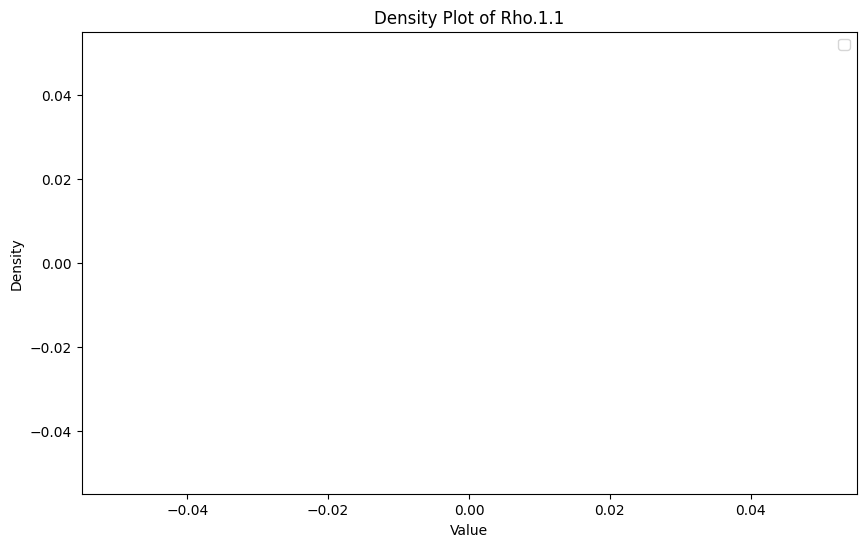

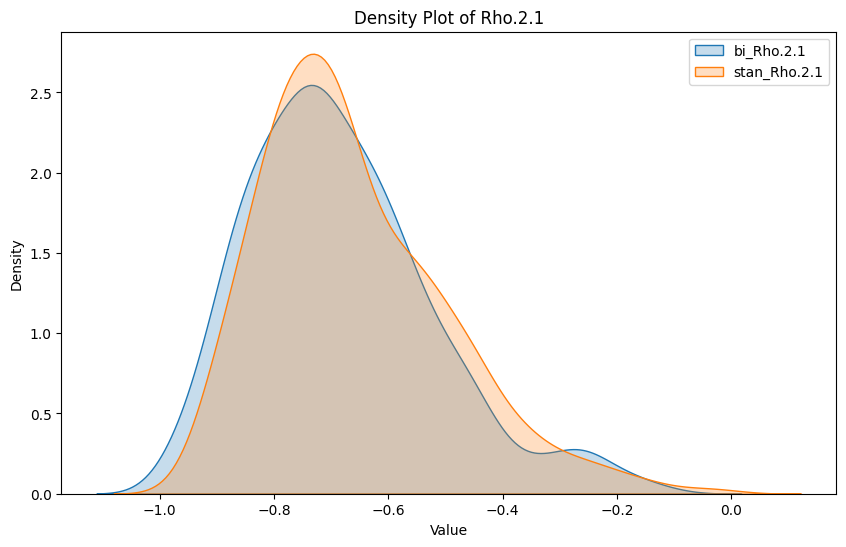

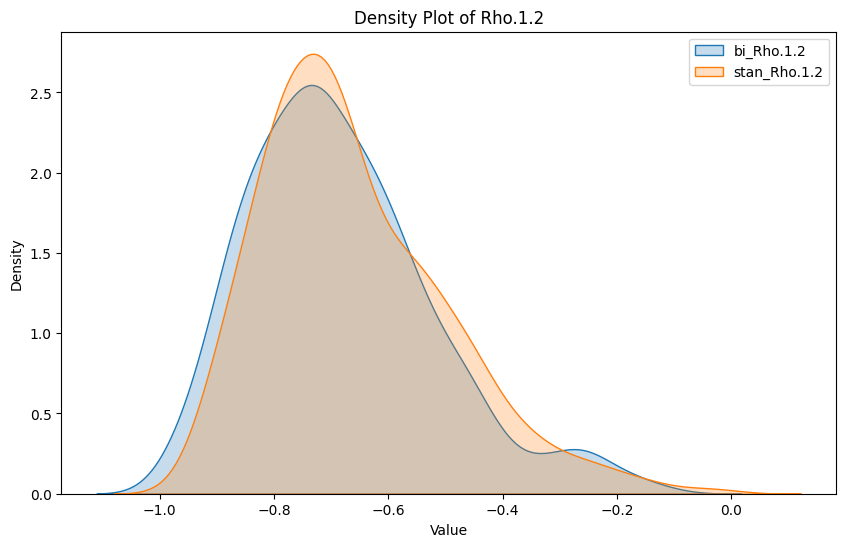

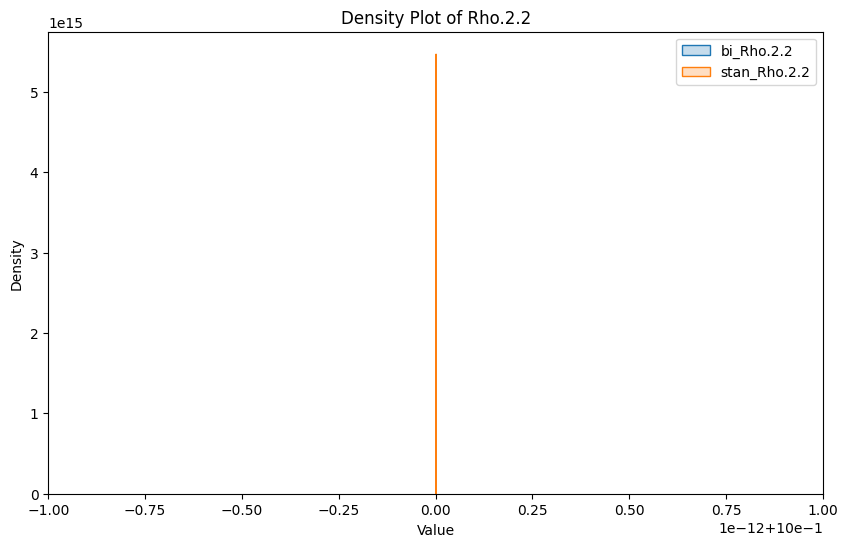

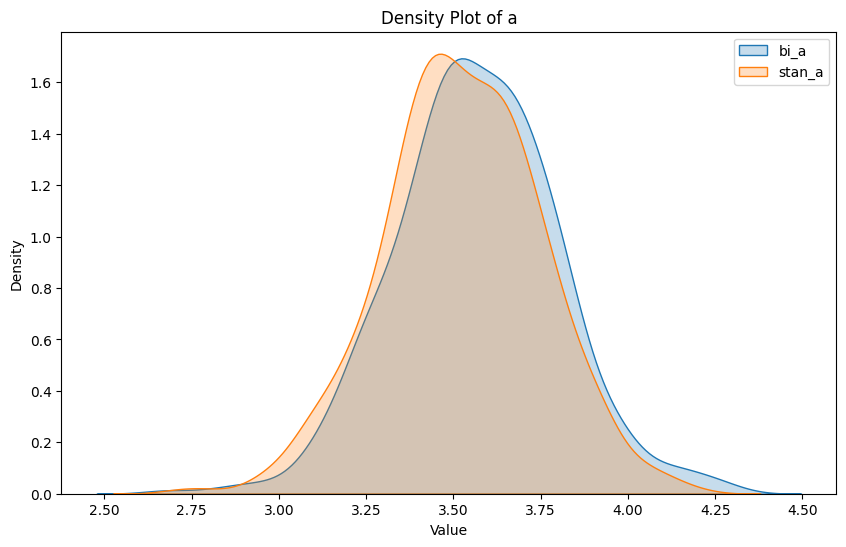

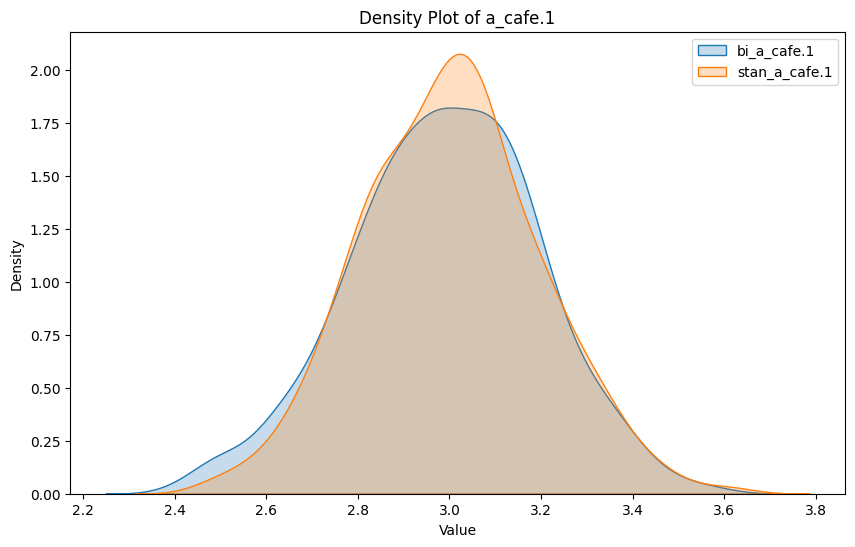

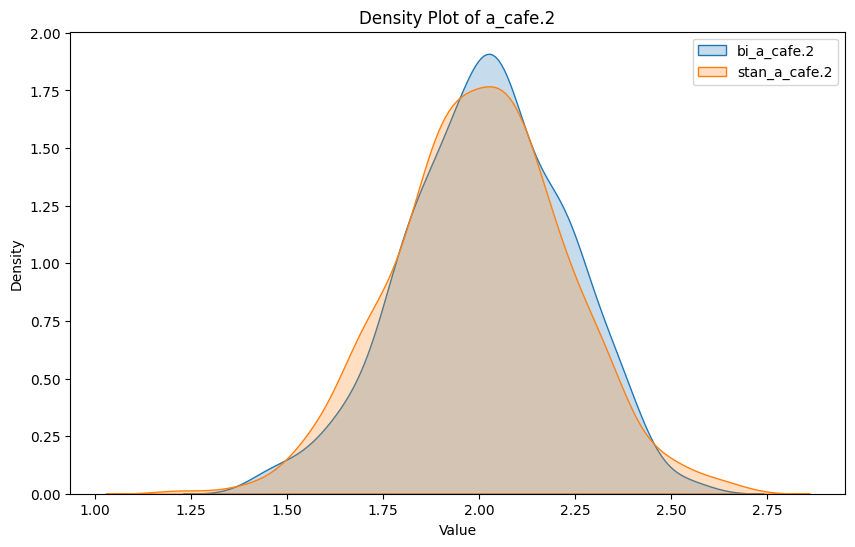

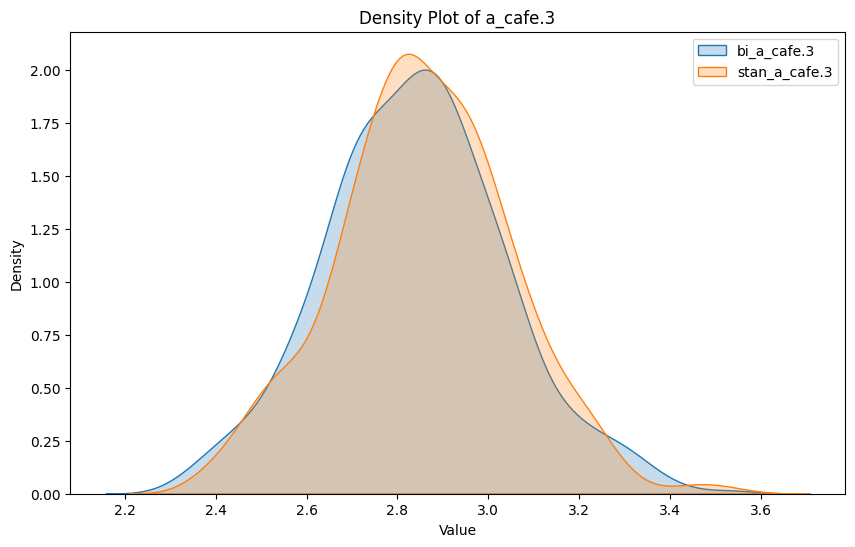

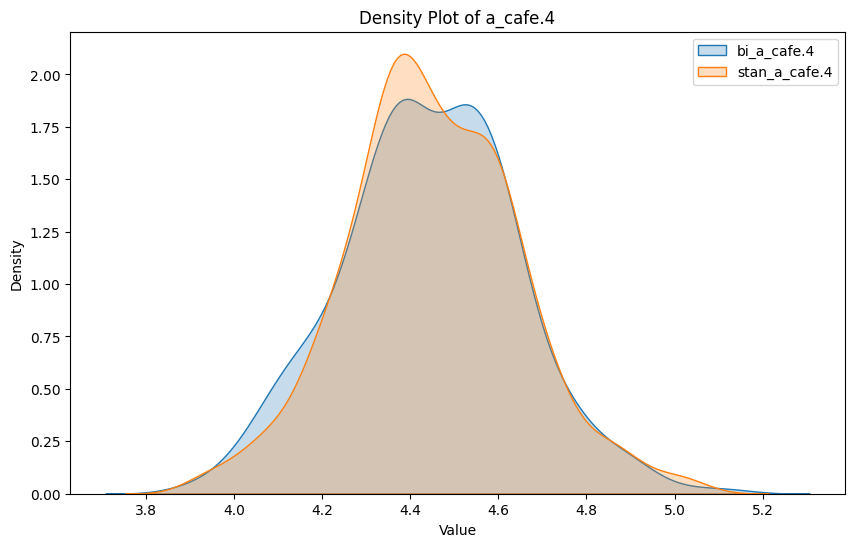

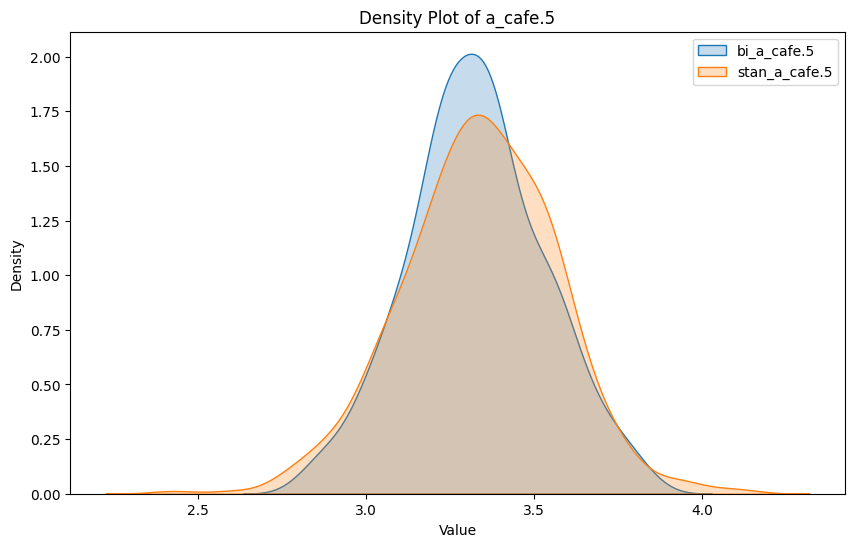

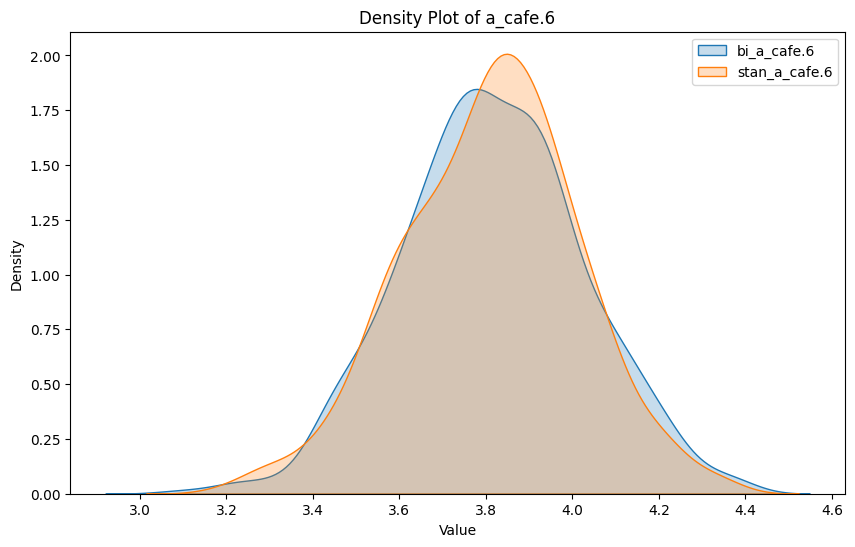

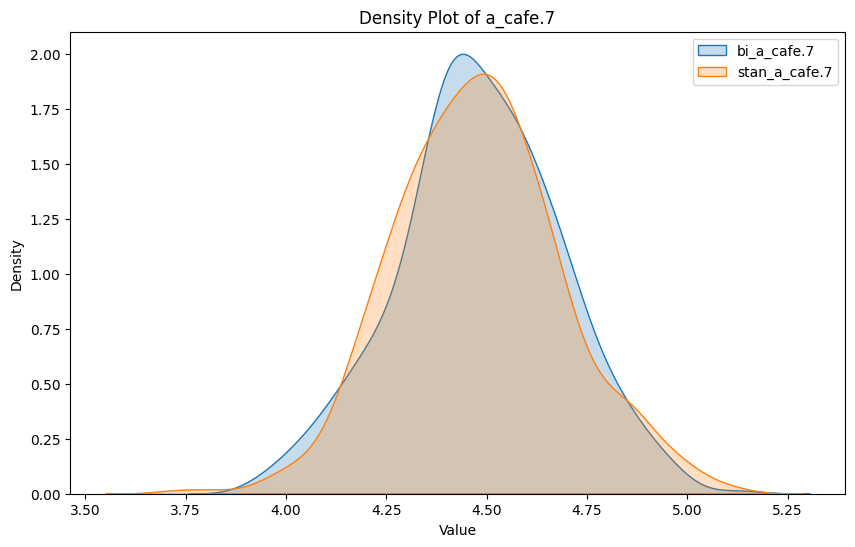

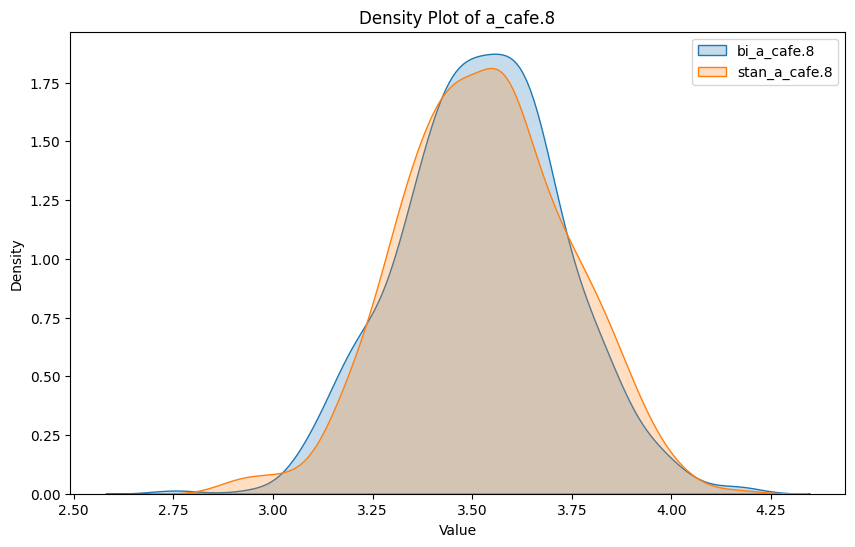

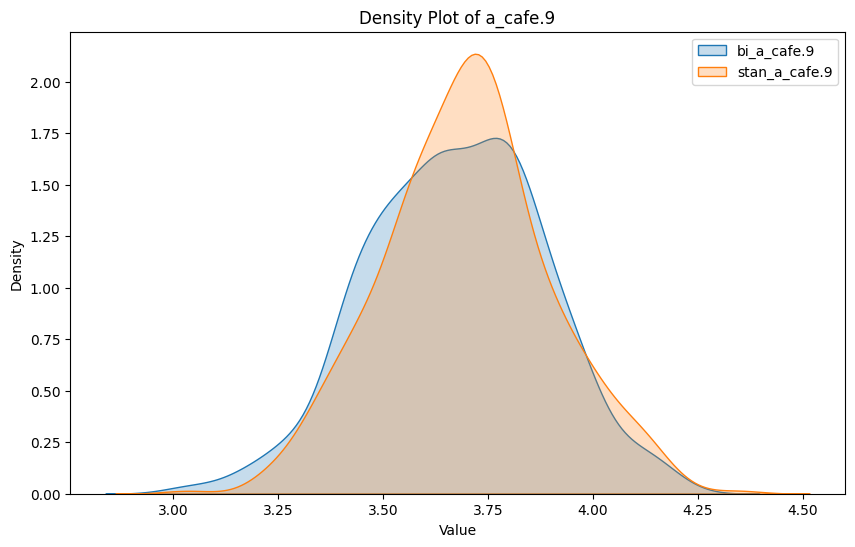

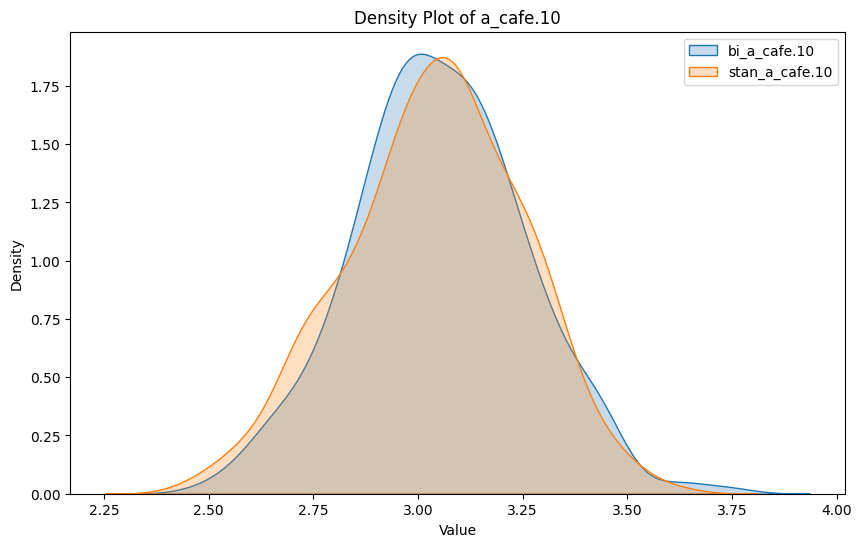

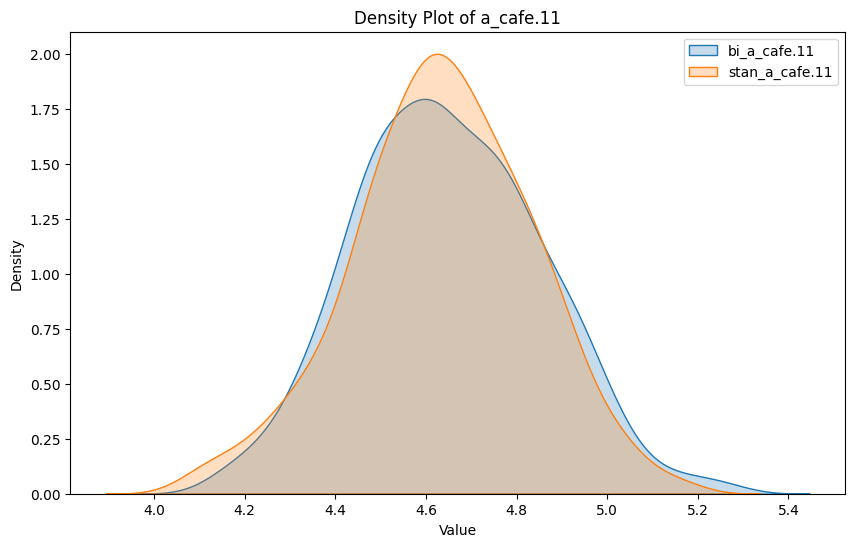

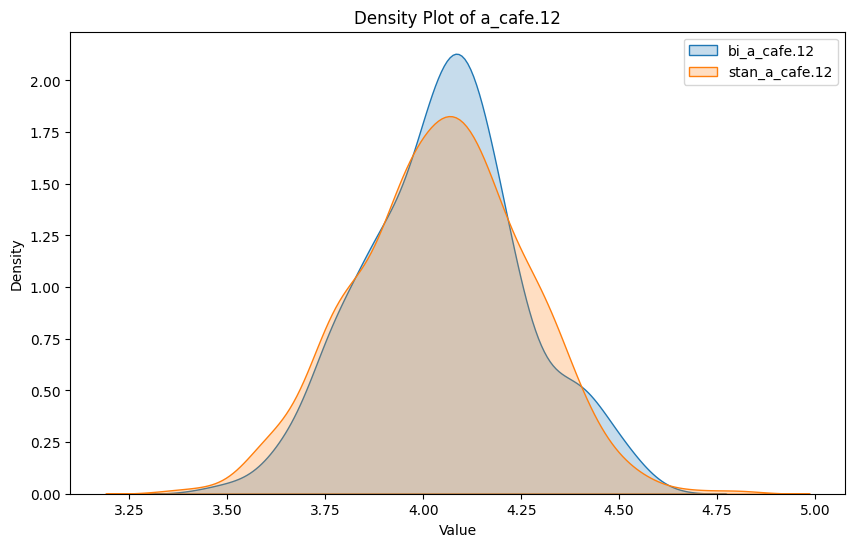

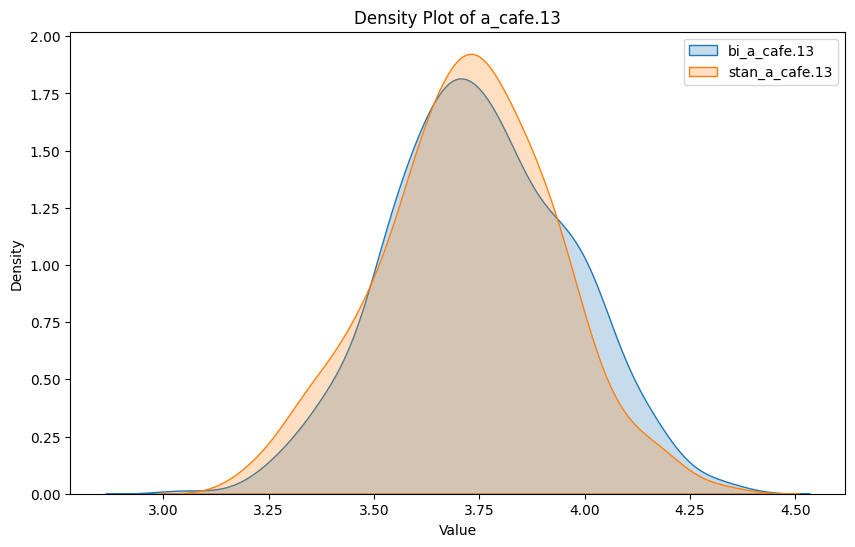

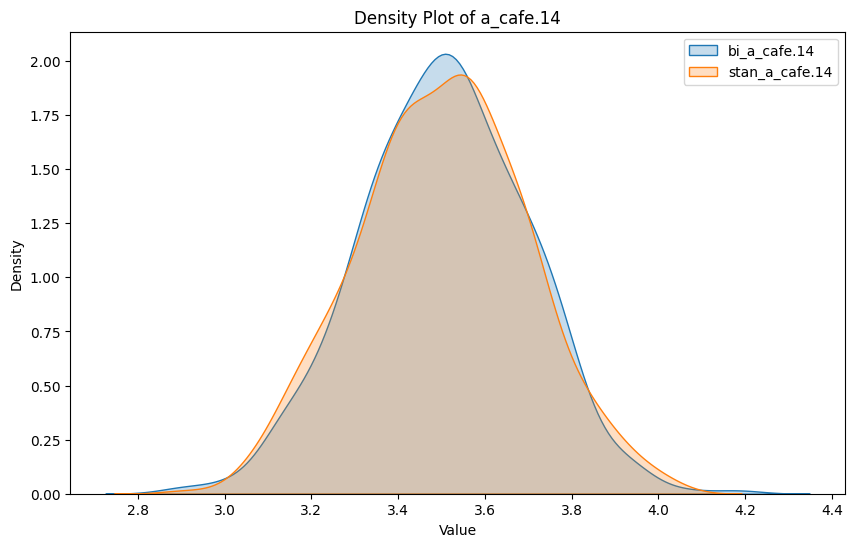

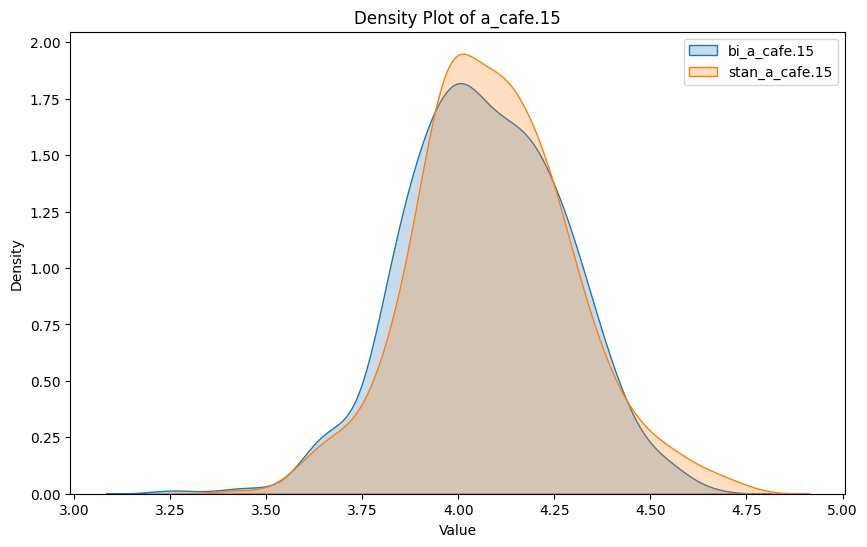

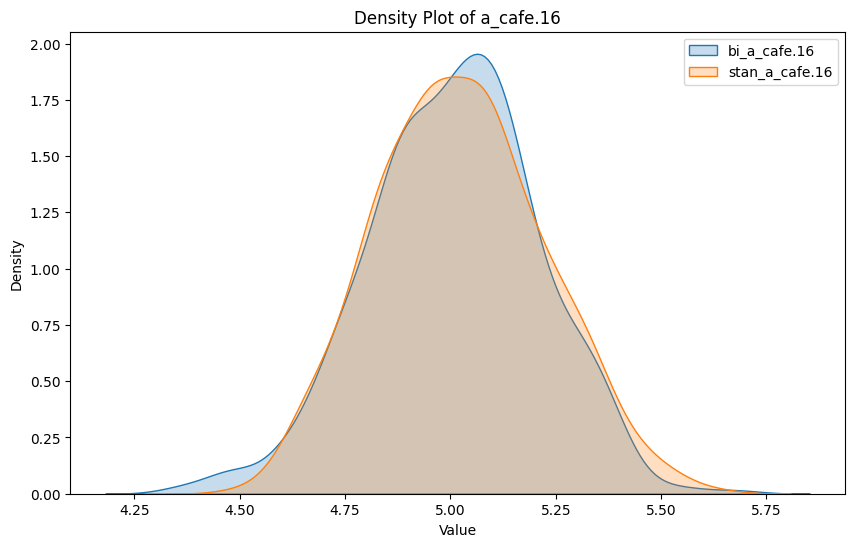

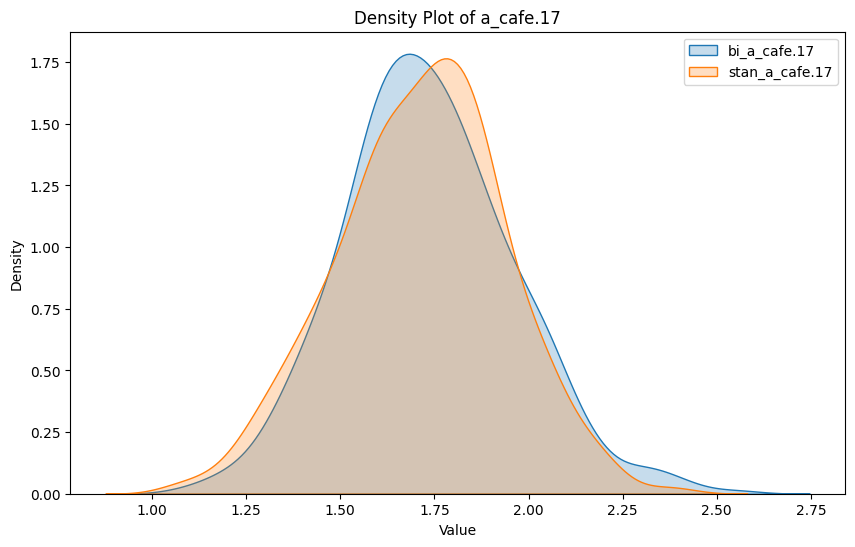

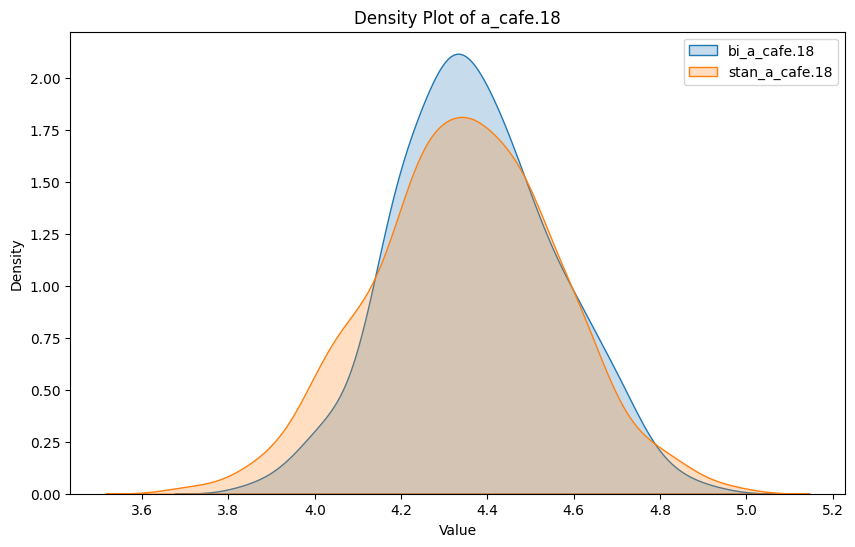

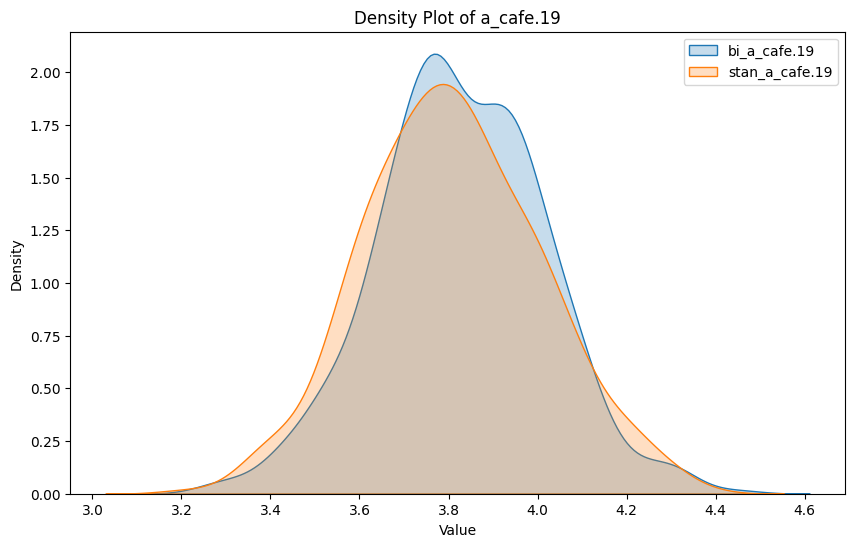

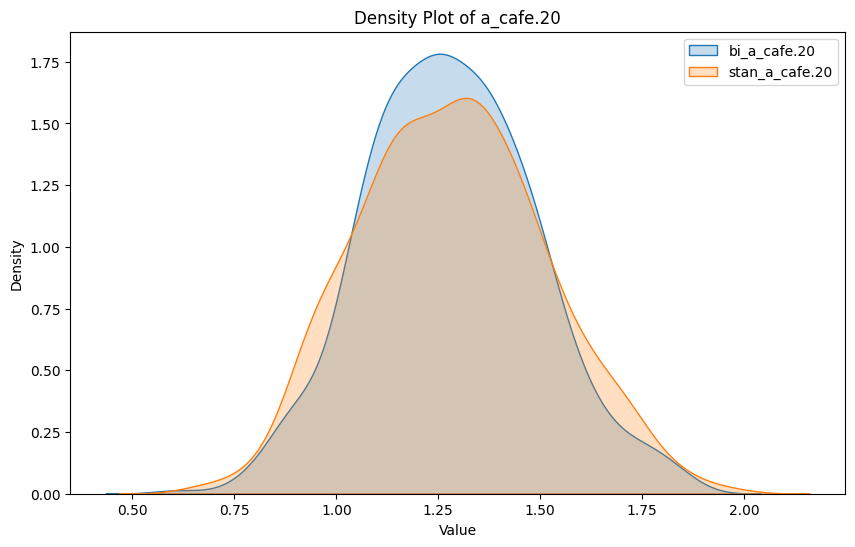

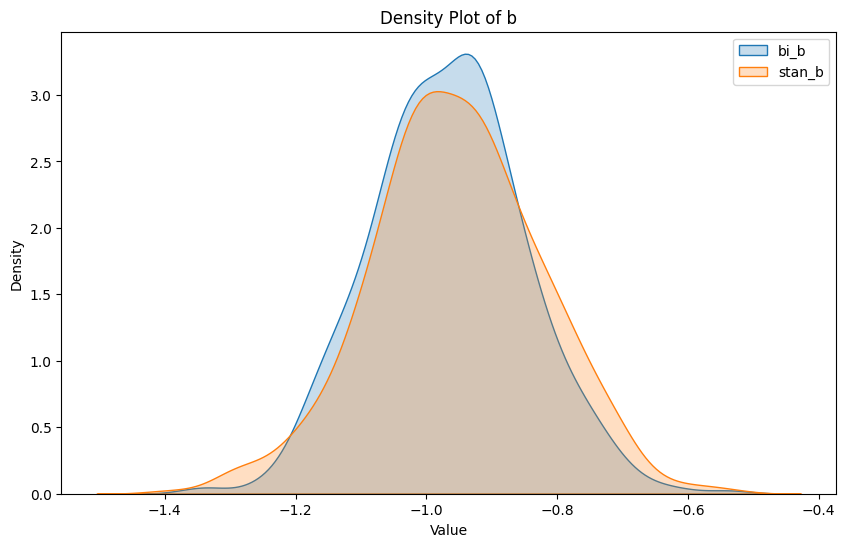

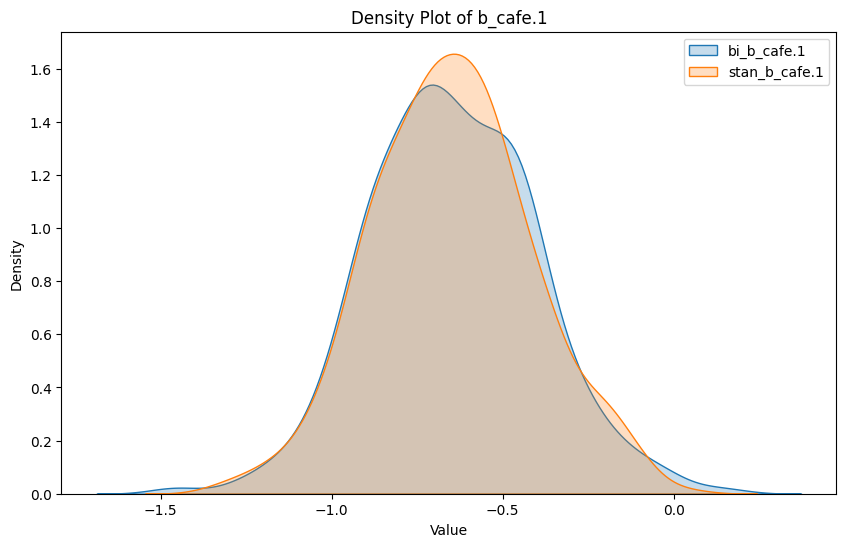

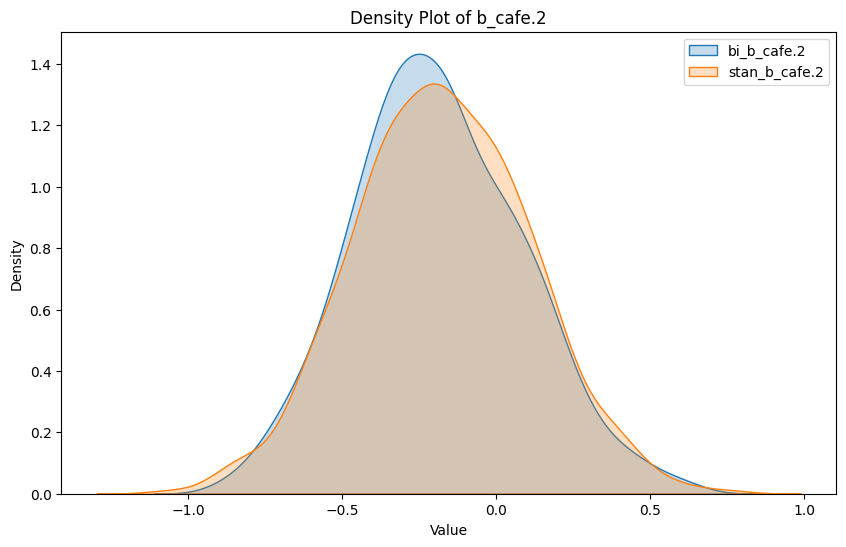

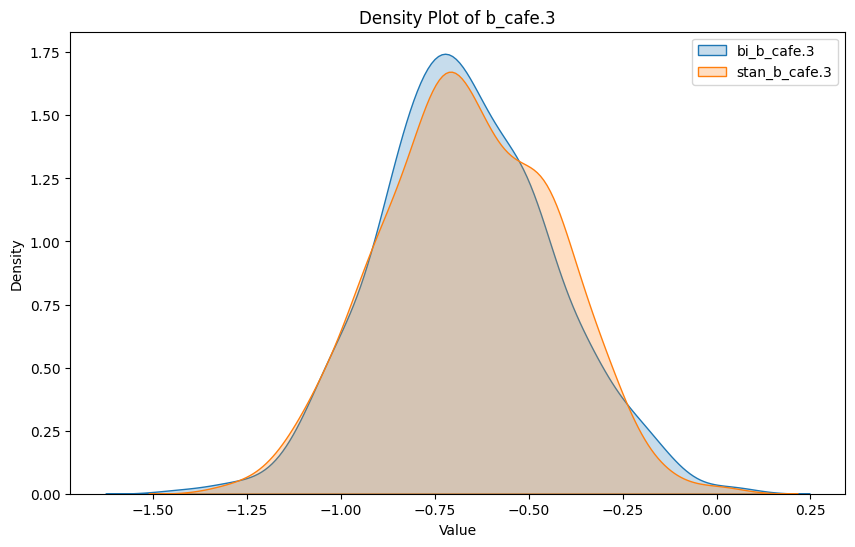

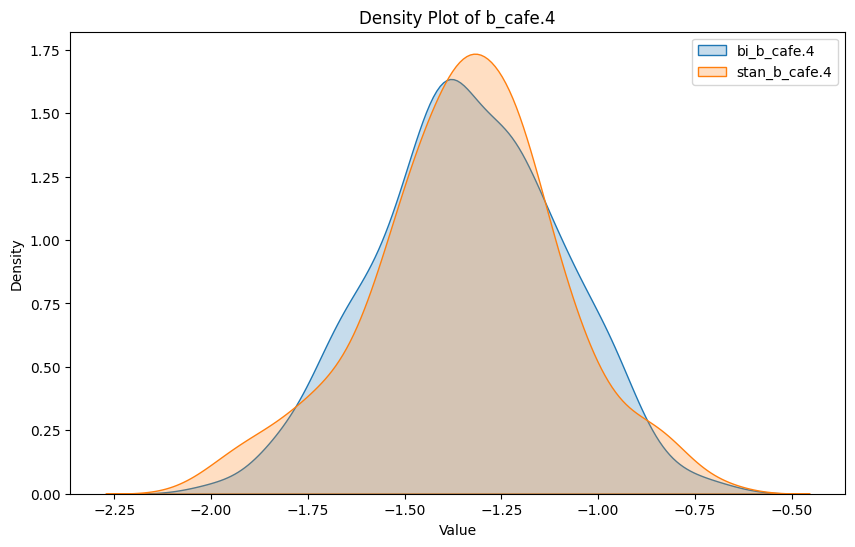

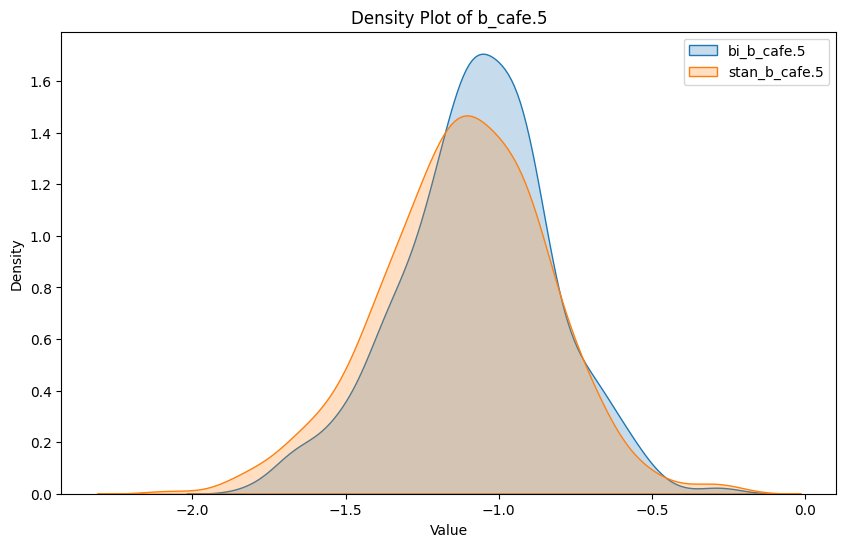

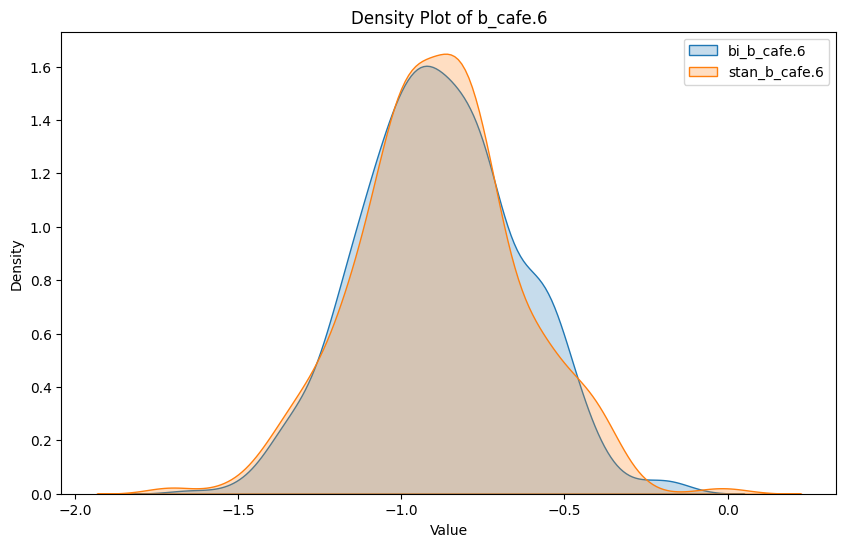

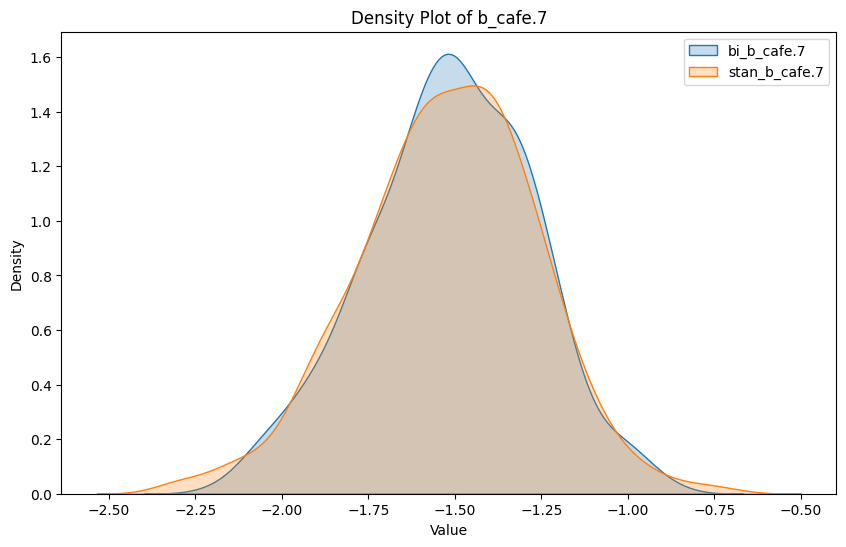

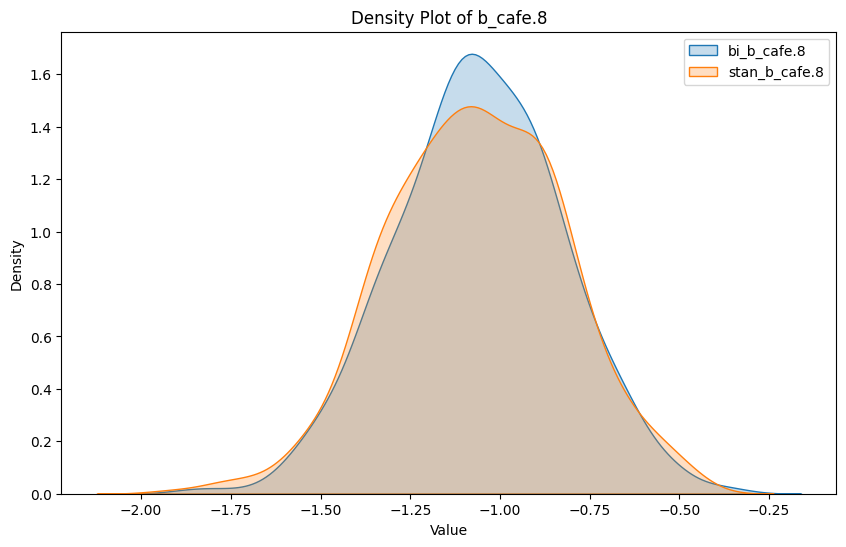

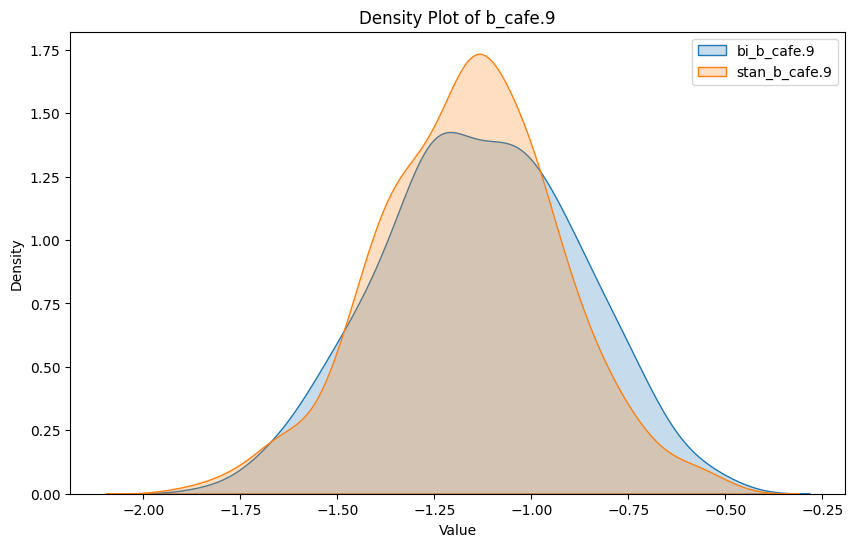

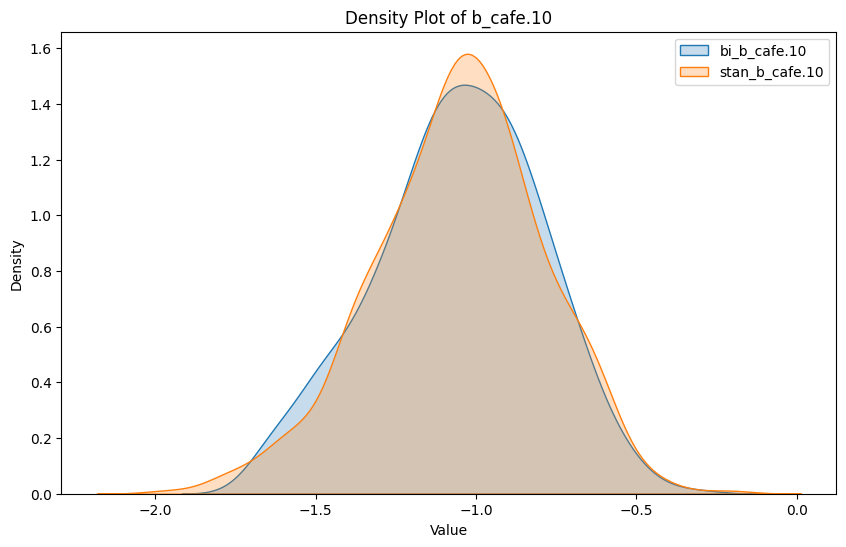

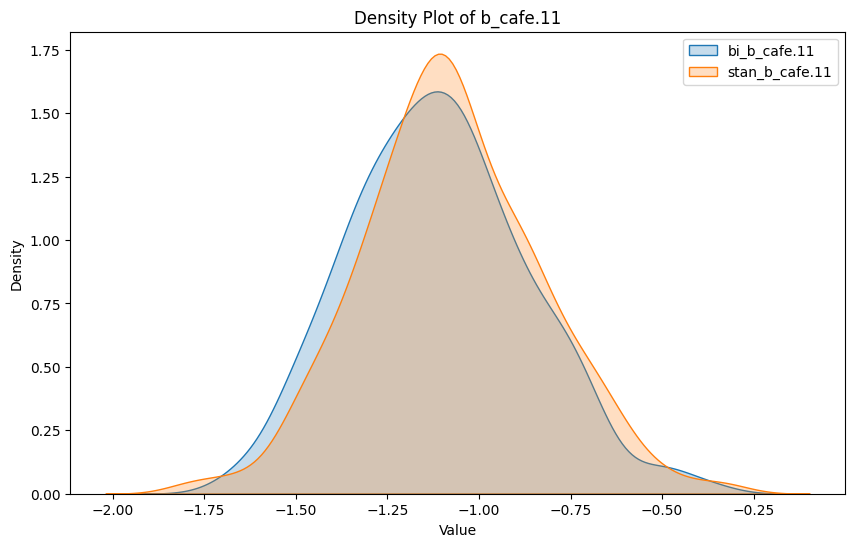

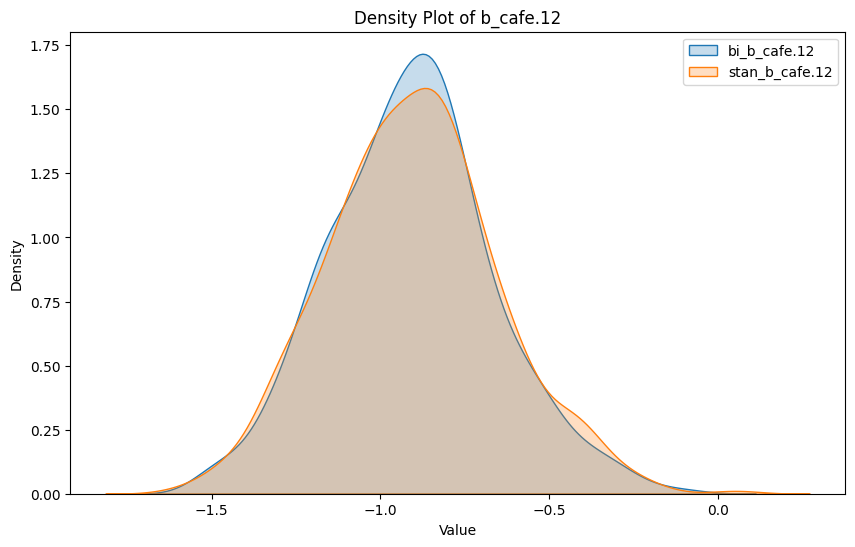

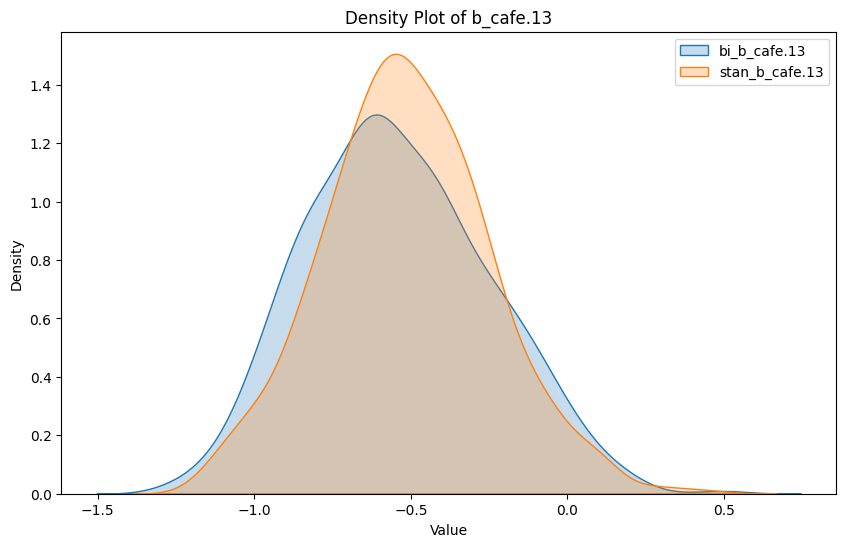

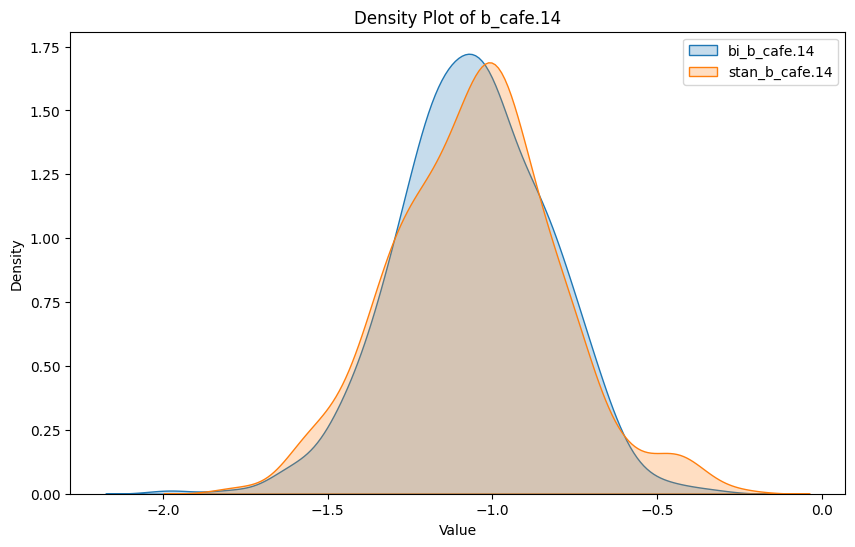

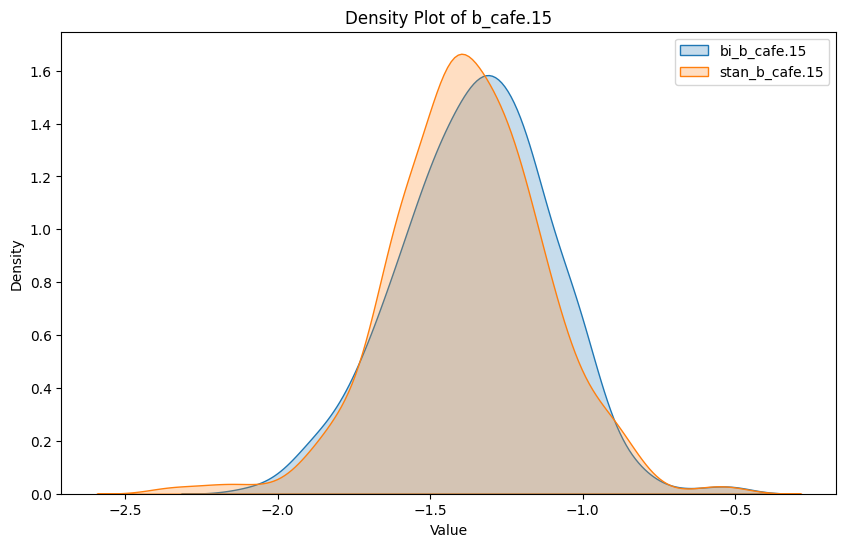

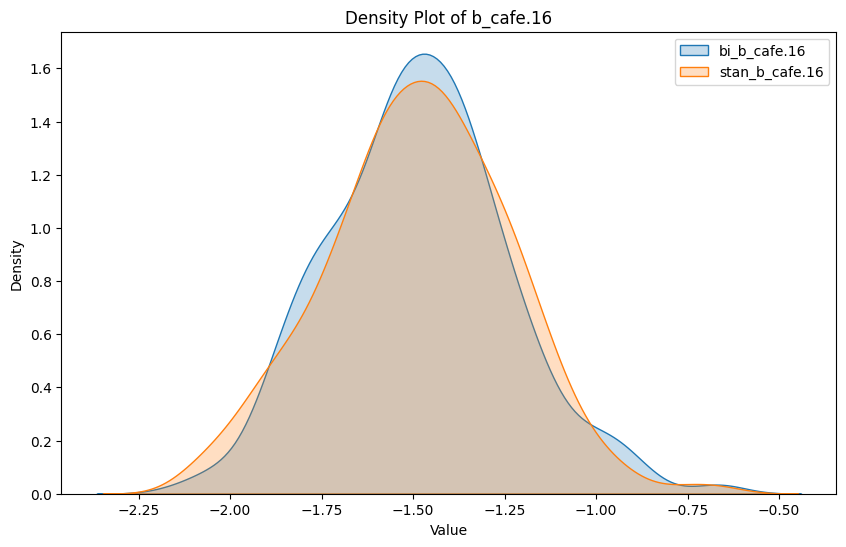

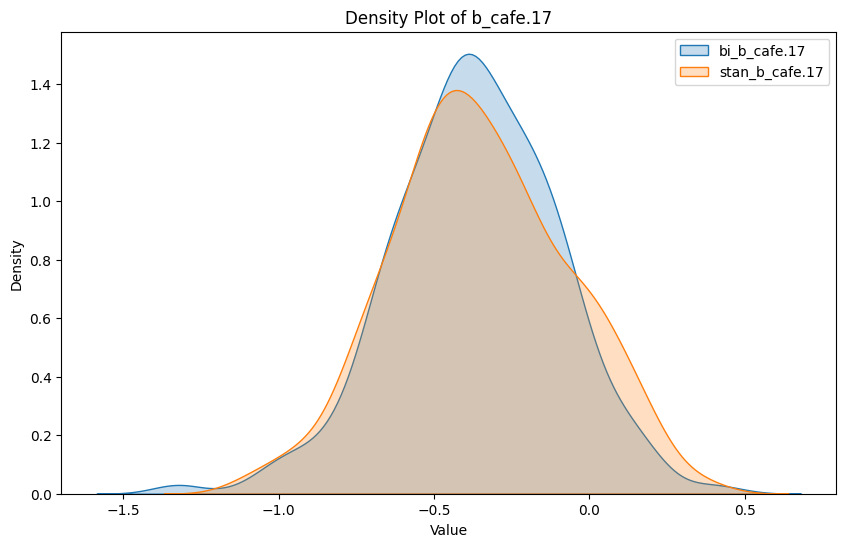

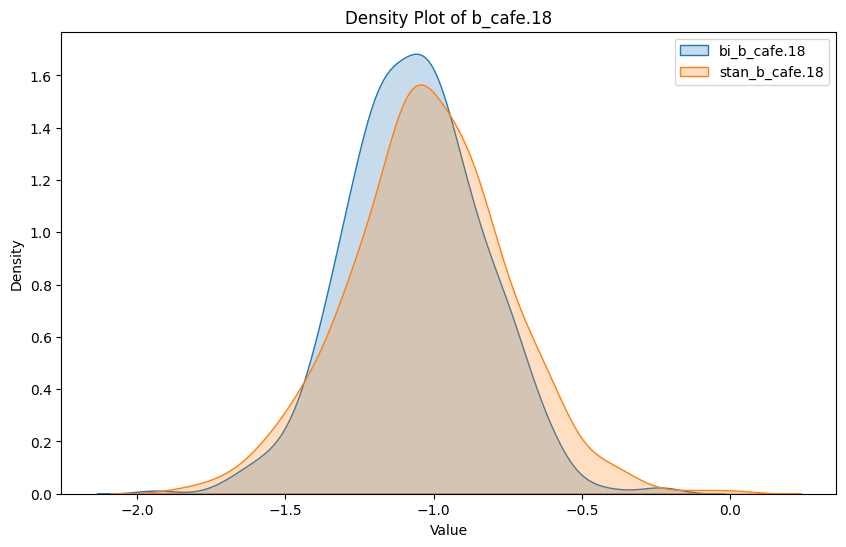

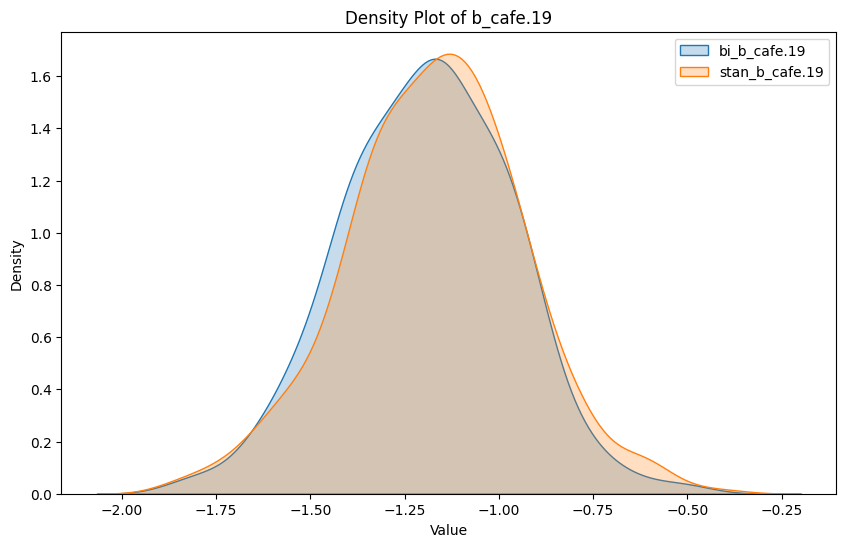

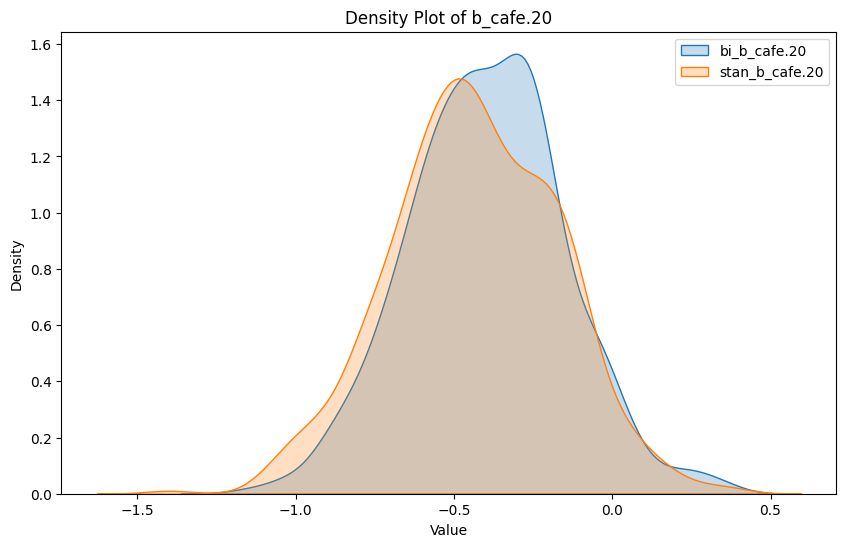

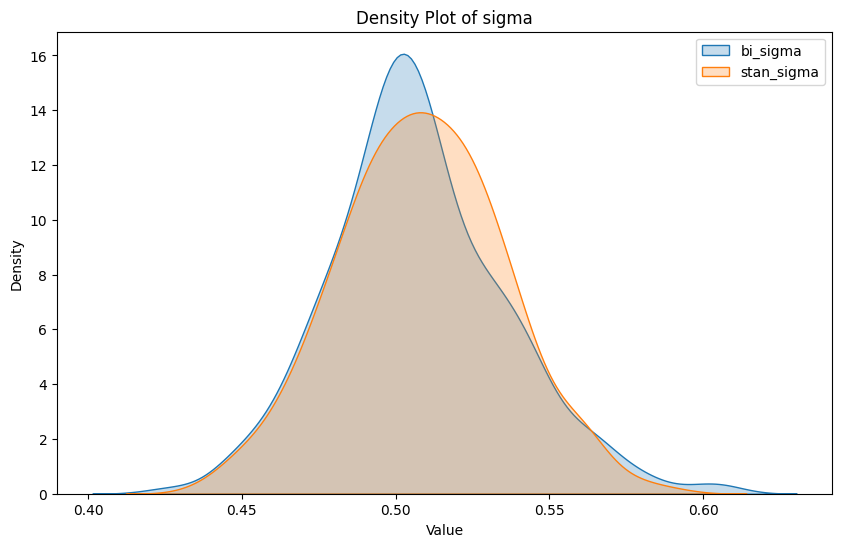

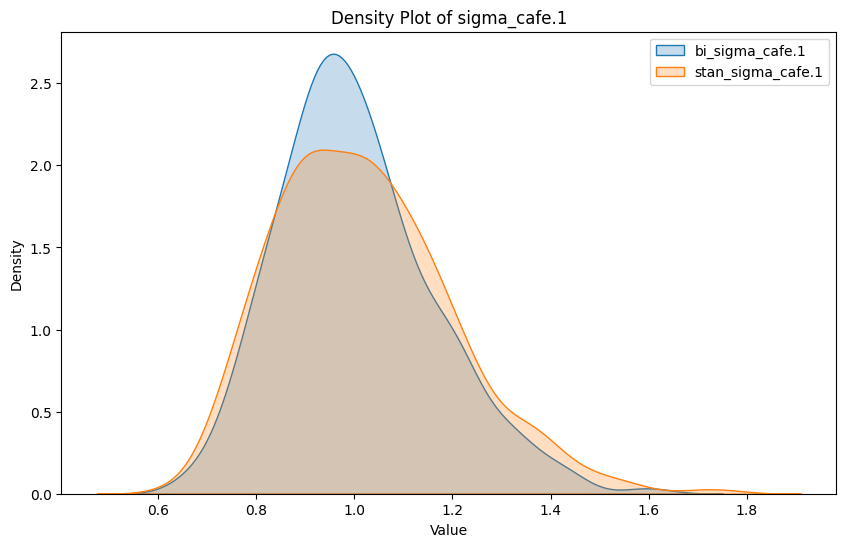

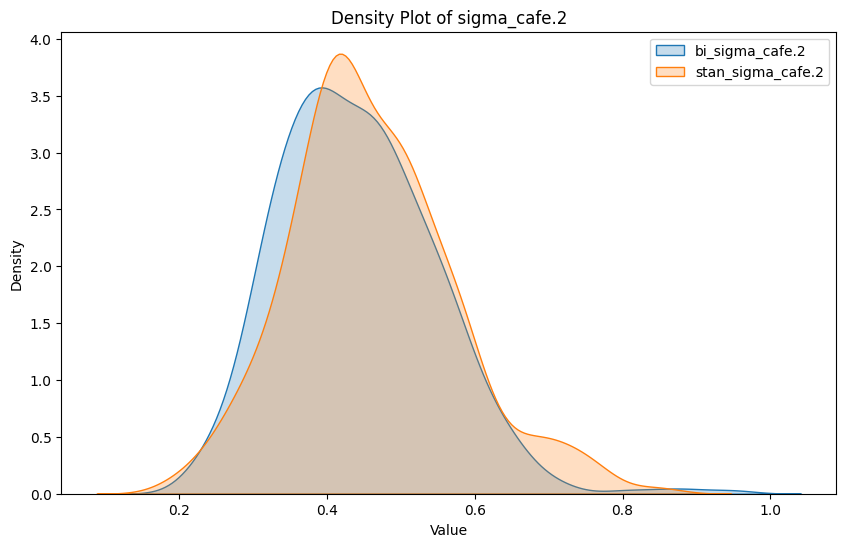

In [ ]:
def slice_array_to_dict(array, name="slice"):

    _, dim2, dim3 = array.shape
    
    # Create the dictionary
    slices_dict = {
        f"{name}_{i}_{j}": array[:, i, j]
        for i in range(dim2)
        for j in range(dim3)
    }
    
    return slices_dict
def slice_array_to_dict_2(array, name="slice"):

    _, dim2  = array.shape
    
    # Create the dictionary
    slices_dict = {
        f"{name}_{i}": array[:, i]
        for i in range(dim2)
    }
    
    return slices_dict

# Change posteriors dictionary so that parameters  are in the same order as the data of stan
r = slice_array_to_dict(m.posteriors['Rho'], name="Rho")
a = dict(a=m.posteriors['a'])
b = dict(b=m.posteriors['b'])
sigma = dict(sigma=m.posteriors['sigma'])
a_cafe = slice_array_to_dict_2(m.posteriors['a_b_cafe'][:,:,0], name="a_cafe")
b_cafe = slice_array_to_dict_2(m.posteriors['a_b_cafe'][:,:,1], name="b_cafe")
sigma_cafe_1 = dict(sigma_cafe_1=m.posteriors['sigma_cafe'][:, 0])
sigma_cafe_2 = dict(sigma_cafe_2=m.posteriors['sigma_cafe'][:, 1])
r.update(a)
r.update(a_cafe)
r.update(b)
r.update(b_cafe)
r.update(sigma)
r.update(sigma_cafe_1)
r.update(sigma_cafe_2)
m.posteriors=r
d = prepare_stan_data(df)
df_bi = prepare_bi_data(m)

# Plot the density of the parameters
df_bi.columns =d.columns
for col in df_bi.columns:
    if col in d.columns:  # Ensure the column exists in both DataFrames
        plt.figure(figsize=(10, 6))  # Create a new figure for each plot
        sns.kdeplot(df_bi[col], label=f'bi_{col}', fill=True)
        sns.kdeplot(d[col], label=f'stan_{col}', fill=True)

        # Add labels and title
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'Density Plot of {col}')
        plt.legend()

        # Show the plot
        plt.show()

/tmp/ipykernel_1186/1363713971.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_bi[col], label=f'bi_{col}', fill=True)
/tmp/ipykernel_1186/1363713971.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(d[col], label=f'stan_{col}', fill=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


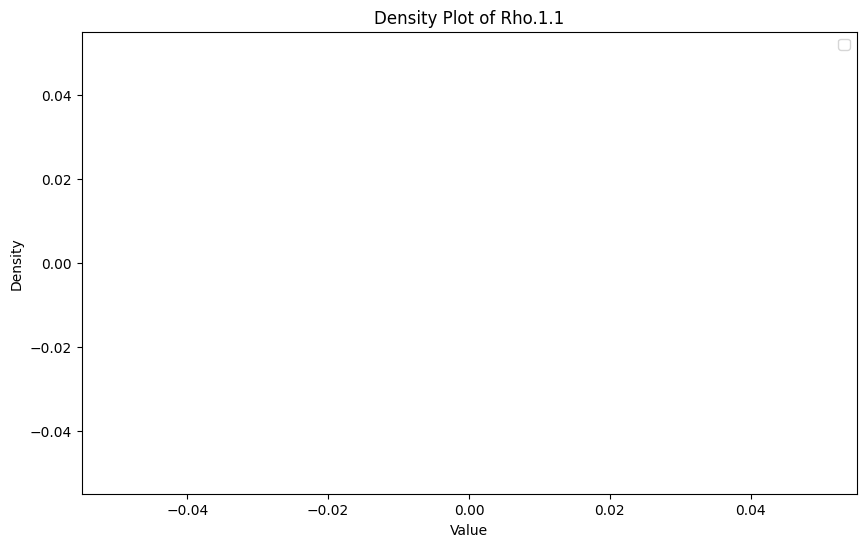

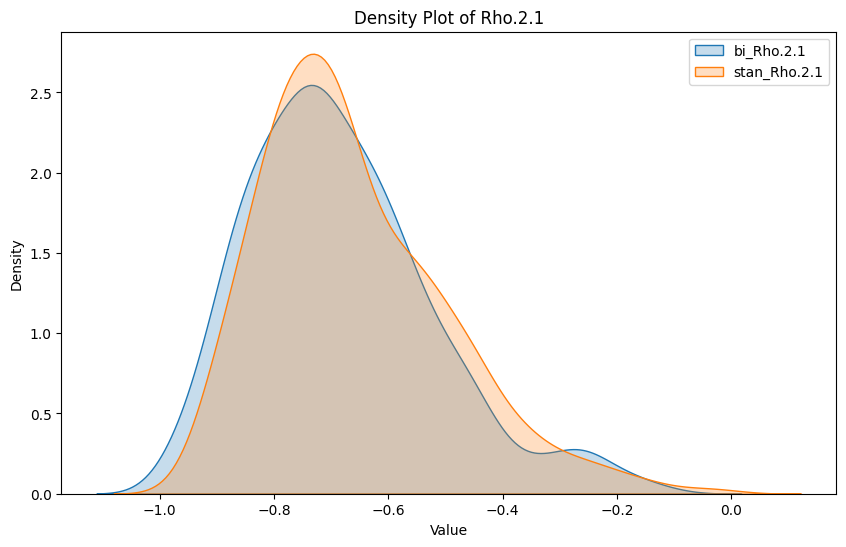

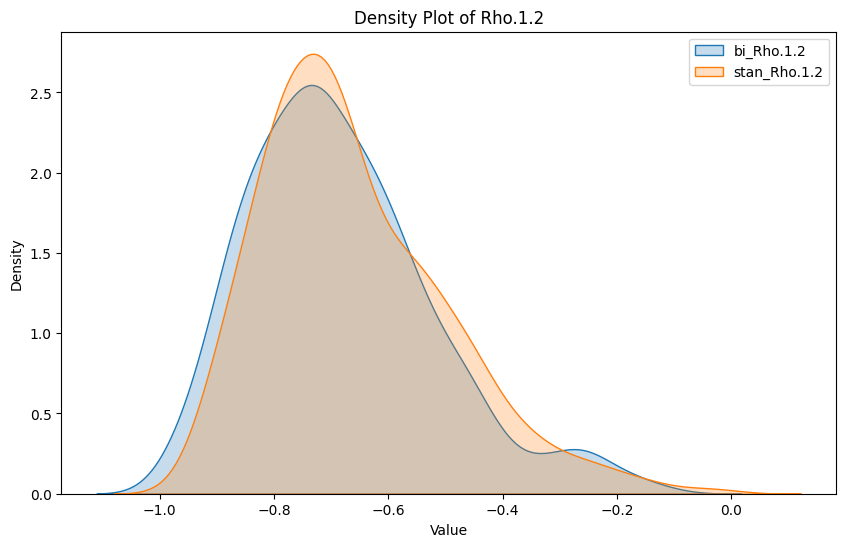

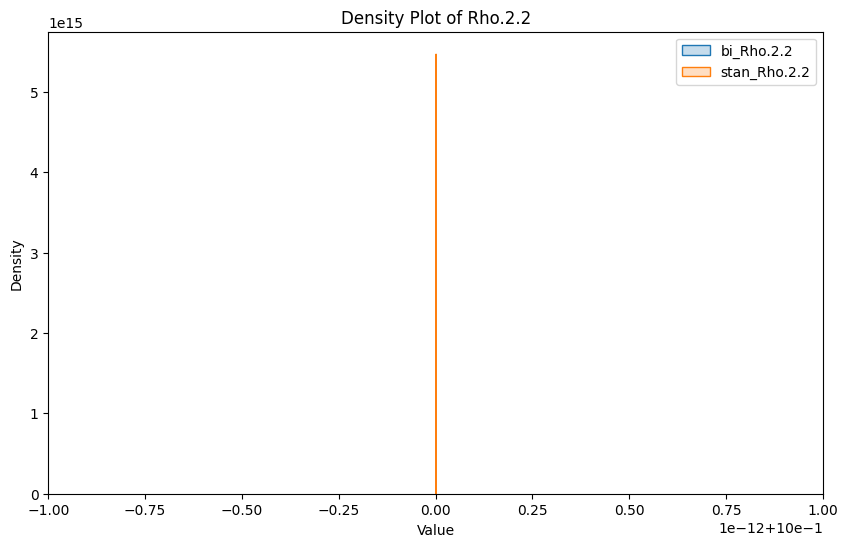

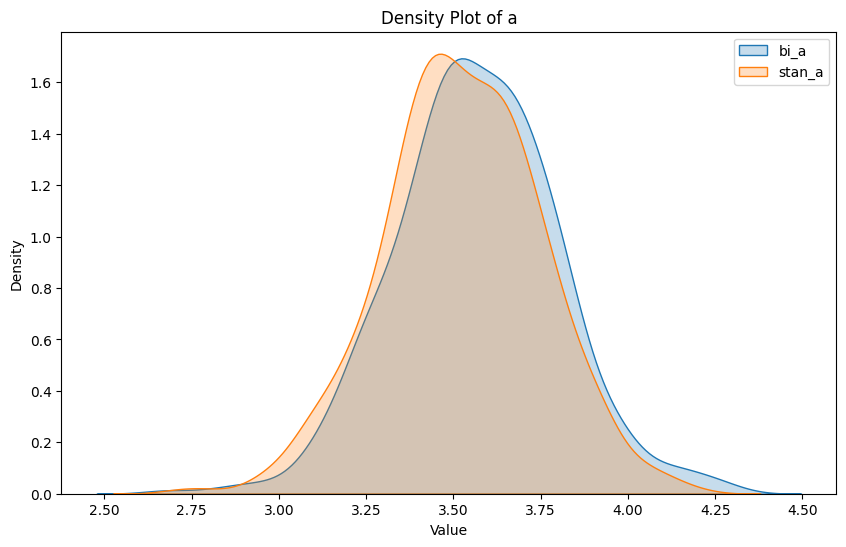

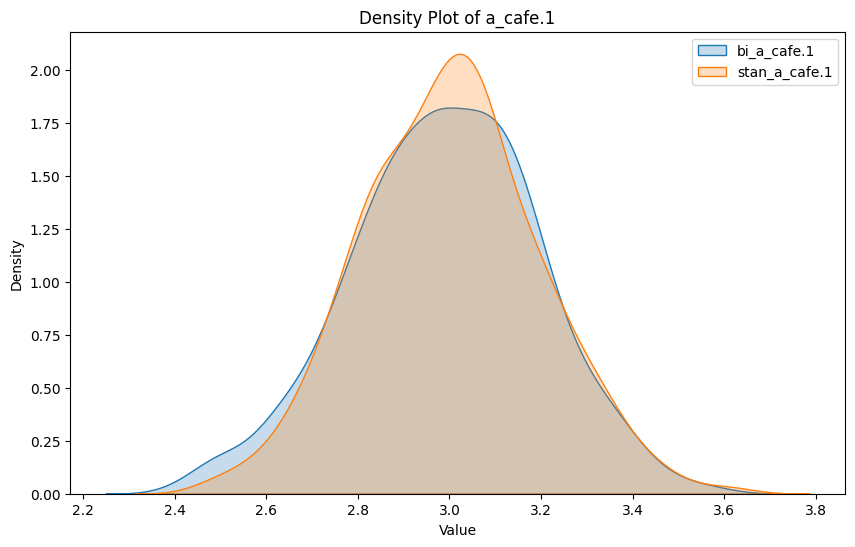

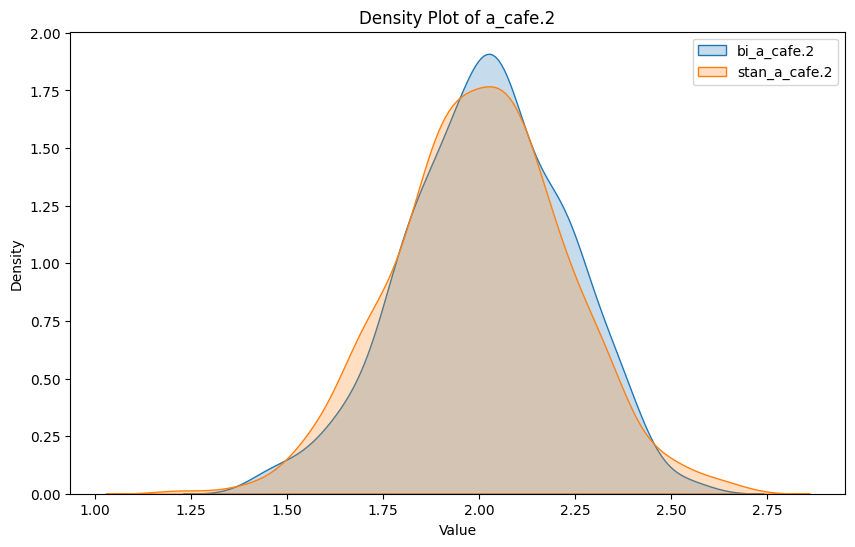

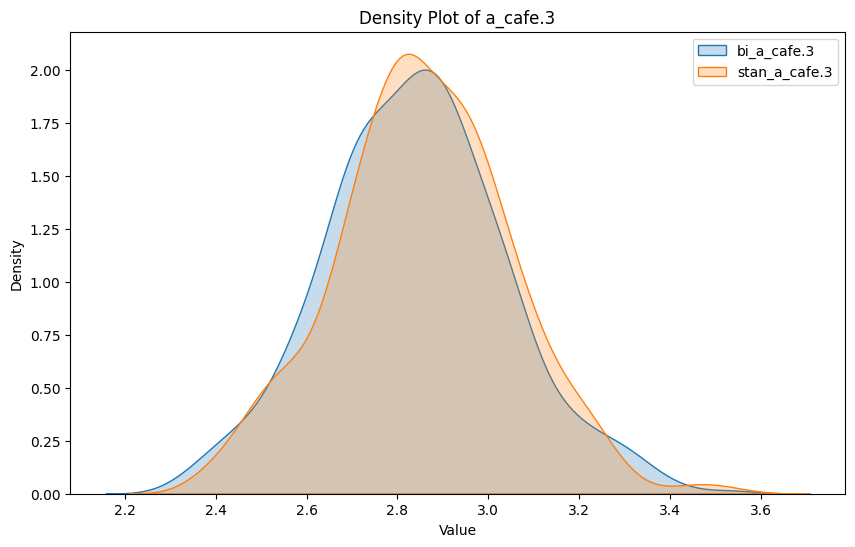

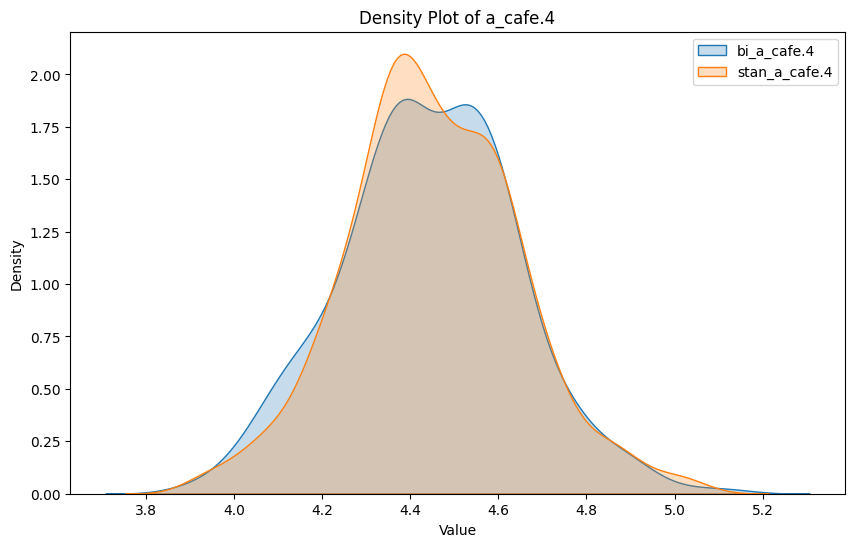

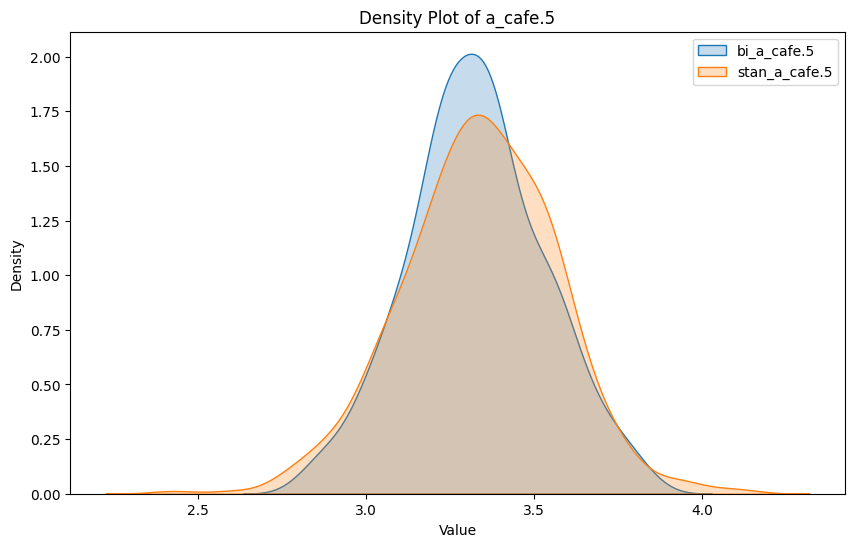

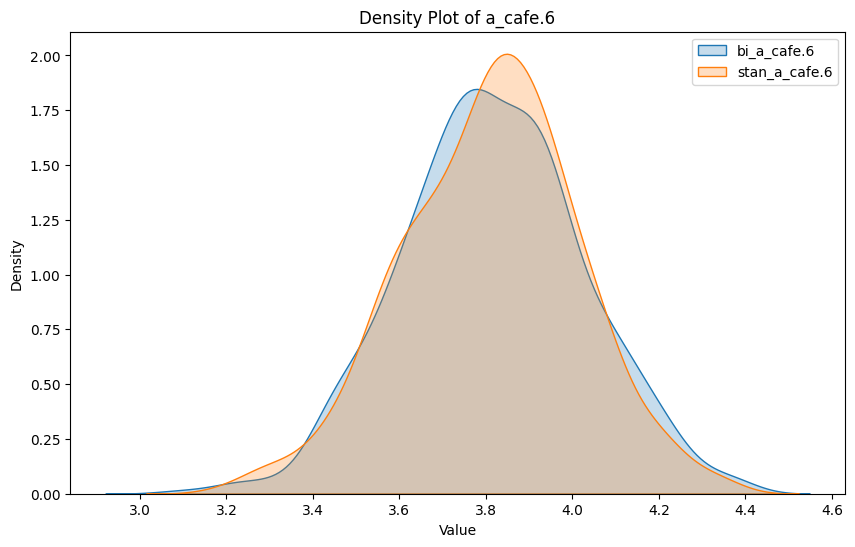

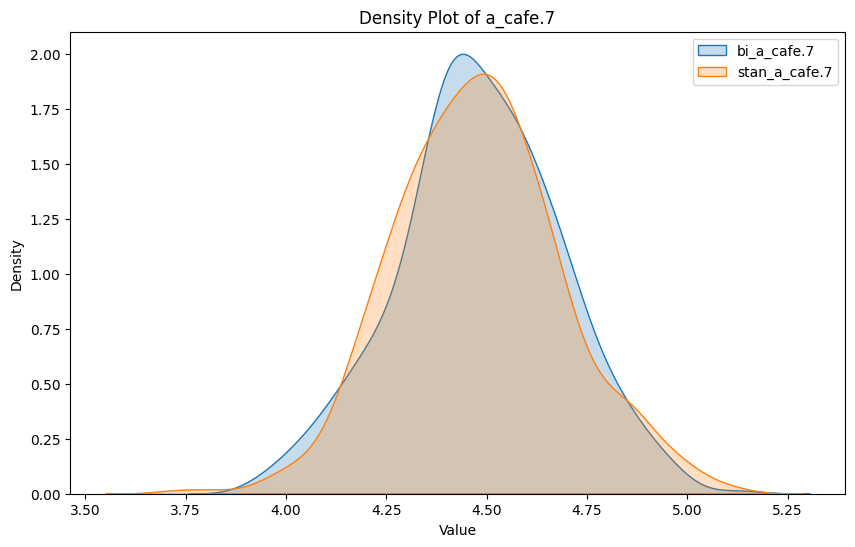

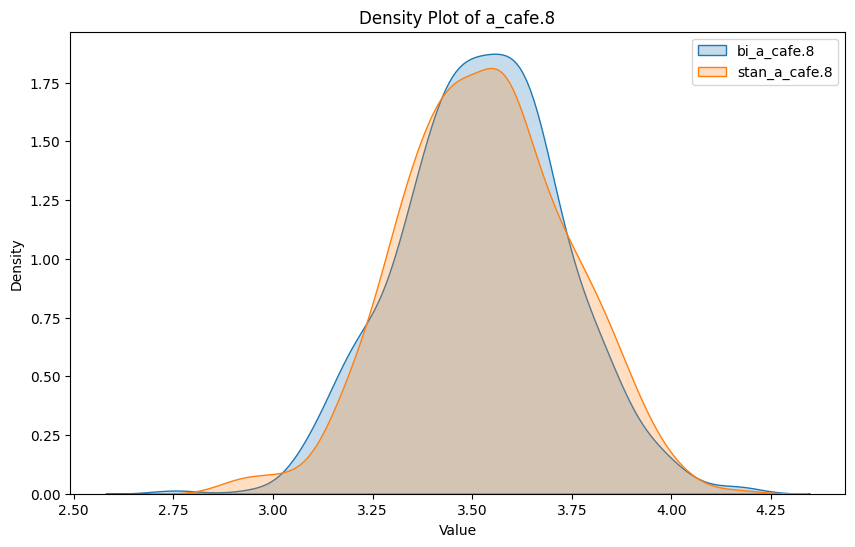

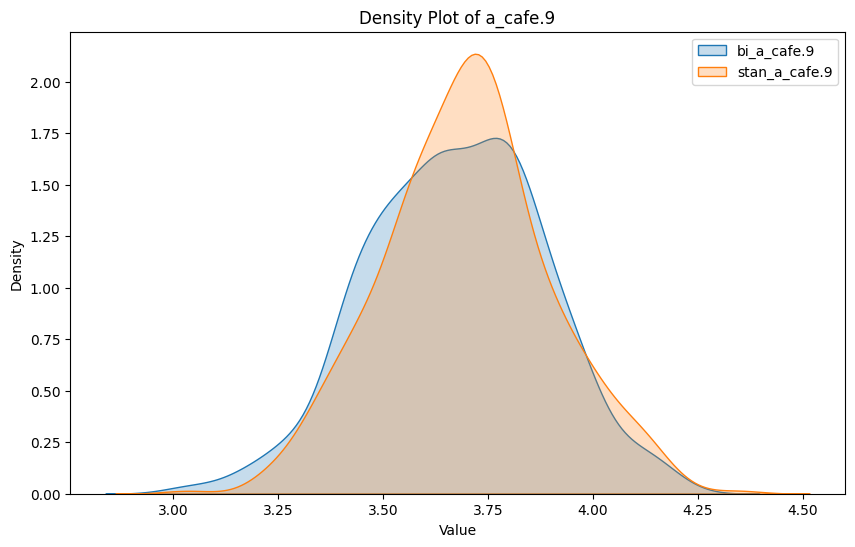

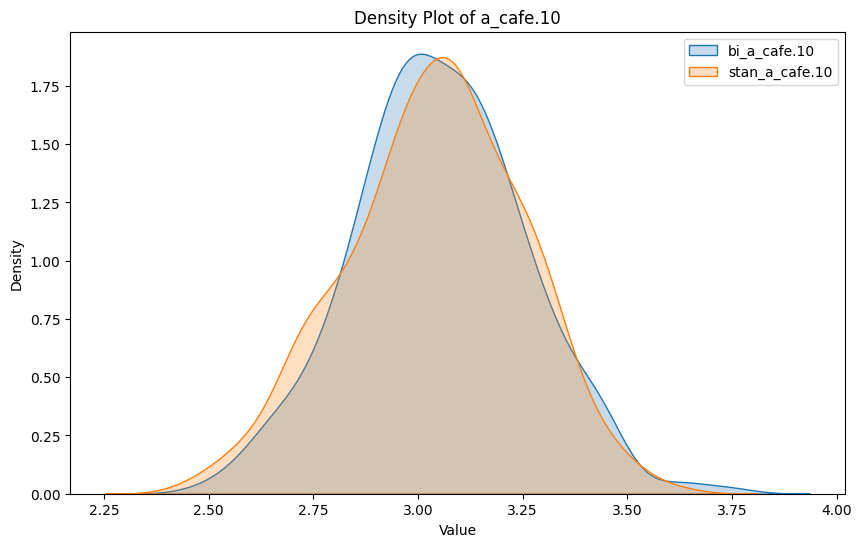

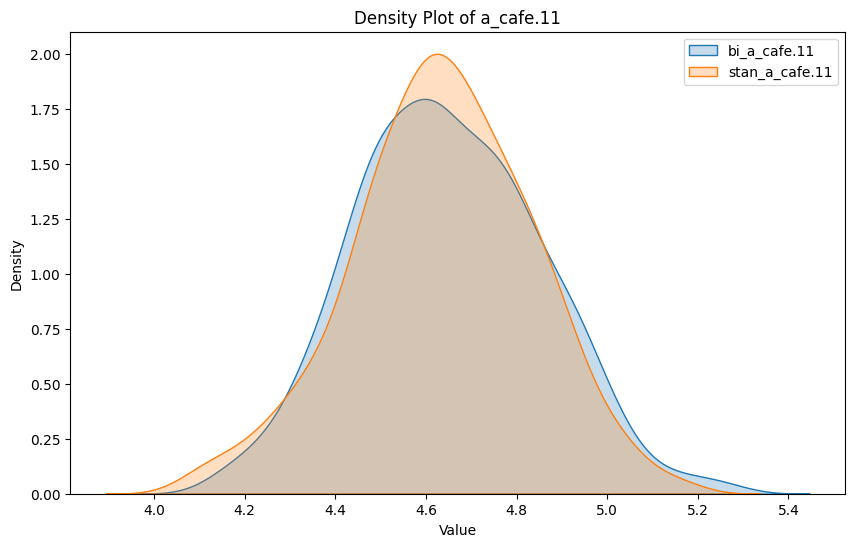

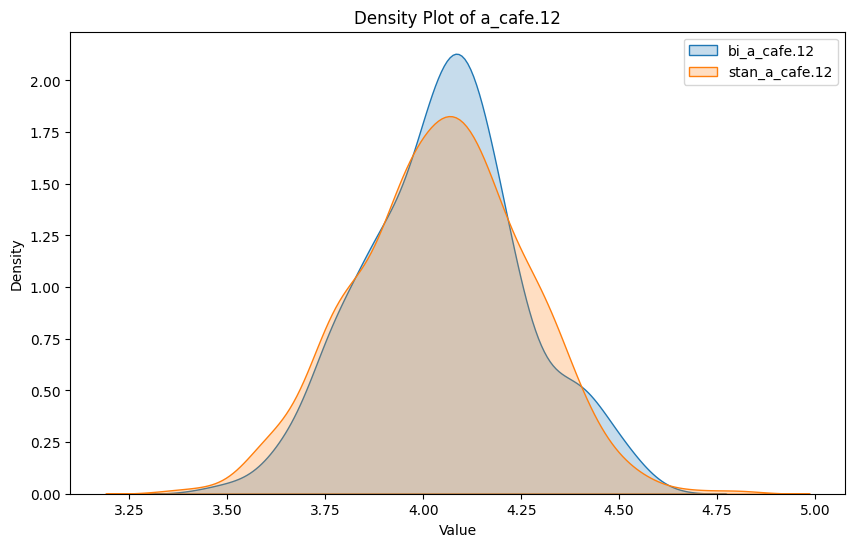

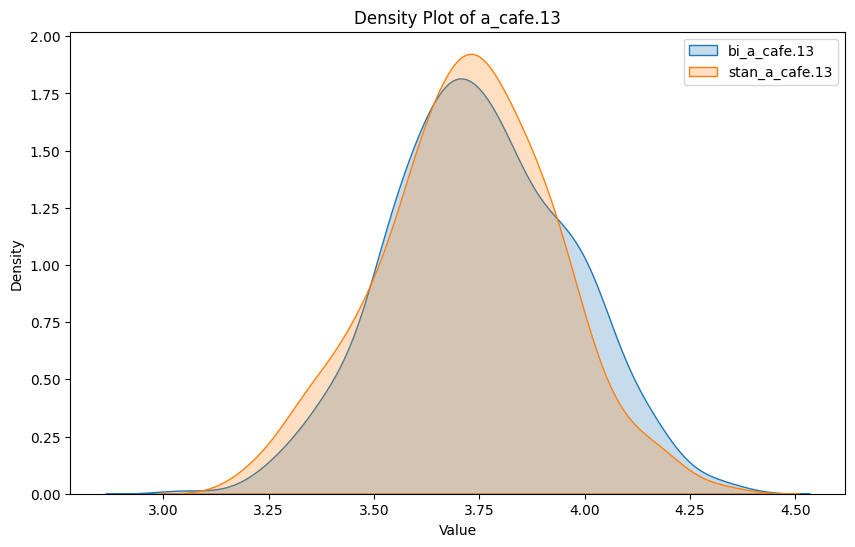

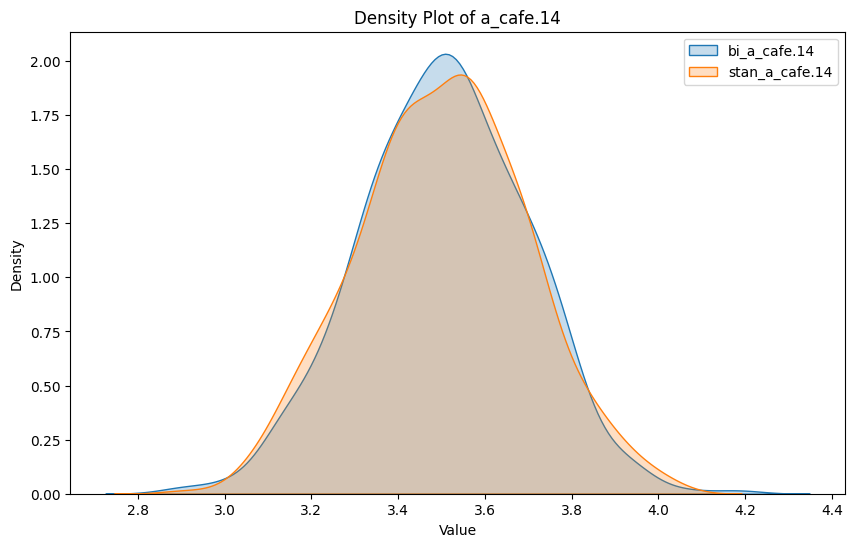

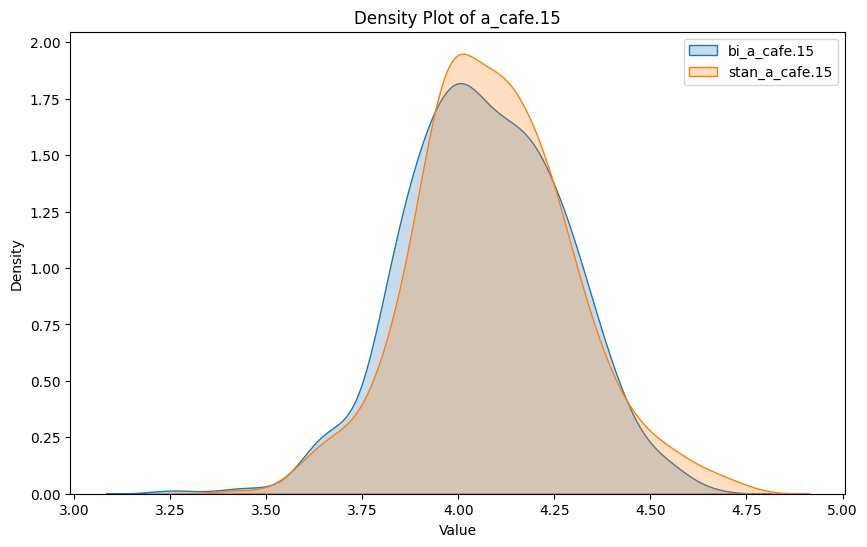

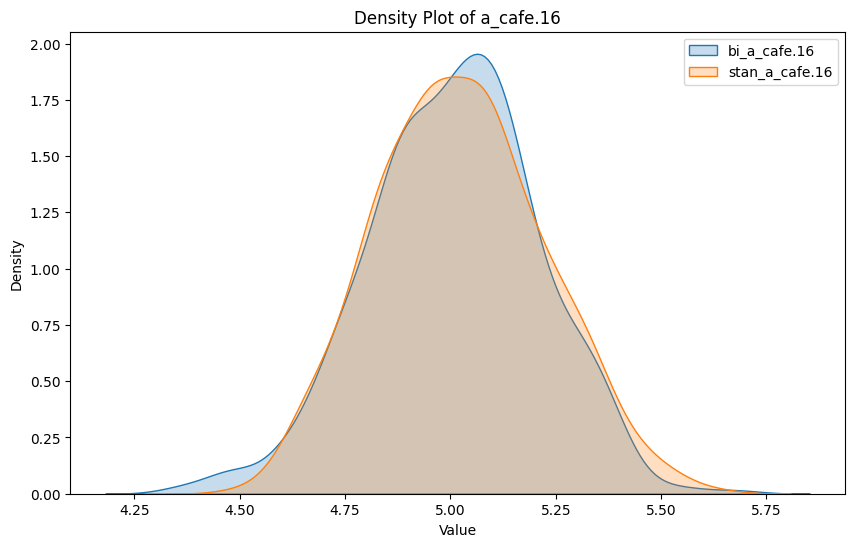

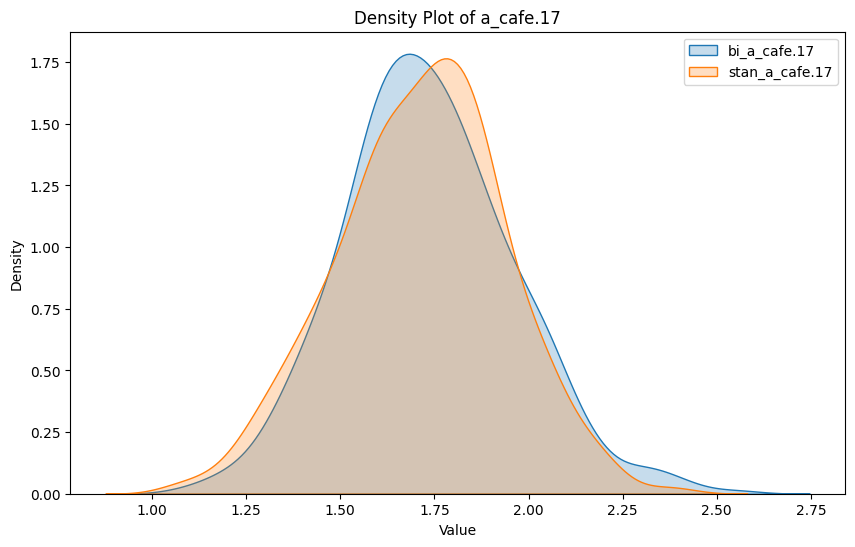

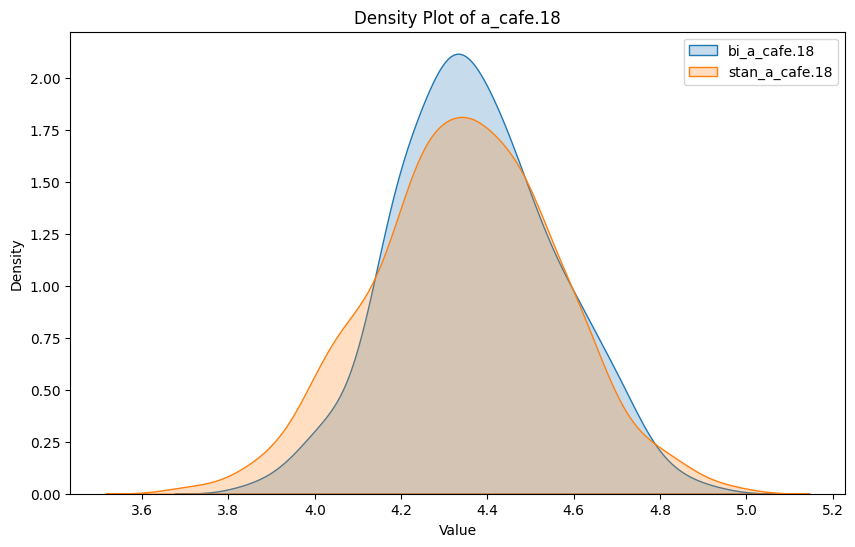

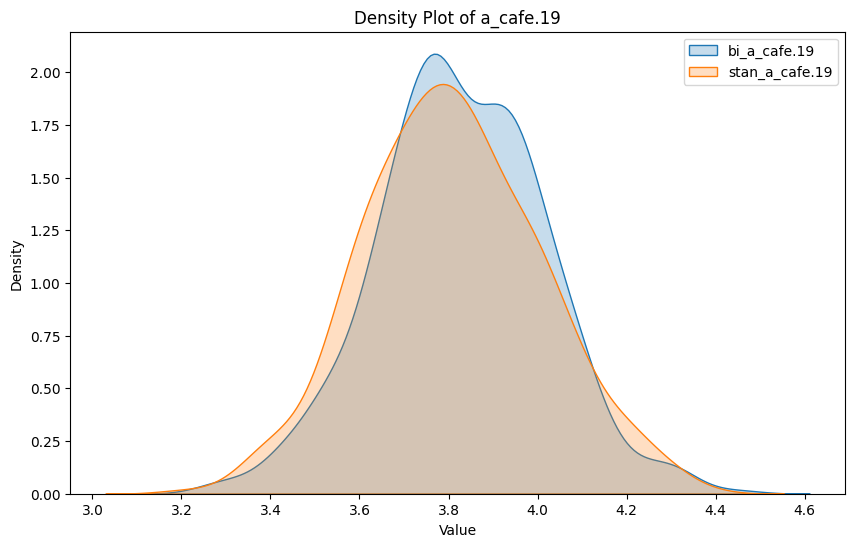

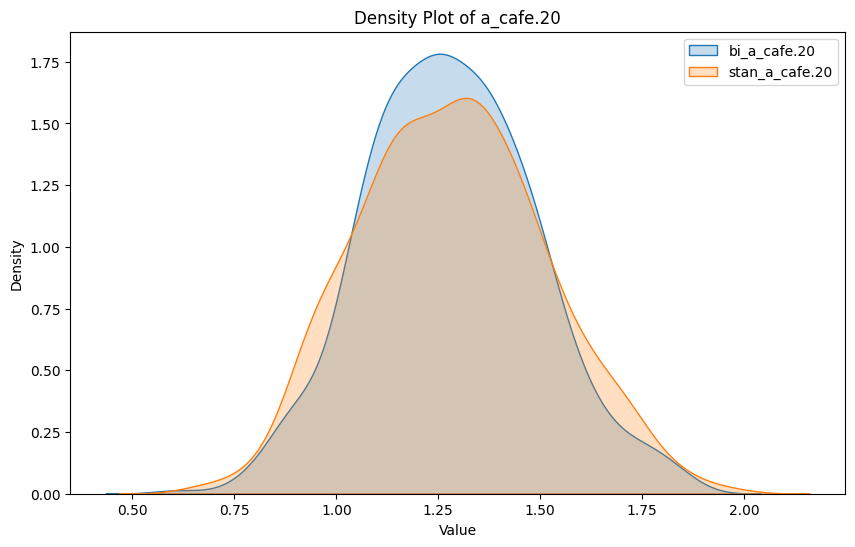

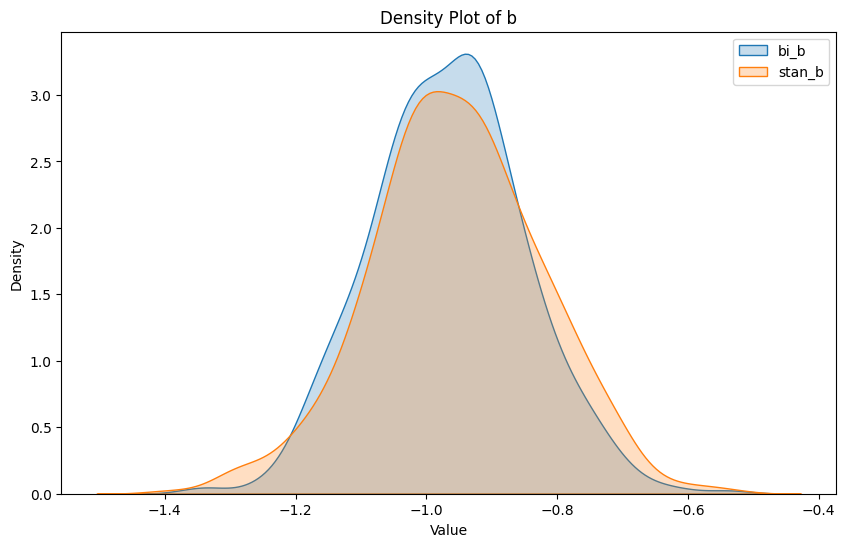

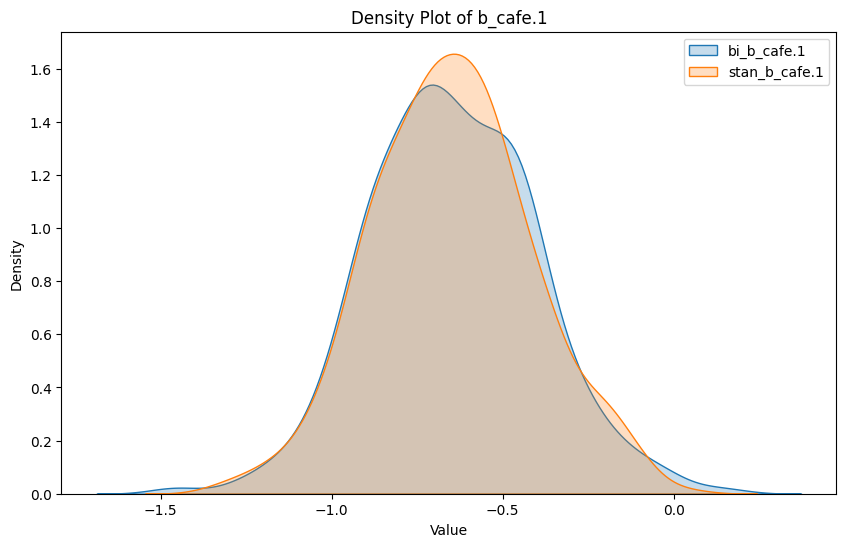

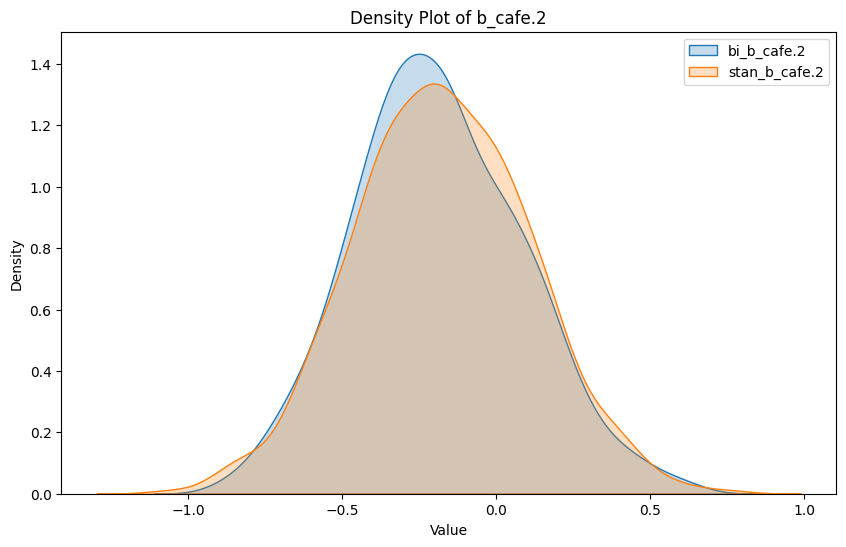

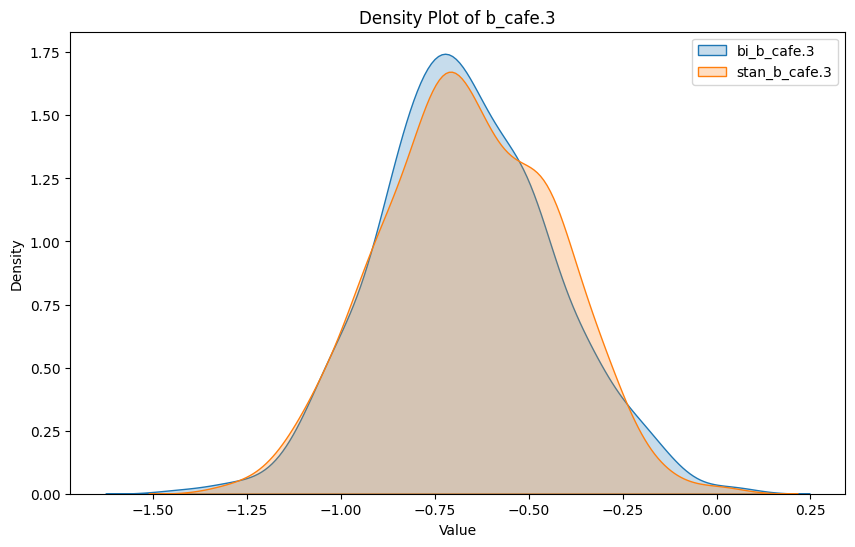

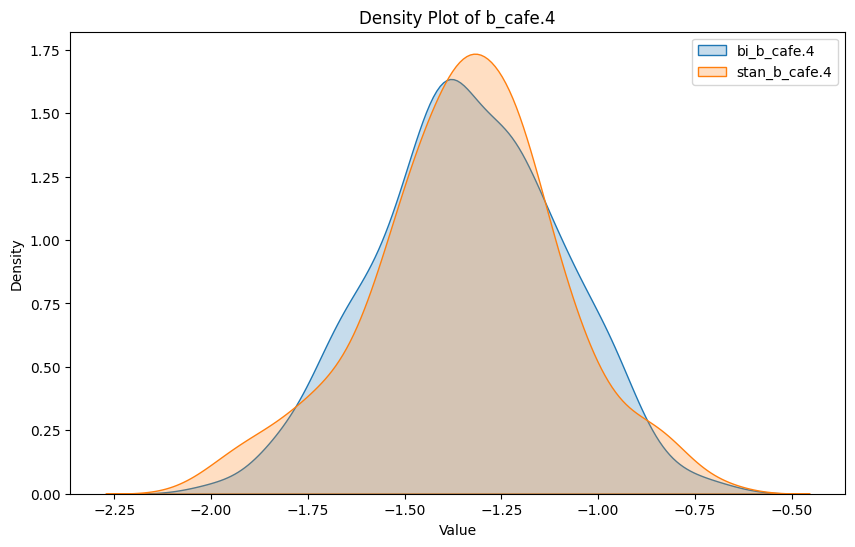

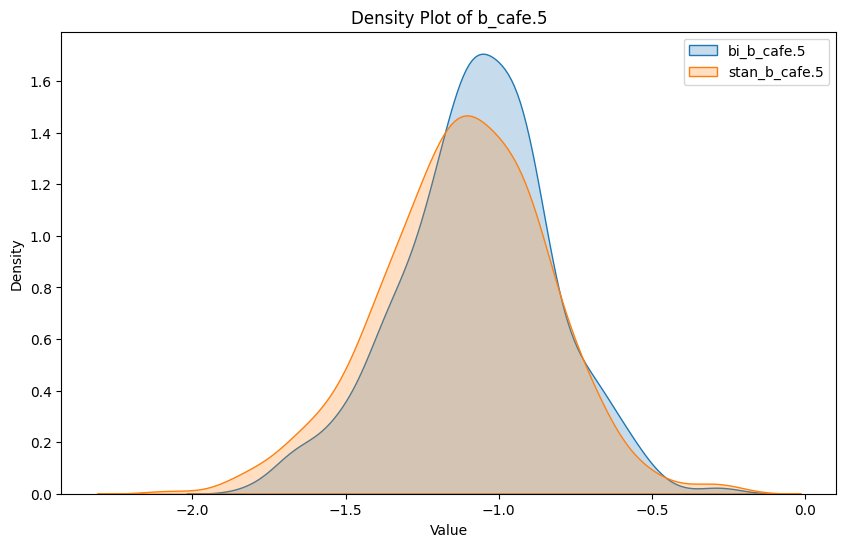

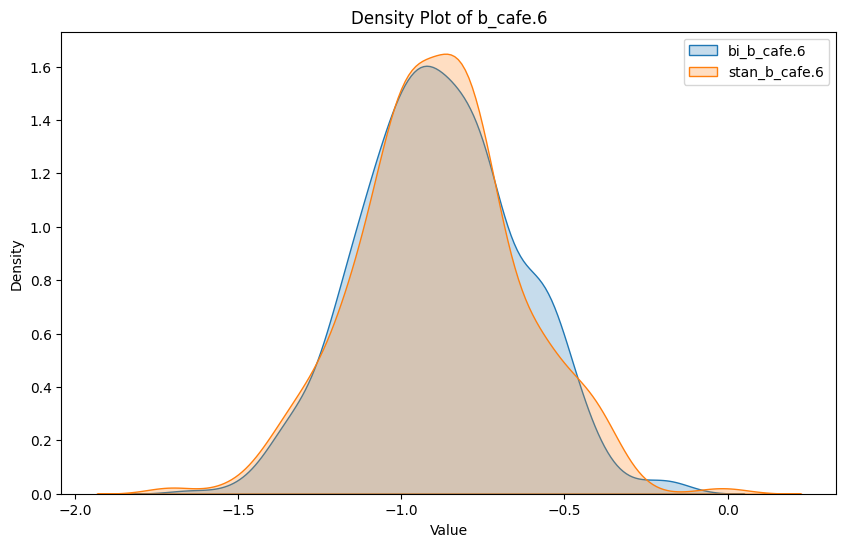

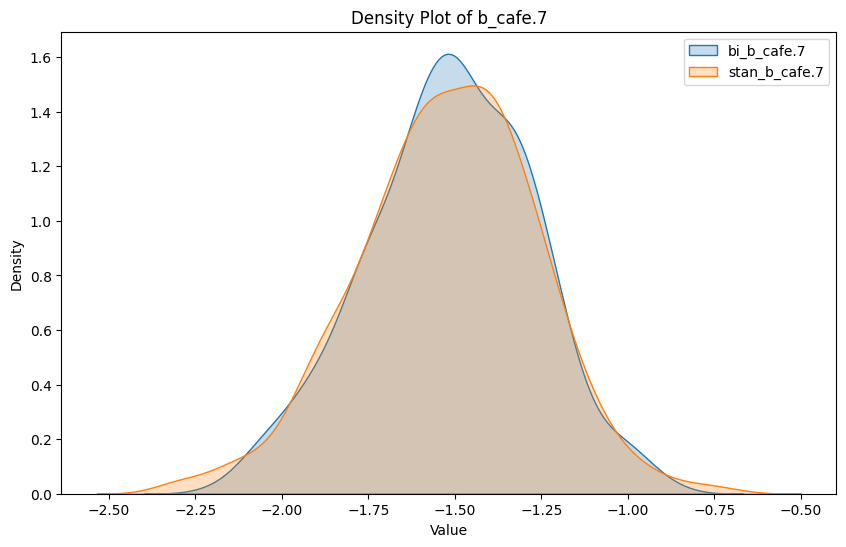

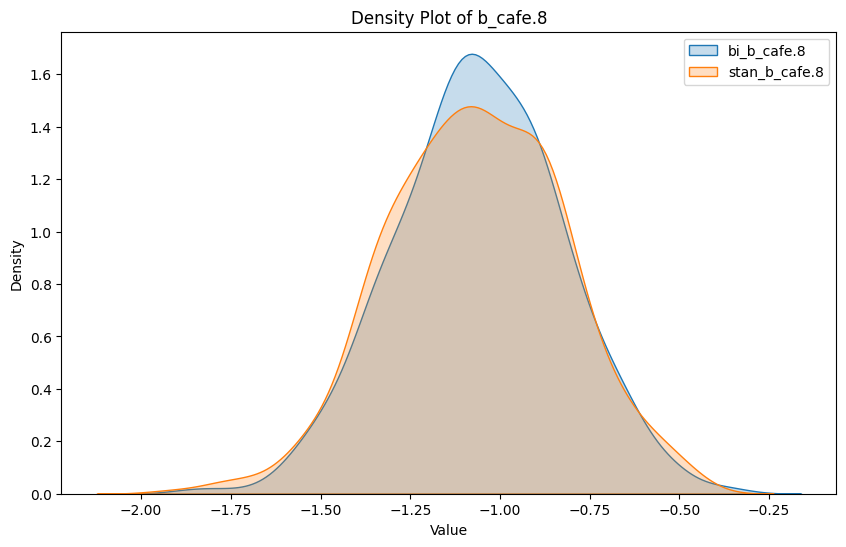

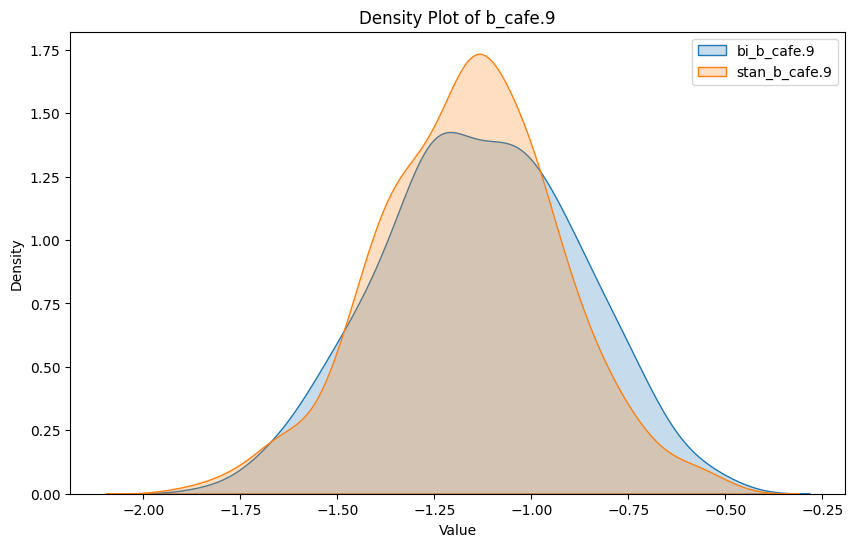

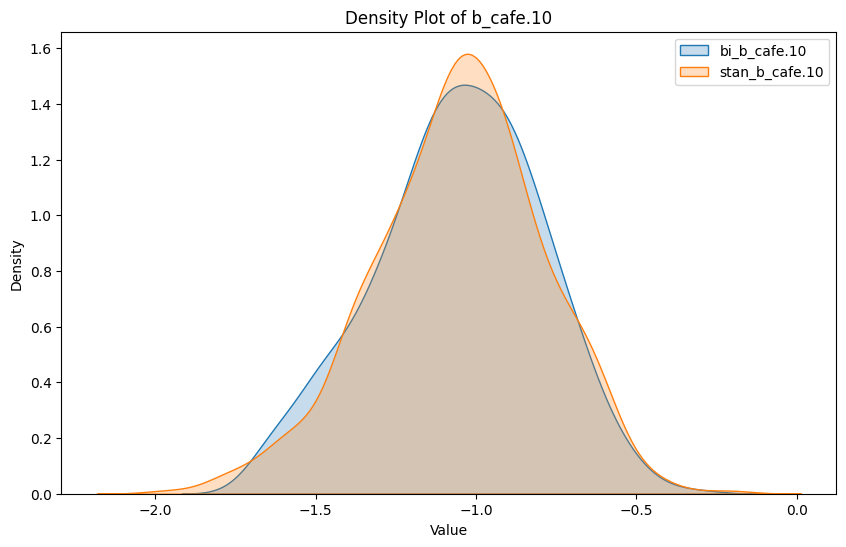

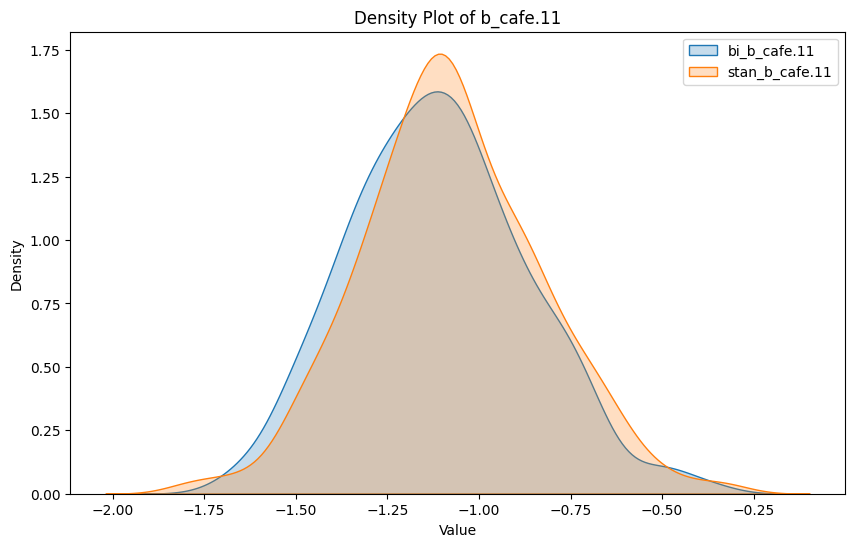

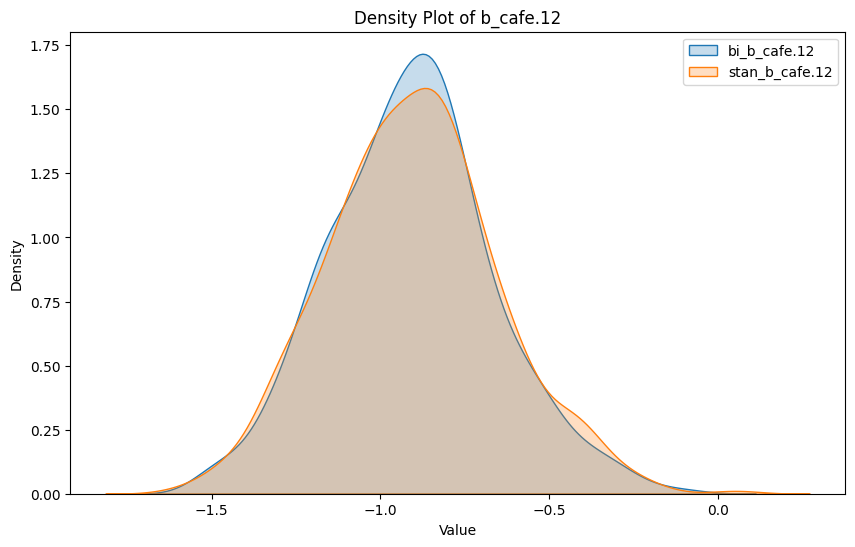

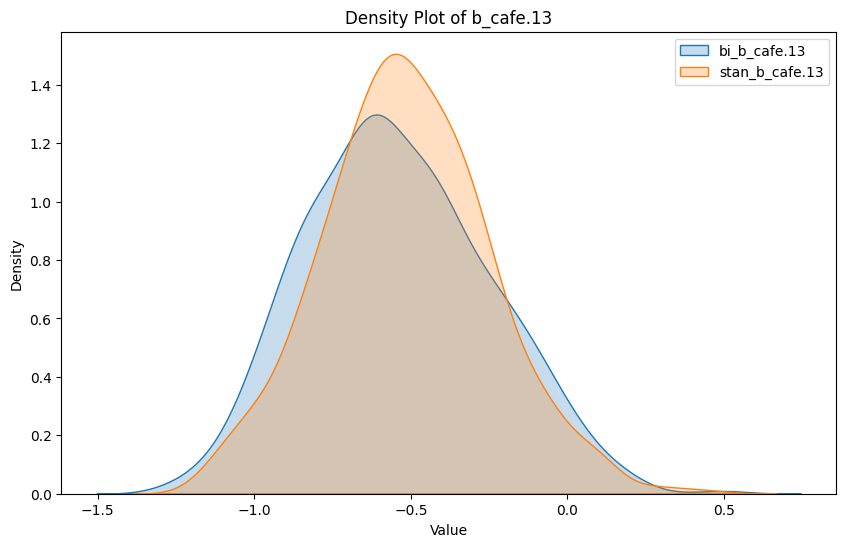

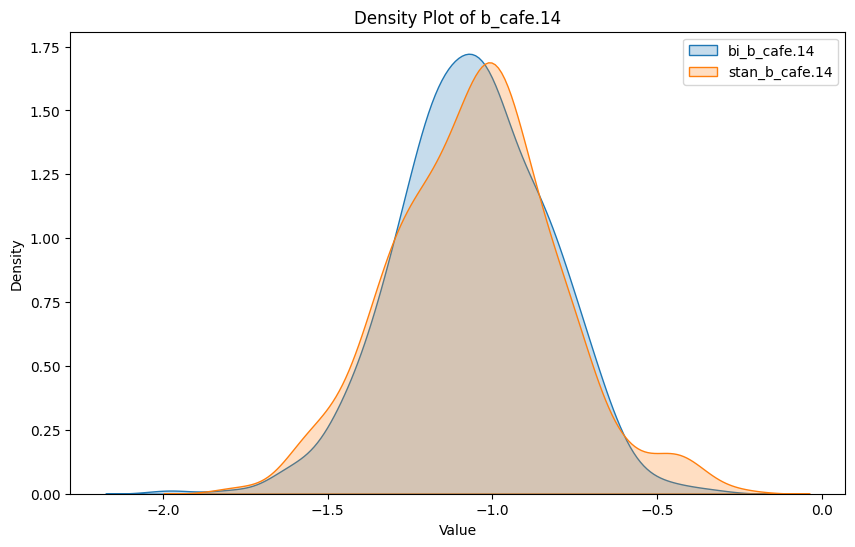

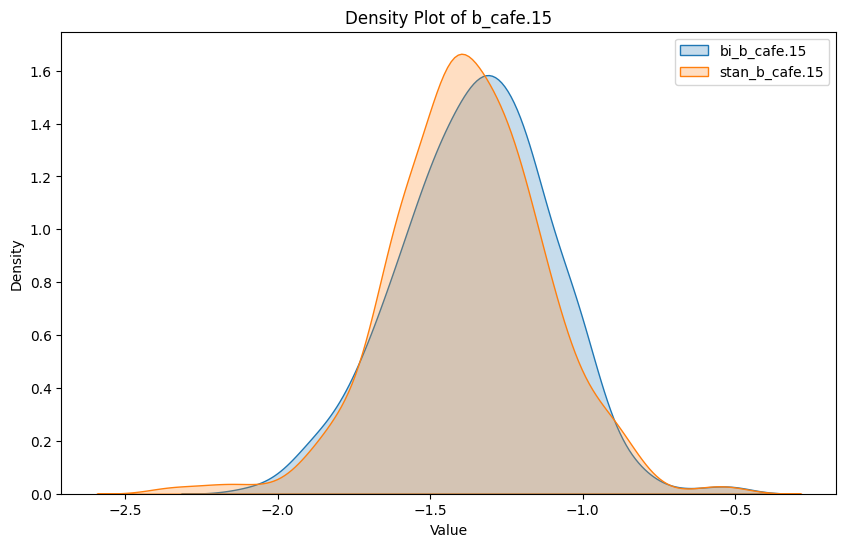

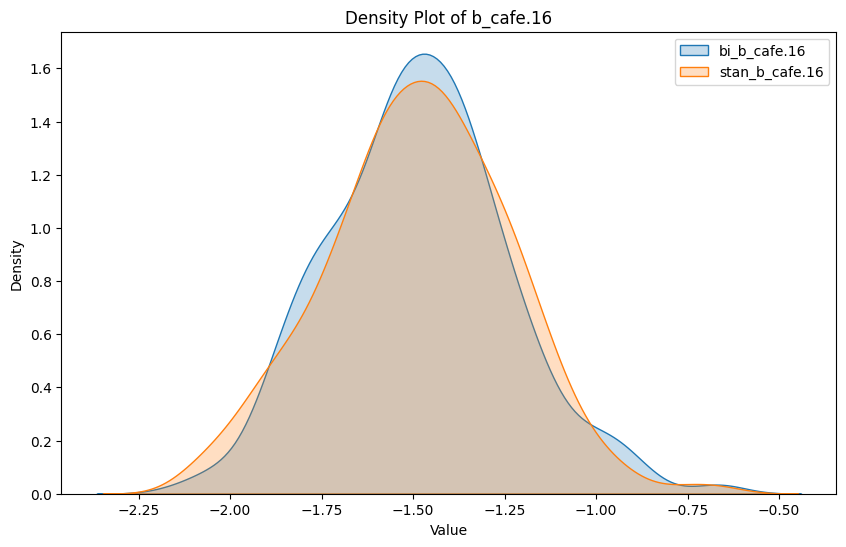

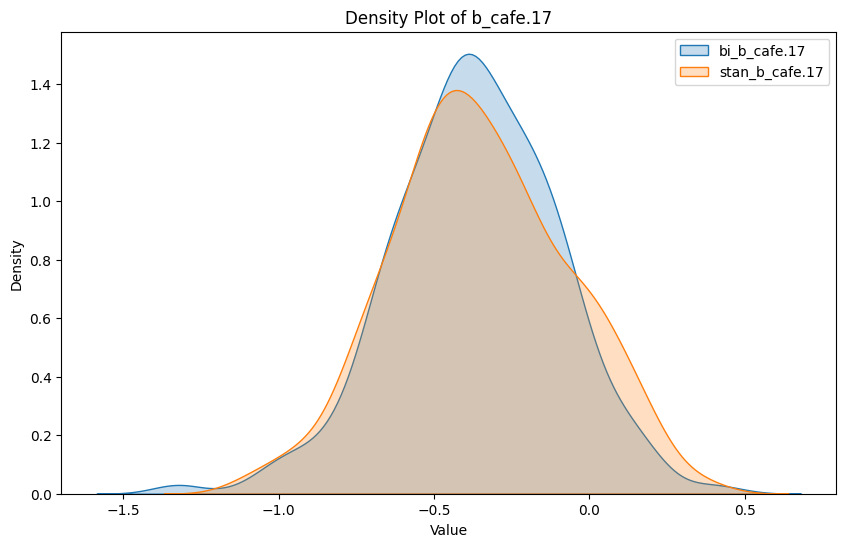

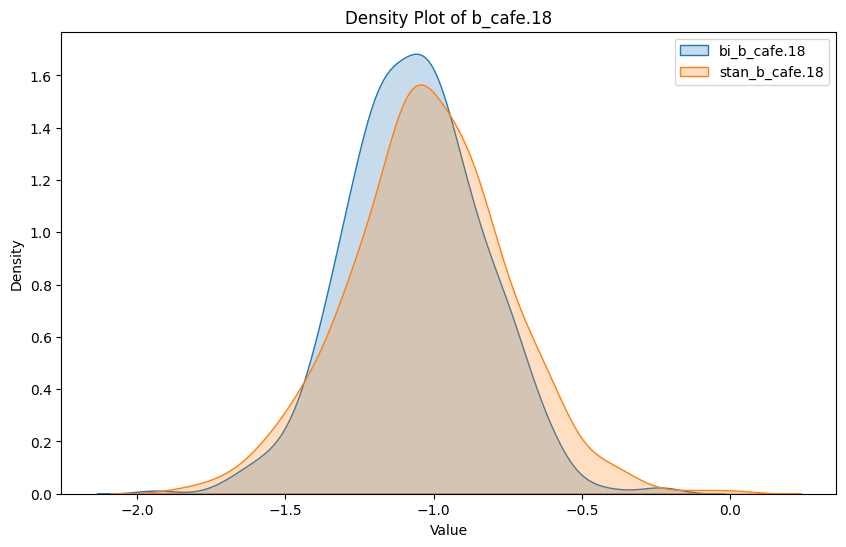

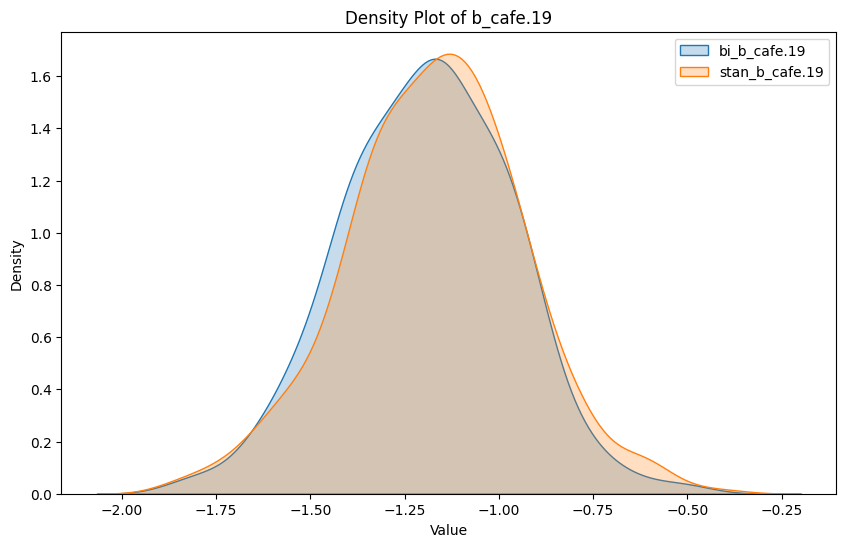

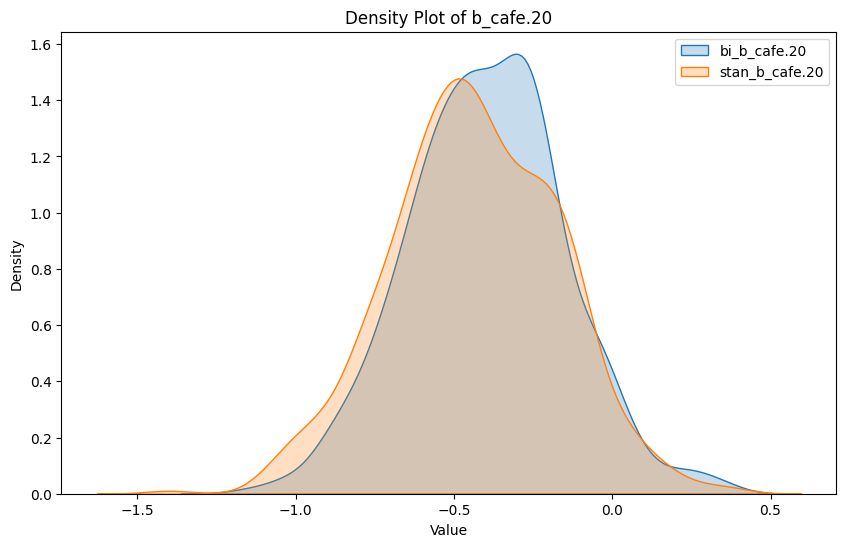

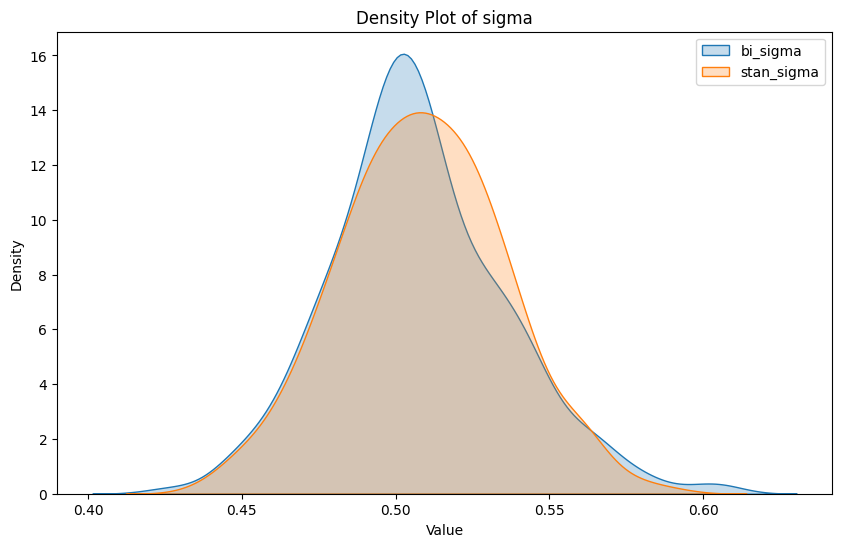

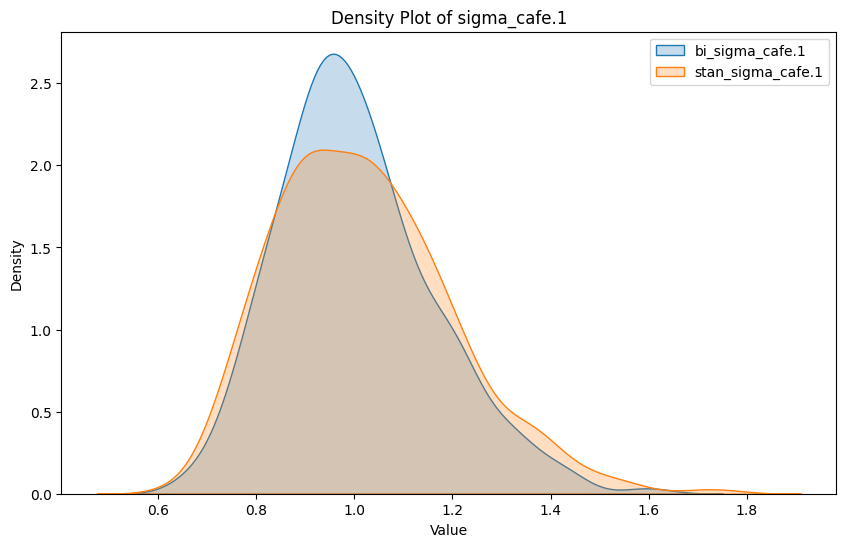

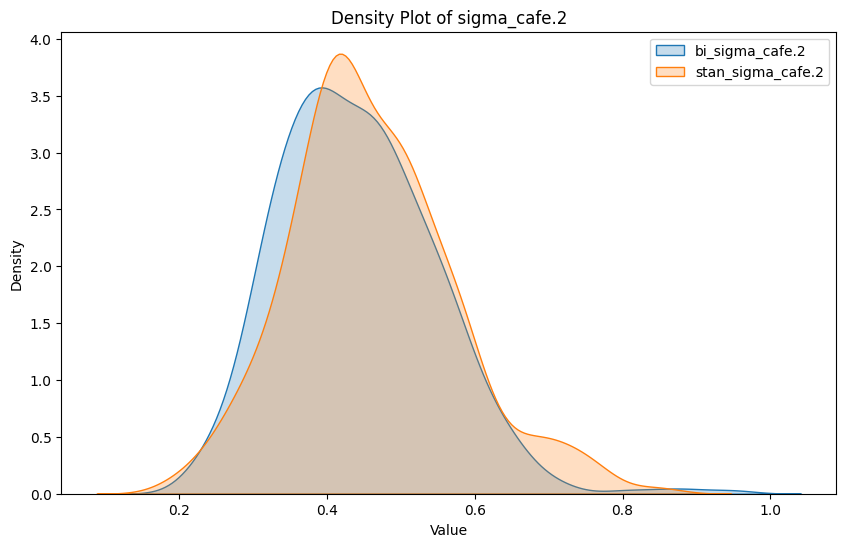

In [ ]:

df_bi.columns =d.columns
for col in df_bi.columns:
    if col in d.columns:  # Ensure the column exists in both DataFrames
        plt.figure(figsize=(10, 6))  # Create a new figure for each plot
        sns.kdeplot(df_bi[col], label=f'bi_{col}', fill=True)
        sns.kdeplot(d[col], label=f'stan_{col}', fill=True)

        # Add labels and title
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'Density Plot of {col}')
        plt.legend()

        # Show the plot
        plt.show()

### <a id='toc2_13_6_'></a>[Parameter recovery](#toc0_)

In [ ]:
def model(cafe, wait, N_cafes, afternoon):
    a = dist.normal(5, 2, shape=(1,), name = 'a')
    b = dist.normal(-1, 0.5, shape=(1,), name = 'b')
    sigma_cafe = dist.exponential(1, shape=(2,),  name = 'sigma_cafe')
    sigma = dist.exponential( 1, shape=[1], name = 'sigma')
    Rho = dist.lkj(2, 2, name = 'Rho')
    cov = jnp.outer(sigma_cafe, sigma_cafe) * Rho
    a_cafe_b_cafe = dist.multivariatenormal(jnp.stack([a, b]), cov, shape = [N_cafes], name = 'a_b_cafe')    

    a_cafe, b_cafe = a_cafe_b_cafe[:, 0], a_cafe_b_cafe[:, 1]
    mu = a_cafe[cafe] + b_cafe[cafe] * afternoon
    m.normal(mu, sigma, obs=wait)

def sim(N_cafes = 20, N_visits = 10, a = 3.5,b = -1, sigma_a = 1, sigma_b = 0.5, rho = -0.7 ):
    Mu = jnp.array([a,b])
    
    cov_ab = sigma_a * sigma_b *  rho
    
    Sigma = jnp.array([[sigma_a**2, cov_ab], [cov_ab, sigma_b**2]])
    
    jnp.array([1, 2, 3, 4]).reshape(2, 2).T
    
    sigmas = jnp.array([sigma_a, sigma_b])  # standard deviations
    
    Rho = jnp.array([[1, rho], [rho, 1]])  # correlation matrix

    # now matrix multiply to get covariance matrix
    Sigma = jnp.diag(sigmas) @ Rho @ jnp.diag(sigmas)

    seed = random.PRNGKey(5)  # used to replicate example
    vary_effects = bi.dist.multivariatenormal(Mu, Sigma, shape=(N_cafes,), sample = True)
    a_cafe = vary_effects[:, 0]
    b_cafe = vary_effects[:, 1]

    seed = random.PRNGKey(22)
    afternoon = jnp.tile(jnp.arange(2), N_visits * N_cafes // 2)
    cafe_id = jnp.repeat(jnp.arange(N_cafes), N_visits)
    mu = a_cafe[cafe_id] + b_cafe[cafe_id] * afternoon
    sigma = 0.5  # std dev within cafes
    wait = dist.normal(mu, sigma, sample = True)
    d = pd.DataFrame(dict(cafe=cafe_id, afternoon=afternoon, wait=wait))
    return d

def estimate(N_cafes = 20, N_visits = 10, a = 3.5,b = -1,sigma_a = 1, sigma_b = 0.5, rho = -0.7):
    d = sim(N_cafes,N_visits , a, b, sigma_a, sigma_b, rho)
    m = bi(platform='cpu')
    m.data_on_model = dict(
        cafe = d.cafe.values, 
        wait = d.wait.values, 
        N_cafes = len(d.cafe.unique()),
        afternoon =d.afternoon.values
    )

    m.run(model, num_samples=500, progress_bar=False) 
    s = m.summary()
    return s.iloc[:,0]

def plot_recovery(res):
    g = sns.FacetGrid(res, col="parameter", col_wrap=3, height=4)
    res['simulated'] = res['simulated'].astype(float)
    res['estimations'] = res['estimations'].astype(float)
    g.map(sns.scatterplot, "simulated", "estimations")

def param_recovery(nsim, N_cafes = 20, N_visits = 10, a = 3.5,b = -1,sigma_a = 1, sigma_b = 0.5, rho = -0.7 ):
    df = pd.DataFrame(columns=['sim', 'parameter', 'simulated', 'estimations'])

    for i in range(nsim):
        estimations = estimate(N_cafes = N_cafes, N_visits = N_visits,a = a[i], b = b[i], sigma_a = sigma_a[i], sigma_b = sigma_b[i], rho = rho[i])
        data = {'sim': np.repeat(i, len(estimations.index.values)), 
                'parameter': estimations.index.values, 
                'simulated' : jnp.concatenate([a[i], b[i]],sigma_a[i],sigma_b[i],rho[i]), 
                'estimations': estimations.values}
        df = pd.concat([df, pd.DataFrame(data)], axis = 0, ignore_index=True)

    plot_recovery(df)    

    return df

m = bi()
nsim = 10
a = dist.normal(0, 1, shape= (nsim,), name = 'a', sample=True).tolist()
b = bi.dist.normal(0, 0.5, shape=(nsim,), name = 'b', sample=True).tolist()
sigma_cafe = dist.exponential(1, shape=(nsim,2), name = 'sigma_cafe', sample=True)
Rho = bi.dist.beta(2, 5, shape=(nsim,), name = 'b', sample=True).tolist()
sigma_a =  sigma_cafe[:,0].tolist()
sigma_b = sigma_cafe[:,1].tolist()
i=0
#sim(N_cafes = 20, N_visits = 10, a = a[i],b = b[i],sigma_a = sigma_a[i], sigma_b = sigma_b[i], rho = Rho[i] )
#estimations = estimate(a = a[1], b = b[1], sigma_a = sigma_a[1], sigma_b = sigma_b[1], rho = Rho[1])
param_recovery(nsim = nsim, N_cafes = 20, N_visits = 10, a =a, b = b, sigma_a =  sigma_cafe[:,0], sigma_b = sigma_cafe[:,1], rho = Rho)

jax.local_device_count 32
jax.local_device_count 32


ValueError: Cannot broadcast distribution of shape (2,) to shape (20,)

In [73]:
rho[i]

NameError: name 'rho' is not defined

## <a id='toc2_14_'></a>[Gaussian Processes](#toc0_)

### <a id='toc2_14_1_'></a>[BI](#toc0_)

In [ ]:
from main import *
m = bi(platform='cpu')
m.data('../resources/data/Kline2.csv', sep=";")
islandsDistMatrix = pd.read_csv('../resources/data/islandsDistMatrix.csv', index_col=0)
m.data_to_model(['total_tools', 'population'])
m.data_on_model["society"] = jnp.arange(0,10)# index observations
m.data_on_model["Dmat"] = islandsDistMatrix.values # Distance matrix


def model(Dmat, population, society, total_tools):
    a = bi.dist.exponential(1, name = 'a')
    b = bi.dist.exponential(1, name = 'b')
    g = bi.dist.exponential(1, name = 'g')

    # non-centered Gaussian Process prior
    etasq = bi.dist.exponential(2, name = 'etasq')
    rhosq = bi.dist.exponential(0.5, name = 'rhosq')
    z = bi.dist.normal(0,1, name = 'z', shape = (10,))
    SIGMA, L_SIGMA, k = bi.kernel_sq_exp(Dmat, z, etasq, rhosq, 0.01)
 
    lambda_ = a * population**b / g * jnp.exp(k[society])

    lk("T", Poisson(lambda_), obs=total_tools)

# Run sampler ------------------------------------------------
m.run(model, num_samples=500) 
m.summary()

jax.local_device_count 1


sample: 100%|██████████| 1000/1000 [00:01<00:00, 686.59it/s, 127 steps of size 3.54e-02. acc. prob=0.94]


mean    sd  hdi_5.5%  hdi_94.5%
a      1.45  1.12      0.06       2.79
b      0.28  0.08      0.16       0.40
etasq  0.21  0.20      0.02       0.45
g      0.61  0.59      0.03       1.25
rhosq  1.33  1.59      0.02       3.26
z[0]  -0.43  0.77     -1.68       0.69
z[1]   0.45  0.72     -0.68       1.51
z[2]  -0.23  0.80     -1.40       1.13
z[3]   0.99  0.61     -0.00       1.87
z[4]   0.43  0.62     -0.61       1.37
z[5]  -1.01  0.62     -2.04      -0.11
z[6]   0.38  0.57     -0.58       1.20
z[7]  -0.38  0.72     -1.58       0.64
z[8]   0.77  0.66     -0.22       1.82
z[9]  -0.42  0.78     -1.56       0.86

### <a id='toc2_14_2_'></a>[BIR](#toc0_)

In [9]:
%%R
library(BI)
pd=import('pandas')
# setup platform------------------------------------------------
m=importBI(platform='cpu')

# Import data ------------------------------------------------
m$data(paste(system.file(package = "BI"),"/data/Kline2.csv", sep = ''), sep=';')
islandsDistMatrix = pd$read_csv(paste(system.file(package = "BI"),"/data/islandsDistMatrix.csv", sep = ''), index_col=as.integer(0))
m$data_to_model(list('total_tools', 'population'))
m$data_on_model$society = jnp$arange(0,10, dtype='int64')
m$data_on_model$Dmat = jnp$array(islandsDistMatrix)


# Define model ------------------------------------------------
model <- function(Dmat, population, society, total_tools){
  a = bi.dist.exponential(1, name = 'a')
  b = bi.dist.exponential(1, name = 'b')
  g = bi.dist.exponential(1, name = 'g')
  
  # non-centered Gaussian Process prior
  etasq = bi.dist.exponential(2, name = 'etasq')
  rhosq = bi.dist.exponential(0.5, name = 'rhosq')
  z = bi.dist.normal(0,1, name = 'z', shape = c(10))
  r = m$kernel_sq_exp(Dmat, z, etasq, rhosq, 0.01)
  SIGMA = r[[1]]
  L_SIGMA = r[[2]]
  k = r[[3]]
  lambda_ = a * population**b / g * jnp$exp(k[society])
  m$poisson(lambda_, obs=total_tools)
}

# Run MCMC ------------------------------------------------
m$run(model) # Optimize model parameters through MCMC sampling

# Summary ------------------------------------------------
m$summary() # Get posterior distribution


jax.local_device_count 32


sample: 100%|██████████| 1000/1000 [00:01<00:00, 669.43it/s, 127 steps of size 3.54e-02. acc. prob=0.94]


       mean   sd hdi_5.5% hdi_94.5%
a      1.45 1.12     0.06      2.79
b      0.28 0.08     0.16      0.40
etasq  0.21 0.20     0.02      0.45
g      0.61 0.59     0.03      1.25
rhosq  1.33 1.59     0.02      3.26
z[0]  -0.43 0.77    -1.68      0.69
z[1]   0.45 0.72    -0.68      1.51
z[2]  -0.23 0.80    -1.40      1.13
z[3]   0.99 0.61     0.00      1.87
z[4]   0.43 0.62    -0.61      1.37
z[5]  -1.01 0.62    -2.04     -0.11
z[6]   0.38 0.57    -0.58      1.20
z[7]  -0.38 0.72    -1.58      0.64
z[8]   0.77 0.66    -0.22      1.82
z[9]  -0.42 0.78    -1.56      0.86


BIR load BI as .bi do not overwrite it!
jax an jax.numpy have been imported as jax and jnp respectivelly
